<a href="https://colab.research.google.com/github/Mujune/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

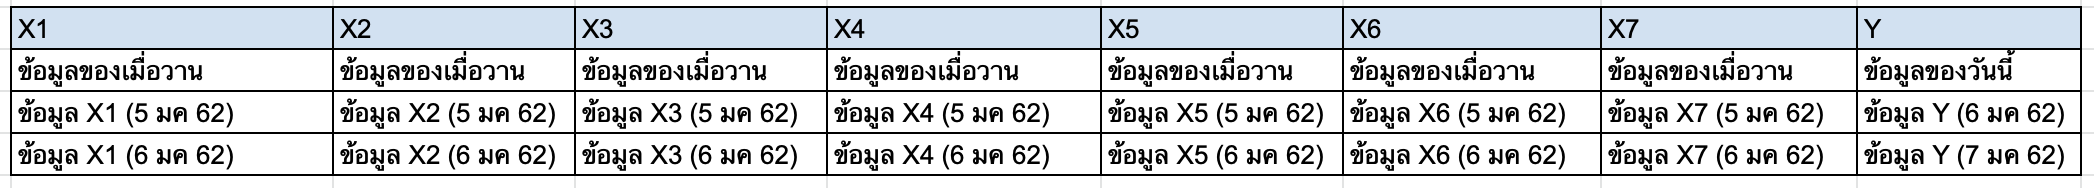

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os
os.chdir('/content/drive/MyDrive/กลางภาค')

In [31]:
import pandas as pd
import numpy as np

In [32]:
#ความกด
god_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
god_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
god_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
god_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
god_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)



In [33]:
god_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
god_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
god_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
god_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
god_KKN

ลำดับ                     สถานี เดือนและปี        1        2        3  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.47  1006.65  1007.49   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  1011.79  1010.83  1010.74   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  1011.43  1012.57  1012.28   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  1015.67  1014.11  1012.91   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.26  1012.92  1013.61   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  1011.50  1011.11  1008.60   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  1012.67  1011.17  1010.47   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  1009.80  1010.17  1010.74   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  1014.58  1013.30  1013.73   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  1015.19  1013.97  1013.89   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  1007.15  1010.12  1009.88   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  1011.98  1011.46  1012.38   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  1016.33  1016.26  1014.47   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  1015.68  1013.34  1012.22   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  1011.69  1008.58  1006.13   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  1010.85  1010.07  1008.86   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  1009.82  1010.80  1012.60   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  1010.10  1011.37  1011.13   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  1018.10  1018.43  1016.61   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  1017.24  1017.93  1018.05   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  1011.22  1010.97  1010.41   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  1014.97  1015.22  1014.31   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  1012.55  1012.12  1012.52   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  1019.11  1017.96  1016.01   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  1012.54  1015.56  1015.71   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  1008.89  1008.47  1007.18   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  1012.79  1013.98  1014.58   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  1016.86  1016.16  1015.39   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  1015.76  1014.10  1013.84   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  1014.21  1015.26  1014.23   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  1009.04  1007.45  1007.44   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  1013.68  1011.33  1012.00   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  1012.16  1012.63  1012.48   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  1013.49  1012.55  1011.88   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  1016.03  1016.00  1018.19   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  1010.47  1011.63  1011.63   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  1013.50  1013.96  1014.10   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  1012.48  1011.29  1011.47   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  1019.06  1018.25  1018.03   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  1014.93  1013.13  1012.71   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  1009.73  1009.64  1009.30   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  1010.27  1010.69  1011.01   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  1012.81  1015.07  1017.05   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  1017.80  1018.04  1016.21   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  1014.57  1014.85  1013.17   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  1005.67  1006.21  1007.56   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  1012.18  1012.74  1013.72   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  1016.17  1014.73  1015.23   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01  1018.63  1017.35  1015.20   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  1014.44  1014.14  1014.30   
50  48    352201-หนองคาย จ.หนองคาย 2021-10-01  1008.12  1008.74  1008.64   
51  49    352201-หนองคาย จ.หนองคาย 2021-11-01  1013

In [34]:
god_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
god_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
god_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
god_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
god_NPM

ลำดับ                     สถานี เดือนและปี        1        2        3  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  1006.30  1007.38  1008.07   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.28  1011.23  1011.08   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.15  1013.75  1013.24   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.56  1014.88  1013.41   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.98  1013.75  1014.96   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  1011.86  1011.24  1008.82   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  1013.26  1011.77  1010.84   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  1010.12  1010.89  1011.93   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  1015.52  1014.01  1015.36   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  1015.63  1014.87  1014.45   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  1008.16  1010.72  1010.26   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  1012.63  1012.18  1013.27   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  1018.12  1017.26  1015.40   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  1016.50  1014.10  1013.14   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  1012.30  1009.01  1006.93   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  1010.38  1009.77  1008.49   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  1009.73  1011.22  1013.22   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  1009.57  1011.67  1011.20   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  1019.36  1019.00  1016.83   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  1018.10  1018.53  1018.91   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  1011.43  1010.59  1010.31   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  1015.78  1015.71  1014.71   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  1012.63  1012.52  1012.89   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  1020.44  1018.43  1016.06   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  1014.60  1017.76  1017.24   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  1009.03  1009.01  1007.89   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  1014.11  1014.77  1015.27   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  1017.99  1017.40  1016.53   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  1016.87  1016.02  1015.54   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  1015.25  1016.18  1014.83   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  1009.45  1007.85  1008.01   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  1014.21  1012.58  1012.67   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  1013.27  1014.05  1013.62   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  1015.11  1013.35  1012.87   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  1017.30  1018.16  1020.34   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  1011.32  1012.28  1012.62   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  1014.05  1014.46  1014.63   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  1013.16  1011.67  1012.25   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  1020.65  1019.75  1019.38   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  1016.01  1013.86  1013.72   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  1010.23  1010.34  1010.38   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  1010.73  1011.23  1012.17   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  1014.25  1017.10  1018.92   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  1019.30  1019.43  1017.49   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  1015.53  1015.67  1014.19   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  1005.81  1006.41  1008.11   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  1013.05  1013.70  1014.73   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  1016.84  1015.95  1016.66   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01  1019.91  1018.33  1016.72   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  1015.52  1015.28  1016.02   
50  48    352201-หนองคาย จ.หนองคาย 2021-10-01  1008.43  1008.96  1009.00   
51  49    352201-หนองคาย จ.หนองคาย 2021-11-01  1013

In [35]:
god_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
god_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
god_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
god_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
god_SNK

ลำดับ                     สถานี เดือนและปี        1        2        3  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.84  1007.16  1007.87   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.41  1011.47  1011.22   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.74  1013.44   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.61  1014.92  1013.86   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  1014.05  1013.71  1014.95   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  1011.87  1011.39  1008.88   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  1013.30  1011.97  1010.91   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  1010.19  1010.80  1011.88   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  1015.64  1014.29  1015.26   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  1015.79  1015.14  1014.60   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  1007.79  1010.66  1010.26   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  1012.88  1012.32  1013.43   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  1017.99  1017.33  1015.58   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  1016.75  1014.22  1013.09   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  1012.40  1009.03  1006.76   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  1010.84  1010.37  1009.04   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  1010.16  1011.59  1013.59   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  1010.22  1012.12  1011.51   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  1019.51  1019.56  1017.35   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  1018.27  1019.14  1019.12   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  1011.87  1011.10  1010.59   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  1015.85  1016.12  1015.23   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  1013.21  1012.85  1013.32   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  1020.82  1018.83  1016.60   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  1014.25  1017.46  1017.15   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  1008.69  1008.54  1007.34   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  1013.78  1014.27  1014.98   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  1017.73  1016.96  1016.12   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  1016.33  1015.45  1014.88   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  1015.15  1015.90  1014.39   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  1008.68  1007.40  1007.53   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  1013.94  1012.03  1012.48   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  1012.97  1013.60  1013.06   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  1014.44  1013.16  1012.44   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  1016.85  1017.46  1019.68   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  1010.66  1011.63  1012.01   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  1013.49  1013.96  1014.16   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  1012.49  1011.34  1011.67   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  1019.98  1019.21  1018.59   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  1015.30  1013.31  1012.93   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  1009.79  1009.63  1009.65   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  1010.26  1010.65  1011.63   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  1013.46  1016.05  1018.20   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  1018.57  1018.75  1016.86   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  1015.14  1015.10  1013.58   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  1005.19  1006.07  1007.61   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  1012.74  1013.10  1013.88   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  1016.21  1015.31  1015.74   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01  1019.29  1017.63  1016.00   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  1014.97  1014.62  1015.37   
50  48    352201-หนองคาย จ.หนองคาย 2021-10-01  1008.23  1008.30  1008.45   
51  49    352201-หนองคาย จ.หนองคาย 2021-11-01  1012

In [36]:
god_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
god_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
god_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
god_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
god_NKI

ลำดับ                     สถานี เดือนและปี        1        2        3  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.34  1006.67  1007.39   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.05  1011.35  1011.28   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.26  1012.40   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.26  1014.60  1012.83   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.64  1013.36  1014.86   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  1011.66  1011.44  1008.66   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  1013.25  1011.65  1010.88   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  1010.04  1010.28  1011.34   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  1015.38  1014.02  1014.56   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  1016.12  1015.23  1014.67   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  1007.41  1010.80  1010.46   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  1012.55  1011.97  1013.12   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  1017.68  1016.84  1015.53   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  1016.47  1013.91  1012.94   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  1012.11  1008.97  1006.74   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  1010.65  1009.91  1008.58   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  1009.89  1010.97  1012.71   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  1010.28  1011.64  1011.23   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  1018.97  1019.41  1017.33   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  1017.58  1018.41  1018.76   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  1011.54  1010.82  1010.45   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  1015.83  1015.92  1014.93   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  1012.91  1012.79  1012.77   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  1020.05  1018.49  1016.66   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  1013.33  1015.74  1016.56   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  1008.59  1008.77  1007.33   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  1013.64  1014.56  1014.99   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  1017.60  1016.92  1016.11   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  1016.37  1015.36  1014.23   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  1014.91  1015.52  1013.89   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  1008.77  1007.60  1007.22   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  1013.76  1011.66  1012.34   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  1012.73  1013.52  1012.96   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  1014.21  1013.13  1012.40   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  1016.51  1016.35  1018.61   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  1010.68  1011.67  1012.09   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  1013.59  1013.94  1014.26   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  1012.62  1011.36  1011.45   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  1019.65  1019.10  1018.32   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  1015.10  1013.17  1012.96   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  1009.21  1009.44  1009.17   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  1010.42  1010.65  1011.25   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  1013.25  1015.73  1017.83   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  1018.43  1018.56  1016.99   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  1014.91  1014.91  1012.97   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  1005.33  1006.13  1007.29   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  1012.57  1013.12  1013.71   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  1016.36  1015.03  1015.53   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01  1019.34  1017.81  1015.88   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  1014.51  1014.06  1014.69   
50  48    352201-หนองคาย จ.หนองคาย 2021-10-01  1008.43  1008.34  1008.24   
51  49    352201-หนองคาย จ.หนองคาย 2021-11-01  1012

In [37]:
god_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
god_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
god_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
god_LEI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
god_LEI

ลำดับ                     สถานี เดือนและปี        1        2        3  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.12  1006.51  1007.81   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.09  1011.32  1010.99   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  1010.43  1011.81  1012.45   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  1015.42  1014.07  1012.35   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.19  1012.82  1013.94   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  1011.41  1010.77  1008.72   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  1012.46  1011.06  1010.41   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  1009.81  1010.25  1011.09   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  1014.63  1013.32  1013.99   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  1015.68  1014.51  1013.94   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  1006.79  1009.61  1010.40   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  1012.15  1011.51  1012.06   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  1016.55  1016.20  1014.86   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  1015.82  1013.82  1012.55   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  1012.30  1008.70  1006.54   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  1010.38  1009.84  1008.74   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  1009.65  1010.52  1011.93   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  1010.32  1011.90  1011.00   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  1018.46  1019.27  1017.13   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  1017.04  1017.88  1018.25   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  1011.38  1010.69  1010.42   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  1014.98  1015.29  1014.61   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  1012.41  1012.12  1012.62   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  1019.51  1018.11  1016.14   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  1013.13  1015.48  1015.36   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  1008.85  1008.86  1007.76   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  1013.56  1014.68  1015.34   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  1017.76  1017.33  1016.51   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  1016.91  1015.23  1014.38   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  1015.30  1015.84  1014.08   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  1009.17  1008.42  1007.88   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  1014.33  1011.97  1012.71   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  1013.13  1013.99  1013.44   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  1014.50  1013.42  1012.90   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  1015.84  1016.29  1019.49   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  1010.79  1011.86  1012.15   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  1013.79  1014.19  1014.73   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  1012.76  1011.58  1011.72   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  1019.22  1018.95  1018.52   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  1014.91  1012.96  1013.08   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  1009.48  1009.54  1009.45   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  1011.11  1010.90  1011.49   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  1013.26  1015.21  1017.53   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  1018.14  1018.56  1016.47   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  1014.49  1014.78  1012.88   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  1005.40  1006.35  1007.76   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  1012.72  1013.12  1013.70   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  1016.55  1015.06  1015.40   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01  1018.98  1017.62  1016.02   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  1014.33  1013.80  1013.95   
50  48    352201-หนองคาย จ.หนองคาย 2021-10-01  1008.60  1008.33  1008.73   
51  49    352201-หนองคาย จ.หนองคาย 2021-11-01  1012

In [38]:
god_KKN['year'] = god_KKN['เดือนและปี'].dt.year
god_KKN['month'] = god_KKN['เดือนและปี'].dt.month
god_KKN = god_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
god_KKN.head()

ลำดับ                     สถานี        1        2        3        4  \
0   1    352201-หนองคาย จ.หนองคาย  1005.47  1006.65  1007.49  1008.28   
1   2    352201-หนองคาย จ.หนองคาย  1011.79  1010.83  1010.74  1010.71   
2   3    352201-หนองคาย จ.หนองคาย  1011.43  1012.57  1012.28  1012.97   
3   1    352201-หนองคาย จ.หนองคาย  1015.67  1014.11  1012.91  1014.06   
4   2    352201-หนองคาย จ.หนองคาย  1013.26  1012.92  1013.61  1013.18   

         5        6        7        8  ...       24       25       26  \
0  1009.88  1011.36  1011.17  1010.20  ...  1010.23  1011.34  1011.84   
1  1010.09  1009.24  1008.03  1007.20  ...  1015.40  1013.95  1012.35   
2  1013.09  1012.03  1012.05  1011.94  ...  1015.78  1018.56  1018.65   
3  1015.51  1015.88  1017.72  1018.06  ...  1011.27  1011.65  1012.56   
4  1011.26  1008.80  1008.16  1009.66  ...  1005.46  1004.80  1005.08   

        27       28       29       30       31  year  month  
0  1011.89  1012.29  1011.67   1011.3  1011.52  2011     10  
1  1011.31  1009.59  1010.13  1010.47        -  2011     11  
2  1016.88  1016.05  1014.98  1015.53   1016.4  2011     12  
3  1010.76  1010.26  1010.69  1012.34  1014.52  2012      1  
4  1006.57  1005.96  1006.53  1010.47        -  2012      2  

[5 rows x 35 columns]

In [39]:
god_NPM['year'] = god_NPM['เดือนและปี'].dt.year
god_NPM['month'] = god_NPM['เดือนและปี'].dt.month
god_NPM = god_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
god_NPM.head()

ลำดับ                     สถานี        1        2        3        4  \
0   1    352201-หนองคาย จ.หนองคาย  1006.30  1007.38  1008.07  1008.44   
1   2    352201-หนองคาย จ.หนองคาย  1012.28  1011.23  1011.08  1010.96   
2   3    352201-หนองคาย จ.หนองคาย  1012.15  1013.75  1013.24  1013.94   
3   1    352201-หนองคาย จ.หนองคาย  1016.56  1014.88  1013.41  1015.85   
4   2    352201-หนองคาย จ.หนองคาย  1013.98  1013.75  1014.96  1013.52   

         5        6        7        8  ...       24       25       26  \
0  1010.51  1011.65  1011.24  1010.68  ...  1010.64  1012.01  1012.47   
1  1010.57  1009.20  1007.99  1007.38  ...  1016.09  1014.62  1012.80   
2  1013.35  1012.62  1012.48  1012.96  ...  1017.58  1019.77  1019.71   
3  1016.94  1017.13  1019.21  1019.57  ...  1012.45  1013.59  1013.15   
4  1011.85  1008.82  1008.15  1011.78  ...  1005.13  1004.94  1006.42   

        27       28       29       30       31  year  month  
0  1012.46  1012.85  1012.43  1011.69  1012.28  2011     10  
1  1011.83  1010.00   1010.6  1011.13        -  2011     11  
2  1017.34  1017.01  1015.64  1016.89  1017.73  2011     12  
3  1011.56  1010.71  1011.95  1013.77   1015.5  2012      1  
4  1008.93  1007.88  1007.29  1011.13        -  2012      2  

[5 rows x 35 columns]

In [40]:
god_SNK['year'] = god_SNK['เดือนและปี'].dt.year
god_SNK['month'] = god_SNK['เดือนและปี'].dt.month
god_SNK = god_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
god_SNK.head()

ลำดับ                     สถานี        1        2        3        4  \
0   1    352201-หนองคาย จ.หนองคาย  1005.84  1007.16  1007.87  1008.56   
1   2    352201-หนองคาย จ.หนองคาย  1012.41  1011.47  1011.22  1011.16   
2   3    352201-หนองคาย จ.หนองคาย  1012.16  1013.74  1013.44  1014.00   
3   1    352201-หนองคาย จ.หนองคาย  1016.61  1014.92  1013.86  1015.71   
4   2    352201-หนองคาย จ.หนองคาย  1014.05  1013.71  1014.95  1013.68   

         5        6        7        8  ...       24       25       26  \
0  1010.55  1011.83  1011.24  1010.74  ...  1010.80  1012.02  1012.36   
1  1010.51  1009.26  1008.20  1007.41  ...  1016.11  1014.65  1012.96   
2  1013.28  1012.69  1012.57  1012.82  ...  1017.34  1019.63  1019.96   
3  1016.87  1017.17  1018.83  1019.52  ...  1012.37  1013.47  1013.39   
4  1011.72  1008.93  1008.08  1011.60  ...  1005.04  1004.96  1005.94   

        27       28       29       30       31  year  month  
0  1012.42  1012.97  1012.52  1011.87  1012.21  2011     10  
1  1011.91  1010.10  1010.78  1011.06        -  2011     11  
2  1017.56  1017.02   1015.8  1016.96  1017.63  2011     12  
3  1011.36  1010.64  1011.95  1013.86  1015.52  2012      1  
4  1008.70  1007.38  1007.25  1011.06        -  2012      2  

[5 rows x 35 columns]

In [41]:
god_NKI['year'] = god_NKI['เดือนและปี'].dt.year
god_NKI['month'] = god_NKI['เดือนและปี'].dt.month
god_NKI = god_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
god_NKI.head()

ลำดับ                     สถานี        1        2        3        4  \
0   1    352201-หนองคาย จ.หนองคาย  1005.34  1006.67  1007.39  1008.11   
1   2    352201-หนองคาย จ.หนองคาย  1012.05  1011.35  1011.28  1011.27   
2   3    352201-หนองคาย จ.หนองคาย  1012.16  1013.26  1012.40  1013.57   
3   1    352201-หนองคาย จ.หนองคาย  1016.26  1014.60  1012.83  1014.85   
4   2    352201-หนองคาย จ.หนองคาย  1013.64  1013.36  1014.86  1013.93   

         5        6        7        8  ...       24       25       26  \
0  1009.69  1011.55  1011.28  1010.40  ...  1010.71  1011.67  1012.36   
1  1010.62  1009.58  1008.55  1007.65  ...  1016.46  1014.65  1013.08   
2  1013.68  1012.72  1012.44  1012.14  ...  1016.92  1019.05  1019.88   
3  1016.69  1016.56  1018.50  1019.33  ...  1011.98  1012.20  1012.95   
4  1011.87  1008.77  1008.42  1010.50  ...  1005.54  1005.28  1005.32   

        27       28       29       30       31  year  month  
0  1012.50  1012.81  1011.88  1011.77  1012.18  2011     10  
1  1011.62  1010.21  1010.71   1011.1        -  2011     11  
2  1017.86  1016.76  1015.63  1016.31  1017.19  2011     12  
3  1011.23  1010.63  1010.96  1013.16  1015.38  2012      1  
4  1007.59  1006.66  1007.07   1011.1        -  2012      2  

[5 rows x 35 columns]

In [42]:
god_LEI['year'] = god_LEI['เดือนและปี'].dt.year
god_LEI['month'] = god_LEI['เดือนและปี'].dt.month
god_LEI = god_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
god_LEI.head()

ลำดับ                     สถานี        1        2        3        4  \
0   1    352201-หนองคาย จ.หนองคาย  1005.12  1006.51  1007.81  1008.15   
1   2    352201-หนองคาย จ.หนองคาย  1012.09  1011.32  1010.99  1011.47   
2   3    352201-หนองคาย จ.หนองคาย  1010.43  1011.81  1012.45  1012.03   
3   1    352201-หนองคาย จ.หนองคาย  1015.42  1014.07  1012.35  1013.49   
4   2    352201-หนองคาย จ.หนองคาย  1013.19  1012.82  1013.94  1013.18   

         5        6        7        8  ...       24       25       26  \
0  1009.21  1011.28  1011.22  1010.36  ...  1010.25  1011.52  1012.04   
1  1010.88  1009.62  1008.28  1007.65  ...  1015.74  1014.36  1013.30   
2  1013.29  1013.21  1012.81  1012.23  ...  1013.11  1015.95  1018.79   
3  1014.99  1015.70  1017.24  1018.10  ...  1010.76  1011.11  1011.72   
4  1010.99  1008.58  1008.19  1009.60  ...  1005.48  1004.96  1005.05   

        27       28       29       30       31  year  month  
0  1012.00  1012.74  1011.69  1011.27  1011.71  2011     10  
1  1011.92  1009.86   1010.1  1010.43        -  2011     11  
2  1019.39  1017.88  1016.49  1014.97  1015.62  2011     12  
3  1010.91  1010.31  1010.16  1012.61   1014.4  2012      1  
4  1006.27  1005.59  1006.52  1010.43        -  2012      2  

[5 rows x 35 columns]

In [43]:
god_KKN_jj = god_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
god_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
god_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
god_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.47
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.65
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.49
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.28
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.88
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.37
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.04
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [44]:
god_NPM_jj = god_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
god_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
god_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
god_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1         1006.3
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1007.38
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1008.07
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.44
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1010.51
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1016.43
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.53
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [45]:
god_SNK_jj = god_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
god_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
god_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
god_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.84
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1007.16
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.87
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.56
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1010.55
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.95
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1012.89
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [46]:
god_NKI_jj = god_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
god_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
god_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
god_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.34
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.67
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.39
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.11
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.69
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1015.31
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.06
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [47]:
god_LEI_jj = god_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
god_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
god_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
god_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.12
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.51
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.81
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.15
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.21
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.97
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1012.88
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [48]:
god_KKN_jj['province_id'] = len(god_KKN_jj)*['KKN']
god_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.47   
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.65   
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.49   
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.28   
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.88   
...                        ...   ...   ...    ...  ...            ...   
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.37   
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.04   
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37   
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98   
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            KKN  
1            KKN  
2            KKN  
3            KKN  
4            KKN  
...          ...  
1700         KKN  
1701         KKN  
1702         KKN  
1703         KKN  
1704         KKN  

[1705 rows x 7 columns]

In [49]:
god_NPM_jj['province_id'] = len(god_NPM_jj)*['NPM']
god_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1         1006.3   
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1007.38   
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1008.07   
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.44   
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1010.51   
...                        ...   ...   ...    ...  ...            ...   
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1016.43   
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.53   
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37   
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98   
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            NPM  
1            NPM  
2            NPM  
3            NPM  
4            NPM  
...          ...  
1700         NPM  
1701         NPM  
1702         NPM  
1703         NPM  
1704         NPM  

[1705 rows x 7 columns]

In [50]:
god_SNK_jj['province_id'] = len(god_SNK_jj)*['SNK']
god_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.84   
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1007.16   
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.87   
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.56   
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1010.55   
...                        ...   ...   ...    ...  ...            ...   
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.95   
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1012.89   
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37   
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98   
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            SNK  
1            SNK  
2            SNK  
3            SNK  
4            SNK  
...          ...  
1700         SNK  
1701         SNK  
1702         SNK  
1703         SNK  
1704         SNK  

[1705 rows x 7 columns]

In [51]:
god_NKI_jj['province_id'] = len(god_NKI_jj)*['NKI']
god_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.34   
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.67   
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.39   
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.11   
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.69   
...                        ...   ...   ...    ...  ...            ...   
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1015.31   
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.06   
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            NKI  
1            NKI  
2            NKI  
3            NKI  
4            NKI  
...          ...  
1700         NKI  
1701         NKI  
1702         NKI  
1703         NKI  
1704         NKI  

[1705 rows x 7 columns]

In [52]:
god_LEI_jj['province_id'] = len(god_LEI_jj)*['LEI']
god_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.12   
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.51   
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.81   
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.15   
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.21   
...                        ...   ...   ...    ...  ...            ...   
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.97   
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1012.88   
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1700         LEI  
1701         LEI  
1702         LEI  
1703         LEI  
1704         LEI  

[1705 rows x 7 columns]

In [53]:
god_KKN_in = god_KKN_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
god_KKN_in_re = god_KKN_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
god_KKN_in_re

สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1        1005.47
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2        1006.65
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3        1007.49
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4        1008.28
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5        1009.88
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27        1014.37
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28        1013.04
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29        1013.37
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30        1013.98
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [169]:
god_NPM_in = god_NPM_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
god_NPM_in_re = god_NPM_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
god_NPM_in_re

สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1         1006.3
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2        1007.38
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3        1008.07
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4        1008.44
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5        1010.51
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27        1016.43
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28        1013.53
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29        1013.37
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30        1013.98
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [170]:
god_SNK_in = god_SNK_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
god_SNK_in_re = god_SNK_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
god_SNK_in_re

สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1        1005.84
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2        1007.16
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3        1007.87
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4        1008.56
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5        1010.55
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27        1014.95
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28        1012.89
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29        1013.37
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30        1013.98
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [171]:
god_NKI_in = god_NKI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
god_NKI_in_re = god_NKI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
god_NKI_in_re

สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1        1005.34
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2        1006.67
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3        1007.39
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4        1008.11
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5        1009.69
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27        1015.31
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28        1013.06
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [172]:
god_LEI_in = god_LEI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
god_LEI_in_re = god_LEI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
god_LEI_in_re

สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1        1005.12
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2        1006.51
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3        1007.81
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4        1008.15
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5        1009.21
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27        1014.97
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28        1012.88
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [292]:
god_KKN_jj['province_id'] = len(god_KKN_jj)*['kkn']
god_KKN_jj = god_KKN_jj.reset_index()
god_KKN_jj

index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.47   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.65   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.49   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.28   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.88   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.37   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.04   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [291]:
god_NPM_jj['province_id'] = len(god_NPM_jj)*['npm']
god_NPM_jj = god_NPM_jj.reset_index()
god_NPM_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1         1006.3   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2        1007.38   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3        1008.07   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.44   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5        1010.51   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1016.43   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.53   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [290]:
god_SNK_jj['province_id'] = len(god_SNK_jj)*['snk']
god_SNK_jj = god_SNK_jj.reset_index()
god_SNK_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.84   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2        1007.16   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.87   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.56   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5        1010.55   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.95   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1012.89   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29        1013.37   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30        1013.98   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            snk  
1            snk  
2            snk  
3            snk  
4            snk  
...          ...  
1700         snk  
1701         snk  
1702         snk  
1703         snk  
1704         snk  

[1705 rows x 8 columns]

In [289]:
god_NKI_jj['province_id'] = len(god_NKI_jj)*['nki']
god_NKI_jj = god_NKI_jj.reset_index()
god_NKI_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.34   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.67   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.39   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.11   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.69   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1015.31   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1013.06   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1700         nki  
1701         nki  
1702         nki  
1703         nki  
1704         nki  

[1705 rows x 8 columns]

In [288]:
god_LEI_jj['province_id'] = len(god_LEI_jj)*['lei']
god_LEI_jj = god_LEI_jj.reset_index()
god_LEI_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1        1005.12   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2        1006.51   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3        1007.81   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4        1008.15   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5        1009.21   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27        1014.97   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28        1012.88   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1700         lei  
1701         lei  
1702         lei  
1703         lei  
1704         lei  

[1705 rows x 8 columns]

In [54]:
#ความชื้น
chuen_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
chuen_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
chuen_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
chuen_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
chuen_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)









In [55]:
chuen_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
chuen_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
chuen_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
chuen_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
chuen_KKN

ลำดับ                     สถานี เดือนและปี   1   2   3   4   5   6   7  \
0    1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  83  92  86  80  86  86  83   
1    2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  71  65  68  65  65  68  69   
2    3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  66  61  61  62  61  60  69   
3    1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  65  66  69  63  64  68  65   
4    2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  71  72  71  72  70  68  61   
5    3    381201-ขอนแก่น จ.ขอนแก่น 2012-10-01  73  73  72  81  83  73  70   
6    4    381201-ขอนแก่น จ.ขอนแก่น 2012-11-01  64  67  67  66  65  65  67   
7    5    381201-ขอนแก่น จ.ขอนแก่น 2012-12-01  68  66  69  71  69  63  67   
8    6    381201-ขอนแก่น จ.ขอนแก่น 2013-01-01  62  58  59  60  62  61  62   
9    7    381201-ขอนแก่น จ.ขอนแก่น 2013-02-01  69  66  62  58  59  53  50   
10   8    381201-ขอนแก่น จ.ขอนแก่น 2013-10-01  86  85  78  73  69  72  72   
11   9    381201-ขอนแก่น จ.ขอนแก่น 2013-11-01  68  69  62  65  66  68  76   
12  10    381201-ขอนแก่น จ.ขอนแก่น 2013-12-01  63  60  56  61  63  63  59   
13  11    381201-ขอนแก่น จ.ขอนแก่น 2014-01-01  62  63  64  65  64  67  66   
14  12    381201-ขอนแก่น จ.ขอนแก่น 2014-02-01  60  55  55  51  59  60  61   
15  13    381201-ขอนแก่น จ.ขอนแก่น 2014-10-01  83  75  73  69  73  73  68   
16  14    381201-ขอนแก่น จ.ขอนแก่น 2014-11-01  74  72  69  71  75  79  84   
17  15    381201-ขอนแก่น จ.ขอนแก่น 2014-12-01  62  72  70  71  67  68  70   
18  16    381201-ขอนแก่น จ.ขอนแก่น 2015-01-01  54  52  59  61  59  57  62   
19  17    381201-ขอนแก่น จ.ขอนแก่น 2015-02-01  48  56  57  53  54  55  56   
20  18    381201-ขอนแก่น จ.ขอนแก่น 2015-10-01  83  86  83  86  86  87  93   
21  19    381201-ขอนแก่น จ.ขอนแก่น 2015-11-01  72  70  69  67  67  78  85   
22  20    381201-ขอนแก่น จ.ขอนแก่น 2015-12-01  71  68  72  70  78  74  64   
23  21    381201-ขอนแก่น จ.ขอนแก่น 2016-01-01  67  67  64  64  54  60  70   
24  22    381201-ขอนแก่น จ.ขอนแก่น 2016-02-01  79  69  68  68  68  59  56   
25  23    381201-ขอนแก่น จ.ขอนแก่น 2016-10-01  91  81  77  78  85  93  83   
26  24    381201-ขอนแก่น จ.ขอนแก่น 2016-11-01  73  70  68  69  72  69  91   
27  25    381201-ขอนแก่น จ.ขอนแก่น 2016-12-01  65  66  66  69  67  62  61   
28  26    381201-ขอนแก่น จ.ขอนแก่น 2017-01-01  76  65  63  64  63  65  66   
29  27    381201-ขอนแก่น จ.ขอนแก่น 2017-02-01  57  61  65  64  55  52  49   
30  28    381201-ขอนแก่น จ.ขอนแก่น 2017-10-01  87  89  91  92  86  88  83   
31  29    381201-ขอนแก่น จ.ขอนแก่น 2017-11-01  71  68  65  55  63  70  67   
32  30    381201-ขอนแก่น จ.ขอนแก่น 2017-12-01  72  69  70  67  64  68  69   
33  31    381201-ขอนแก่น จ.ขอนแก่น 2018-01-01  69  70  68  71  69  73  81   
34  32    381201-ขอนแก่น จ.ขอนแก่น 2018-02-01  65  62  55  55  55  57  60   
35  33    381201-ขอนแก่น จ.ขอนแก่น 2018-10-01  73  73  66  70  65  71  69   
36  34    381201-ขอนแก่น จ.ขอนแก่น 2018-11-01  54  55  60  63  66  66  67   
37  35    381201-ขอนแก่น จ.ขอนแก่น 2018-12-01  67  66  61  59  64  65  64   
38  36    381201-ขอนแก่น จ.ขอนแก่น 2019-01-01  61  61  62  66  68  67  67   
39  37    381201-ขอนแก่น จ.ขอนแก่น 2019-02-01  56  56  50  53  55  56  54   
40  38    381201-ขอนแก่น จ.ขอนแก่น 2019-10-01  73  73  72  82  84  77  73   
41  39    381201-ขอนแก่น จ.ขอนแก่น 2019-11-01  80  81  78  72  68  70  72   
42  40    381201-ขอนแก่น จ.ขอนแก่น 2019-12-01  70  70  67  66  61  58  60   
43  41    381201-ขอนแก่น จ.ขอนแก่น 2020-01-01  63  60  61  61  61  63  61   
44  42    381201-ขอนแก่น จ.ขอนแก่น 2020-02-01  60  61  54  55  60  62  54   
45  43    381201-ขอนแก่น จ.ขอนแก่น 2020-10-01  90  84  82  81  85  81  80   
46  44    381201-ขอนแก่น จ.ขอนแก่น 2020-11-01  78  75  70  76  74  77  76   
47  45    381201-ขอนแก่น จ.ขอนแก่น 2020-12-01  65  65  64  67  62  63  64   
48  46    381201-ขอนแก่น จ.ขอนแก่น 2021-01-01  58  59  56  63  62  71  68   
49  47    381201-ขอนแก่น จ.ขอนแก่น 2021-02-01  64  60  57  54  57  56  61   
50  48    381201-ขอนแก่น จ.ขอนแก่น 2021-10-01  83  80  83  73  71  82  84   

In [56]:
chuen_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
chuen_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
chuen_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
chuen_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
chuen_NPM

ลำดับ                   สถานี เดือนและปี   1   2   3   4   5   6   7  ...  \
0    1    357201-นครพนม จ.นครพนม 2011-10-01  95  84  74  72  87  88  81  ...   
1    2    357201-นครพนม จ.นครพนม 2011-11-01  69  67  70  68  71  68  73  ...   
2    3    357201-นครพนม จ.นครพนม 2011-12-01  64  56  62  67  69  77  73  ...   
3    1    357201-นครพนม จ.นครพนม 2012-01-01  71  70  64  59  68  69  66  ...   
4    2    357201-นครพนม จ.นครพนม 2012-02-01  68  69  66  71  71  71  64  ...   
5    3    357201-นครพนม จ.นครพนม 2012-10-01  68  72  74  79  81  66  72  ...   
6    4    357201-นครพนม จ.นครพนม 2012-11-01  67  69  71  70  69  67  68  ...   
7    5    357201-นครพนม จ.นครพนม 2012-12-01  76  73  70  70  70  61  68  ...   
8    6    357201-นครพนม จ.นครพนม 2013-01-01  62  67  64  69  69  60  67  ...   
9    7    357201-นครพนม จ.นครพนม 2013-02-01  72  62  71  69  64  63  61  ...   
10   8    357201-นครพนม จ.นครพนม 2013-10-01  82  80  72  60  69  69  68  ...   
11   9    357201-นครพนม จ.นครพนม 2013-11-01  69  65  69  67  69  71  71  ...   
12  10    357201-นครพนม จ.นครพนม 2013-12-01  58  62  54  64  66  67  68  ...   
13  11    357201-นครพนม จ.นครพนม 2014-01-01  61  72  70  60  68  73  72  ...   
14  12    357201-นครพนม จ.นครพนม 2014-02-01  66  66  63  64  72  70  65  ...   
15  13    357201-นครพนม จ.นครพนม 2014-10-01  76  71  72  73  73  73  72  ...   
16  14    357201-นครพนม จ.นครพนม 2014-11-01  70  69  66  75  72  70  73  ...   
17  15    357201-นครพนม จ.นครพนม 2014-12-01  63  61  70  69  67  68  68  ...   
18  16    357201-นครพนม จ.นครพนม 2015-01-01  61  58  64  70  68  69  62  ...   
19  17    357201-นครพนม จ.นครพนม 2015-02-01  59  60  59  58  57  61  62  ...   
20  18    357201-นครพนม จ.นครพนม 2015-10-01  81  81  86  83  85  90  86  ...   
21  19    357201-นครพนม จ.นครพนม 2015-11-01  68  63  70  70  69  76  86  ...   
22  20    357201-นครพนม จ.นครพนม 2015-12-01  70  69  66  66  72  61  54  ...   
23  21    357201-นครพนม จ.นครพนม 2016-01-01  63  64  70  68  72  62  60  ...   
24  22    357201-นครพนม จ.นครพนม 2016-02-01  59  54  59  65  53  49  40  ...   
25  23    357201-นครพนม จ.นครพนม 2016-10-01  82  75  75  76  71  71  81  ...   
26  24    357201-นครพนม จ.นครพนม 2016-11-01  75  63  62  71  77  74  77  ...   
27  25    357201-นครพนม จ.นครพนม 2016-12-01  61  67  69  67  67  56  64  ...   
28  26    357201-นครพนม จ.นครพนม 2017-01-01  77  70  69  66  66  64  61  ...   
29  27    357201-นครพนม จ.นครพนม 2017-02-01  60  66  65  63  55  55  55  ...   
30  28    357201-นครพนม จ.นครพนม 2017-10-01  76  79  77  86  85  84  80  ...   
31  29    357201-นครพนม จ.นครพนม 2017-11-01  67  59  54  50  58  60  65  ...   
32  30    357201-นครพนม จ.นครพนม 2017-12-01  73  64  72  67  58  66  68  ...   
33  31    357201-นครพนม จ.นครพนม 2018-01-01  67  60  64  71  64  70  85  ...   
34  32    357201-นครพนม จ.นครพนม 2018-02-01  54  60  53  54  52  49  55  ...   
35  33    357201-นครพนม จ.นครพนม 2018-10-01  65  65  60  64  64  61  63  ...   
36  34    357201-นครพนม จ.นครพนม 2018-11-01  54  59  65  70  60  69  65  ...   
37  35    357201-นครพนม จ.นครพนม 2018-12-01  68  68  66  68  64  63  63  ...   
38  36    357201-นครพนม จ.นครพนม 2019-01-01  64  61  65  66  70  61  60  ...   
39  37    357201-นครพนม จ.นครพนม 2019-02-01  58  60  62  59  65  71  71  ...   
40  38    357201-นครพนม จ.นครพนม 2019-10-01  70  70  67  73  76  75  78  ...   
41  39    357201-นครพนม จ.นครพนม 2019-11-01  66  68  66  71  63  63  59  ...   
42  40    357201-นครพนม จ.นครพนม 2019-12-01  59  57  67  57  54  42  46  ...   
43  41    357201-นครพนม จ.นครพนม 2020-01-01  61  63  62  59  59  61  64  ...   
44  42    357201-นครพนม จ.นครพนม 2020-02-01  61  65  62  60  58  64  60  ...   
45  43    357201-นครพนม จ.นครพนม 2020-10-01  78  76  79  81  81  75  87  ...   
46  44    357201-นครพนม จ.นครพนม 2020-11-01  71  69  72  65  72  71  61  ...   
47  45    357201-นครพนม จ.นครพนม 2020-12-01  62  64  67  55  54  68  68  ...   
48  46    357201-นครพนม จ.นครพนม 2021-01-01  56  60  66  65  66  68  70  ...   
49 

In [57]:
chuen_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
chuen_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
chuen_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
chuen_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
chuen_SNK

ลำดับ                   สถานี เดือนและปี   1   2   3   4   5   6   7  ...  \
0    1    356201-สกลนคร จ.สกลนคร 2011-10-01  87  88  77  75  87  86  81  ...   
1    2    356201-สกลนคร จ.สกลนคร 2011-11-01  71  71  71  72  73  70  75  ...   
2    3    356201-สกลนคร จ.สกลนคร 2011-12-01  66  61  64  67  70  73  72  ...   
3    1    356201-สกลนคร จ.สกลนคร 2012-01-01  67  69  66  63  65  67  65  ...   
4    2    356201-สกลนคร จ.สกลนคร 2012-02-01  66  70  67  69  73  64  60  ...   
5    3    356201-สกลนคร จ.สกลนคร 2012-10-01  65  73  73  82  80  69  71  ...   
6    4    356201-สกลนคร จ.สกลนคร 2012-11-01  63  67  70  69  67  66  67  ...   
7    5    356201-สกลนคร จ.สกลนคร 2012-12-01  75  72  68  71  71  67  68  ...   
8    6    356201-สกลนคร จ.สกลนคร 2013-01-01  65  67  64  68  67  65  66  ...   
9    7    356201-สกลนคร จ.สกลนคร 2013-02-01  72  65  69  69  65  56  56  ...   
10   8    356201-สกลนคร จ.สกลนคร 2013-10-01  81  77  74  69  72  72  71  ...   
11   9    356201-สกลนคร จ.สกลนคร 2013-11-01  70  67  67  68  68  70  81  ...   
12  10    356201-สกลนคร จ.สกลนคร 2013-12-01  65  63  65  68  67  70  67  ...   
13  11    356201-สกลนคร จ.สกลนคร 2014-01-01  62  71  70  63  68  74  71  ...   
14  12    356201-สกลนคร จ.สกลนคร 2014-02-01  63  64  61  68  71  70  63  ...   
15  13    356201-สกลนคร จ.สกลนคร 2014-10-01  79  79  76  76  76  69  72  ...   
16  14    356201-สกลนคร จ.สกลนคร 2014-11-01  73  71  71  75  76  75  78  ...   
17  15    356201-สกลนคร จ.สกลนคร 2014-12-01  78  70  73  72  68  74  72  ...   
18  16    356201-สกลนคร จ.สกลนคร 2015-01-01  57  62  71  71  70  67  68  ...   
19  17    356201-สกลนคร จ.สกลนคร 2015-02-01  61  65  61  61  61  60  64  ...   
20  18    356201-สกลนคร จ.สกลนคร 2015-10-01  81  86  82  81  86  90  87  ...   
21  19    356201-สกลนคร จ.สกลนคร 2015-11-01  70  68  71  70  71  84  89  ...   
22  20    356201-สกลนคร จ.สกลนคร 2015-12-01  73  76  70  72  81  71  65  ...   
23  21    356201-สกลนคร จ.สกลนคร 2016-01-01  73  74  74  74  75  72  73  ...   
24  22    356201-สกลนคร จ.สกลนคร 2016-02-01  68  60  61  64  63  58  49  ...   
25  23    356201-สกลนคร จ.สกลนคร 2016-10-01  87  78  73  73  77  76  81  ...   
26  24    356201-สกลนคร จ.สกลนคร 2016-11-01  81  71  71  73  74  75  89  ...   
27  25    356201-สกลนคร จ.สกลนคร 2016-12-01  69  69  73  72  71  64  68  ...   
28  26    356201-สกลนคร จ.สกลนคร 2017-01-01  79  72  71  68  68  69  68  ...   
29  27    356201-สกลนคร จ.สกลนคร 2017-02-01  66  68  70  68  60  59  58  ...   
30  28    356201-สกลนคร จ.สกลนคร 2017-10-01  78  80  84  89  86  80  78  ...   
31  29    356201-สกลนคร จ.สกลนคร 2017-11-01  74  68  64  59  65  67  69  ...   
32  30    356201-สกลนคร จ.สกลนคร 2017-12-01  76  70  71  68  67  69  71  ...   
33  31    356201-สกลนคร จ.สกลนคร 2018-01-01  69  68  70  72  70  74  81  ...   
34  32    356201-สกลนคร จ.สกลนคร 2018-02-01  62  63  57  60  60  58  60  ...   
35  33    356201-สกลนคร จ.สกลนคร 2018-10-01  72  70  69  68  68  69  66  ...   
36  34    356201-สกลนคร จ.สกลนคร 2018-11-01  59  57  66  70  69  71  71  ...   
37  35    356201-สกลนคร จ.สกลนคร 2018-12-01  73  72  70  67  70  69  71  ...   
38  36    356201-สกลนคร จ.สกลนคร 2019-01-01  65  65  65  66  70  68  65  ...   
39  37    356201-สกลนคร จ.สกลนคร 2019-02-01  60  63  65  63  65  69  62  ...   
40  38    356201-สกลนคร จ.สกลนคร 2019-10-01  72  73  70  78  74  75  72  ...   
41  39    356201-สกลนคร จ.สกลนคร 2019-11-01  69  76  72  75  67  68  65  ...   
42  40    356201-สกลนคร จ.สกลนคร 2019-12-01  69  65  66  63  60  54  53  ...   
43  41    356201-สกลนคร จ.สกลนคร 2020-01-01  70  68  69  67  68  69  69  ...   
44  42    356201-สกลนคร จ.สกลนคร 2020-02-01  66  66  65  64  64  65  65  ...   
45  43    356201-สกลนคร จ.สกลนคร 2020-10-01  84  79  89  85  83  79  89  ...   
46  44    356201-สกลนคร จ.สกลนคร 2020-11-01  78  74  77  75  78  76  73  ...   
47  45    356201-สกลนคร จ.สกลนคร 2020-12-01  71  74  74  71  70  76  76  ...   
48  46    356201-สกลนคร จ.สกลนคร 2021-01-01  68  69  71  70  67  72  73  ...   
49 

In [58]:
chuen_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
chuen_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
chuen_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
chuen_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
chuen_NKI

ลำดับ                     สถานี เดือนและปี   1   2   3   4   5   6   7  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  89  91  78  75  90  88  87   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  68  66  66  67  68  69  68   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  67  62  66  66  65  68  71   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  67  70  68  65  73  68  66   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  68  71  91  79  78  71  67   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  69  70  74  81  84  79  68   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  63  68  69  70  67  69  68   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  76  74  71  73  75  66  73   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  67  68  66  68  69  68  67   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  81  77  74  69  67  65  57   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  87  74  72  68  72  68  70   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  74  71  70  65  66  67  68   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  58  58  64  60  66  63  64   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  72  77  75  73  70  74  72   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  67  66  60  59  68  66  61   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  80  75  73  73  69  68  64   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  75  71  70  69  73  85  90   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  71  72  73  75  72  76  76   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  61  59  70  69  70  69  72   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  63  63  65  67  65  60  68   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  79  80  82  76  82  79  90   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  72  67  67  69  70  71  84   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  69  68  74  77  88  78  65   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  60  65  68  63  60  61  66   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  74  68  68  71  66  54  45   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  85  86  78  75  84  88  78   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  69  65  70  71  78  75  90   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  68  71  69  70  67  60  62   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  82  73  65  68  71  67  71   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  61  61  61  63  59  58  58   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  79  84  80  87  92  87  83   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  65  65  61  55  57  68  67   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  69  65  70  64  62  65  69   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  64  70  69  64  66  69  84   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  65  65  56  61  56  57  62   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  77  64  66  65  65  70  70   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  62  61  66  69  68  66  65   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  70  68  67  66  66  67  68   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  63  61  67  69  71  71  70   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  60  62  63  64  60  56  50   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  71  71  73  84  79  70  74   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  64  68  72  64  65  68  70   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  67  61  60  57  51  47  45   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  63  66  66  66  65  68  69   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  64  64  62  60  60  63  60   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  84  83  80  85  88  77  72   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  73  70  68  73  71  72  72   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  64  66  62  58  63  68  67   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01  58  59  69  67  65  69  68   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  66  67  62  58  62  62  60   
50  48    352201-หนองคาย จ.หนองคาย 2021-10-01  87  80  78  71  69  72  72   

In [59]:
chuen_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
chuen_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
chuen_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
chuen_LEI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
chuen_LEI

ลำดับ                  สถานี เดือนและปี   1   2   3   4   5   6   7  ...  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  90  95  92  89  86  94  90  ...   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  85  83  84  83  83  85  83  ...   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  80  77  77  76  78  83  82  ...   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  75  78  81  79  73  77  82  ...   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  79  81  91  84  78  73  69  ...   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  87  84  92  91  90  91  88  ...   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  72  80  80  84  82  83  78  ...   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  84  83  88  87  85  76  82  ...   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  78  77  75  74  77  77  77  ...   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  85  83  79  72  73  72  66  ...   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  95  94  91  85  84  85  84  ...   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  84  85  83  81  84  85  80  ...   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  76  74  80  78  83  79  79  ...   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  83  83  83  82  79  82  83  ...   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  76  71  70  69  69  69  69  ...   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  89  87  80  80  84  82  75  ...   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  86  85  82  83  90  90  93  ...   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  77  89  84  86  78  83  81  ...   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  64  66  76  74  74  75  75  ...   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  70  64  71  70  69  65  70  ...   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  90  88  94  88  85  89  94  ...   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  83  78  84  80  80  82  93  ...   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  78  76  80  84  93  89  78  ...   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  67  70  74  73  71  72  71  ...   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  78  70  71  74  71  63  47  ...   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  89  88  90  87  92  88  87  ...   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  81  80  80  83  83  83  97  ...   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  83  84  84  87  85  80  79  ...   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  88  83  77  73  83  78  79  ...   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  69  72  74  72  66  62  64  ...   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  86  90  92  95  92  88  91  ...   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  84  81  80  77  82  89  87  ...   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  82  82  80  82  75  80  79  ...   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  80  81  84  81  79  82  86  ...   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  66  72  66  72  71  67  73  ...   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  91  82  84  78  79  82  82  ...   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  82  77  79  78  80  82  81  ...   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  84  82  80  80  80  80  82  ...   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  71  74  77  78  83  86  80  ...   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  66  69  70  69  62  61  59  ...   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  80  79  80  89  87  80  78  ...   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  81  78  81  76  74  78  79  ...   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  75  73  65  68  65  60  61  ...   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  68  71  72  72  72  71  71  ...   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  70  69  69  65  65  65  67  ...   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  90  89  93  89  92  86  87  ...   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  86  86  85  84  85  85  87  ...   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  79  81  74  74  74  79  80  ...   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01  69  74  76  77  78  77  76  ...   
49  47    353301-เลย สกษ. จ.เลย 2021-02-01  73  70  6

In [60]:
chuen_KKN['year'] = chuen_KKN['เดือนและปี'].dt.year
chuen_KKN['month'] = chuen_KKN['เดือนและปี'].dt.month
chuen_KKN = chuen_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
chuen_KKN.head()

ลำดับ                     สถานี   1   2   3   4   5   6   7   8  ...  24  \
0   1    381201-ขอนแก่น จ.ขอนแก่น  83  92  86  80  86  86  83  82  ...  72   
1   2    381201-ขอนแก่น จ.ขอนแก่น  71  65  68  65  65  68  69  69  ...  66   
2   3    381201-ขอนแก่น จ.ขอนแก่น  66  61  61  62  61  60  69  68  ...  62   
3   1    381201-ขอนแก่น จ.ขอนแก่น  65  66  69  63  64  68  65  62  ...  74   
4   2    381201-ขอนแก่น จ.ขอนแก่น  71  72  71  72  70  68  61  69  ...  53   

   25  26  27  28  29  30  31  year  month  
0  73  69  69  75  71  71  68  2011     10  
1  65  67  68  67  67  65   -  2011     11  
2  60  60  62  65  66  63  64  2011     12  
3  75  71  75  69  70  67  68  2012      1  
4  48  57  71  73  68   -   -  2012      2  

[5 rows x 35 columns]

In [61]:
chuen_NPM['year'] = chuen_NPM['เดือนและปี'].dt.year
chuen_NPM['month'] = chuen_NPM['เดือนและปี'].dt.month
chuen_NPM = chuen_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
chuen_NPM.head()

ลำดับ                   สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0   1    357201-นครพนม จ.นครพนม  95  84  74  72  87  88  81  82  ...  67  70   
1   2    357201-นครพนม จ.นครพนม  69  67  70  68  71  68  73  72  ...  66  70   
2   3    357201-นครพนม จ.นครพนม  64  56  62  67  69  77  73  68  ...  54  60   
3   1    357201-นครพนม จ.นครพนม  71  70  64  59  68  69  66  67  ...  74  62   
4   2    357201-นครพนม จ.นครพนม  68  69  66  71  71  71  64  61  ...  61  64   

   26  27  28  29  30  31  year  month  
0  69  71  66  72  70  69  2011     10  
1  78  74  69  66  65   -  2011     11  
2  61  70  71  63  66  70  2011     12  
3  67  74  71  61  59  62  2012      1  
4  64  68  76  69   -   -  2012      2  

[5 rows x 35 columns]

In [62]:
chuen_SNK['year'] = chuen_SNK['เดือนและปี'].dt.year
chuen_SNK['month'] = chuen_SNK['เดือนและปี'].dt.month
chuen_SNK = chuen_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
chuen_SNK.head()

ลำดับ                   สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0   1    356201-สกลนคร จ.สกลนคร  87  88  77  75  87  86  81  77  ...  73  73   
1   2    356201-สกลนคร จ.สกลนคร  71  71  71  72  73  70  75  68  ...  66  71   
2   3    356201-สกลนคร จ.สกลนคร  66  61  64  67  70  73  72  71  ...  65  64   
3   1    356201-สกลนคร จ.สกลนคร  67  69  66  63  65  67  65  69  ...  72  67   
4   2    356201-สกลนคร จ.สกลนคร  66  70  67  69  73  64  60  64  ...  53  55   

   26  27  28  29  30  31  year  month  
0  72  72  70  74  73  72  2011     10  
1  71  70  70  69  69   -  2011     11  
2  62  69  69  69  69  68  2011     12  
3  72  73  71  64  64  62  2012      1  
4  64  69  74  71   -   -  2012      2  

[5 rows x 35 columns]

In [63]:
chuen_NKI['year'] = chuen_NKI['เดือนและปี'].dt.year
chuen_NKI['month'] = chuen_NKI['เดือนและปี'].dt.month
chuen_NKI = chuen_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
chuen_NKI.head()

ลำดับ                     สถานี   1   2   3   4   5   6   7   8  ...  24  \
0   1    352201-หนองคาย จ.หนองคาย  89  91  78  75  90  88  87  74  ...  73   
1   2    352201-หนองคาย จ.หนองคาย  68  66  66  67  68  69  68  73  ...  64   
2   3    352201-หนองคาย จ.หนองคาย  67  62  66  66  65  68  71  67  ...  56   
3   1    352201-หนองคาย จ.หนองคาย  67  70  68  65  73  68  66  69  ...  71   
4   2    352201-หนองคาย จ.หนองคาย  68  71  91  79  78  71  67  69  ...  63   

   25  26  27  28  29  30  31  year  month  
0  68  71  70  71  70  66  68  2011     10  
1  65  67  68  69  71  69   -  2011     11  
2  61  58  67  71  70  67  68  2011     12  
3  71  68  71  69  65  68  73  2012      1  
4  61  62  69  76  69   -   -  2012      2  

[5 rows x 35 columns]

In [64]:
chuen_LEI['year'] = chuen_LEI['เดือนและปี'].dt.year
chuen_LEI['month'] = chuen_LEI['เดือนและปี'].dt.month
chuen_LEI = chuen_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
chuen_LEI.head()

ลำดับ                  สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0   1    353301-เลย สกษ. จ.เลย  90  95  92  89  86  94  90  88  ...  86  83   
1   2    353301-เลย สกษ. จ.เลย  85  83  84  83  83  85  83  82  ...  77  80   
2   3    353301-เลย สกษ. จ.เลย  80  77  77  76  78  83  82  79  ...  74  75   
3   1    353301-เลย สกษ. จ.เลย  75  78  81  79  73  77  82  78  ...  80  83   
4   2    353301-เลย สกษ. จ.เลย  79  81  91  84  78  73  69  71  ...  68  68   

   26  27  28  29  30  31  year  month  
0  84  85  85  82  83  85  2011     10  
1  81  80  84  82  79   -  2011     11  
2  74  80  80  78  81  78  2011     12  
3  79  80  78  77  82  79  2012      1  
4  67  76  73  70   -   -  2012      2  

[5 rows x 35 columns]

In [65]:
chuen_KKN_jj = chuen_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
chuen_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
chuen_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
chuen_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1             83
1     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2             92
2     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3             86
3     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4             80
4     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5             86
...                        ...   ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27             58
1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28             62
1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -

[1705 rows x 6 columns]

In [66]:
chuen_NPM_jj = chuen_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
chuen_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
chuen_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
chuen_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม   1    2011     10    1             95
1     357201-นครพนม จ.นครพนม   1    2011     10    2             84
2     357201-นครพนม จ.นครพนม   1    2011     10    3             74
3     357201-นครพนม จ.นครพนม   1    2011     10    4             72
4     357201-นครพนม จ.นครพนม   1    2011     10    5             87
...                      ...   ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   2    2022      2   27             52
1701  357201-นครพนม จ.นครพนม   2    2022      2   28             60
1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -
1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -
1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -

[1705 rows x 6 columns]

In [67]:
chuen_SNK_jj = chuen_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
chuen_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
chuen_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
chuen_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1             87
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2             88
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3             77
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4             75
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5             87
...                      ...   ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27             65
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28             68
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -

[1705 rows x 6 columns]

In [68]:
chuen_NKI_jj = chuen_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
chuen_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
chuen_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
chuen_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1             89
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2             91
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3             78
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4             75
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5             90
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27             62
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28             65
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [69]:
chuen_LEI_jj = chuen_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
chuen_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
chuen_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
chuen_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1             90
1     353301-เลย สกษ. จ.เลย   1    2011     10    2             95
2     353301-เลย สกษ. จ.เลย   1    2011     10    3             92
3     353301-เลย สกษ. จ.เลย   1    2011     10    4             89
4     353301-เลย สกษ. จ.เลย   1    2011     10    5             86
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27             74
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28             72
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [173]:
chuen_KKN_in = chuen_KKN_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
chuen_KKN_in_re = chuen_KKN_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
chuen_KKN_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น      0  2011     10    1             83
1     381201-ขอนแก่น จ.ขอนแก่น      1  2011     10    2             92
2     381201-ขอนแก่น จ.ขอนแก่น      2  2011     10    3             86
3     381201-ขอนแก่น จ.ขอนแก่น      3  2011     10    4             80
4     381201-ขอนแก่น จ.ขอนแก่น      4  2011     10    5             86
...                        ...    ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   1700  2022      2   27             58
1701  381201-ขอนแก่น จ.ขอนแก่น   1701  2022      2   28             62
1702  381201-ขอนแก่น จ.ขอนแก่น   1702  2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   1703  2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   1704  2022      2   31              -

[1705 rows x 6 columns]

In [174]:
chuen_NPM_in = chuen_NPM_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
chuen_NPM_in_re = chuen_NPM_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
chuen_NPM_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม      0  2011     10    1             95
1     357201-นครพนม จ.นครพนม      1  2011     10    2             84
2     357201-นครพนม จ.นครพนม      2  2011     10    3             74
3     357201-นครพนม จ.นครพนม      3  2011     10    4             72
4     357201-นครพนม จ.นครพนม      4  2011     10    5             87
...                      ...    ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   1700  2022      2   27             52
1701  357201-นครพนม จ.นครพนม   1701  2022      2   28             60
1702  357201-นครพนม จ.นครพนม   1702  2022      2   29              -
1703  357201-นครพนม จ.นครพนม   1703  2022      2   30              -
1704  357201-นครพนม จ.นครพนม   1704  2022      2   31              -

[1705 rows x 6 columns]

In [175]:
chuen_SNK_in = chuen_SNK_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
chuen_SNK_in_re = chuen_SNK_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
chuen_SNK_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร      0  2011     10    1             87
1     356201-สกลนคร จ.สกลนคร      1  2011     10    2             88
2     356201-สกลนคร จ.สกลนคร      2  2011     10    3             77
3     356201-สกลนคร จ.สกลนคร      3  2011     10    4             75
4     356201-สกลนคร จ.สกลนคร      4  2011     10    5             87
...                      ...    ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   1700  2022      2   27             65
1701  356201-สกลนคร จ.สกลนคร   1701  2022      2   28             68
1702  356201-สกลนคร จ.สกลนคร   1702  2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   1703  2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   1704  2022      2   31              -

[1705 rows x 6 columns]

In [176]:
chuen_NKI_in = chuen_NKI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
chuen_NKI_in_re = chuen_NKI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
chuen_NKI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1             89
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2             91
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3             78
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4             75
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5             90
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27             62
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28             65
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [177]:
chuen_LEI_in = chuen_LEI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
chuen_LEI_in_re = chuen_LEI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
chuen_LEI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1             90
1     353301-เลย สกษ. จ.เลย      1  2011     10    2             95
2     353301-เลย สกษ. จ.เลย      2  2011     10    3             92
3     353301-เลย สกษ. จ.เลย      3  2011     10    4             89
4     353301-เลย สกษ. จ.เลย      4  2011     10    5             86
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27             74
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28             72
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [287]:
chuen_KKN_jj['province_id'] = len(chuen_KKN_jj)*['kkn']
chuen_KKN_jj = chuen_KKN_jj.reset_index()
chuen_KKN_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1             83   
1         1  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2             92   
2         2  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3             86   
3         3  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4             80   
4         4  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5             86   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27             58   
1701   1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28             62   
1702   1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -   
1703   1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -   
1704   1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [286]:
chuen_NPM_jj['province_id'] = len(chuen_NPM_jj)*['npm']
chuen_NPM_jj = chuen_NPM_jj.reset_index()
chuen_NPM_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  357201-นครพนม จ.นครพนม   1    2011     10    1             95   
1         1  357201-นครพนม จ.นครพนม   1    2011     10    2             84   
2         2  357201-นครพนม จ.นครพนม   1    2011     10    3             74   
3         3  357201-นครพนม จ.นครพนม   1    2011     10    4             72   
4         4  357201-นครพนม จ.นครพนม   1    2011     10    5             87   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  357201-นครพนม จ.นครพนม   2    2022      2   27             52   
1701   1701  357201-นครพนม จ.นครพนม   2    2022      2   28             60   
1702   1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -   
1703   1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -   
1704   1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [285]:
chuen_SNK_jj['province_id'] = len(chuen_SNK_jj)*['snk']
chuen_SNK_jj = chuen_SNK_jj.reset_index()
chuen_SNK_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  356201-สกลนคร จ.สกลนคร   1    2011     10    1             87   
1         1  356201-สกลนคร จ.สกลนคร   1    2011     10    2             88   
2         2  356201-สกลนคร จ.สกลนคร   1    2011     10    3             77   
3         3  356201-สกลนคร จ.สกลนคร   1    2011     10    4             75   
4         4  356201-สกลนคร จ.สกลนคร   1    2011     10    5             87   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27             65   
1701   1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28             68   
1702   1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -   
1703   1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -   
1704   1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -   

     province_id  
0            snk  
1            snk  
2            snk  
3            snk  
4            snk  
...          ...  
1700         snk  
1701         snk  
1702         snk  
1703         snk  
1704         snk  

[1705 rows x 8 columns]

In [284]:
chuen_NKI_jj['province_id'] = len(chuen_NKI_jj)*['nki']
chuen_NKI_jj = chuen_NKI_jj.reset_index()
chuen_NKI_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1             89   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2             91   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3             78   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4             75   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5             90   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27             62   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28             65   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1700         nki  
1701         nki  
1702         nki  
1703         nki  
1704         nki  

[1705 rows x 8 columns]

In [283]:
chuen_LEI_jj['province_id'] = len(chuen_LEI_jj)*['lei']
chuen_LEI_jj = chuen_LEI_jj.reset_index()
chuen_LEI_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1             90   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2             95   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3             92   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4             89   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5             86   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27             74   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28             72   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1700         lei  
1701         lei  
1702         lei  
1703         lei  
1704         lei  

[1705 rows x 8 columns]

In [70]:
#ความเร็วลม
lei_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
lei_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
lei_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
lei_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
lei_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)


In [71]:
lei_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
lei_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lei_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
lei_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
lei_KKN

ลำดับ                  สถานี เดือนและปี  1  2  3  4  5  6  7  ...  23  24  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  3  2  3  2  2  3  4  ...   2   3   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  4  5  3  3  5  2  3  ...   7   6   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  3  4  4  4  4  4  4  ...   5   6   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  4  2  1  4  4  2  4  ...   3   3   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  2  2  3  2  3  1  2  ...   1   2   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  2  2  1  2  2  5  7  ...   6   4   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  3  2  0  2  2  3  2  ...   2   3   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  2  3  3  3  4  4  4  ...   5   5   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  3  3  4  4  3  3  3  ...   2   2   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  4  4  5  4  3  2  2  ...   9   6   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  2  3  4  2  3  5  2  ...   2   4   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  3  4  3  5  7  4  5  ...   4   1   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  4  3  5  6  5  5  3  ...   5   7   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  4  2  2  4  3  2  3  ...   3   3   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  3  2  2  2  2  3  4  ...   3   3   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  3  3  3  2  3  7  6  ...   4   2   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  2  4  6  2  3  3  3  ...   3   4   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  3  4  2  4  3  3  2  ...   5   6   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  7  8  5  1  2  1  4  ...   3   1   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  7  5  3  5  5  6  2  ...   1   4   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  4  3  3  2  2  2  2  ...   4   2   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  5  5  5  4  4  4  3  ...   4   5   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  3  1  2  3  4  4  5  ...   3   3   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  7  5  2  2  3  2  2  ...   5   6   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  3  4  4  4  5  9  7  ...   2   7   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  0  1  2  2  2  2  3  ...   1   2   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  5  7  6  5  1  2  2  ...   3   3   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  5  5  5  5  5  6  4  ...   3   4   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  6  7  6  4  4  5  3  ...   6   5   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  4  5  3  3  4  3  3  ...   2   4   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  2  1  4  3  2  1  2  ...   3   4   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  3  4  4  7  6  5  6  ...   6   3   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  6  4  3  5  4  1  2  ...   3   3   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  4  4  2  3  1  1  2  ...   1   2   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  2  4  2  3  4  2  2  ...   4   2   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  3  1  3  3  3  2  0  ...   1   1   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  3  1  2  1  2  2  3  ...   2   2   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  1  0  -  1  2  1  2  ...   3   4   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  3  3  2  3  1  4  2  ...   2   1   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  4  1  1  1  1  2  1  ...   2   2   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  2  3  2  2  2  2  3  ...   2   3   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  3  3  4  5  3  2  4  ...   3   2   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  3  7  6  5  4  5  5  ...   2   3   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  5  5  4  4  4  3  3  ...   2   2   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  2  3  3  4  5  3  3  ...   4   4   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  1  1  2  1  3  4  2  ...   1   3   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  2  2  3  2  1  2  2  ...   4   3   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  3  4  3  3  5  2  3  ...   2   3   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01  4  3  3  2  3  3  2  ...   1   2   
49 

In [72]:
lei_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
lei_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lei_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
lei_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
lei_NPM

ลำดับ                  สถานี เดือนและปี  1  2  3  4  5  6  7  ... 23  24  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2  1  0  2  ...  1   2   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1  1  1  1  ...  3   3   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1  1  1  1  ...  1   3   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  2  3  3  ...  4   1   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  1  3  4  0  0  1  1  ...  1   2   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  2  1  2  2  2  2  2  ...  3   1   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  2  2  2  2  2  2  0  ...  2   1   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  1  2  3  1  2  4  3  ...  5   3   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  2  1  4  2  1  2  2  ...  2   0   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  2  1  1  2  1  2  3  ...  3   2   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  1  2  1  2  2  1  1  ...  2   2   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  1  1  2  2  3  1  0  ...  2   2   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  2  3  2  2  2  1  0  ...  2   2   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  0  1  0  3  -  0  1  ...  3   1   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  1  1  1  3  2  2  2  ...  1   2   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  1  1  1  1  2  3  3  ...  2   1   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  1  1  3  2  1  1  1  ...  1   -   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  4  2  1  2  2  0  3  ...  1   2   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  4  2  2  2  1  1  3  ...  2   2   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  4  3  2  3  3  4  2  ...  2   1   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  3  1  1  2  2  3  1  ...  2   1   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  5  3  3  2  1  2  2  ...  2   2   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  1  2  2  2  2  3  4  ...  2   2   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  4  2  1  1  1  1  2  ...  5   5   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  4  4  3  4  5  5  3  ...  4   7   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  1  1  2  1  3  2  1  ...  1   1   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  3  4  4  1  1  2  0  ...  1   3   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  3  2  1  2  3  2  2  ...  1   2   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  0  1  2  3  2  2  2  ...  3   1   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  2  1  2  2  2  1  1  ...  2   4   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  1  1  3  1  2  1  -  ...  4   -   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  2  2  4  5  5  1  0  ...  3   3   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  2  3  1  2  5  1  2  ...  2   2   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  2  4  2  1  2  1  1  ...  1   0   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  3  4  3  5  7  3  1  ...  1   0   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  2  2  2  2  1  1  1  ...  1   2   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  2  0  1  1  1  3  1  ...  1   1   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  1  0  1  0  0  2  3  ...  3   1   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  2  5  1  1  2  3  2  ...  2   2   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  2  2  2  2  2  2  2  ...  3   4   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  2  2  2  4  1  3  2  ...  2   3   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  3  2  3  3  2  2  3  ...  2   1   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  3  6  6  6  3  5  4  ...  1   1   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  2  3  2  3  3  1  2  ...  1   2   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  3  3  2  2  5  3  2  ...  3   2   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  2  3  1  2  2  2  1  ...  2   2   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  3  3  2  2  2  1  2  ...  3   3   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  3  3  3  3  3  2  2  ...  2   2   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01  5  3  2  1  2  3  1  ...  2   3   
49  47    353301-เลย สกษ. จ.เลย 2021-02-01  2  1  3  

In [73]:
lei_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
lei_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lei_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
lei_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
lei_SNK

ลำดับ                  สถานี เดือนและปี  1  2  3  4  5  6  7  ...  23  24  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2  1  0  2  ...   1   2   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1  1  1  1  ...   3   3   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1  1  1  1  ...   1   3   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  3  2  4  ...   5   4   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2  1  2  2  ...   1   2   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  1  2  2  1  5  3  2  ...   3   2   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  2  2  2  3  3  1  1  ...   2   3   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  1  1  3  2  2  3  2  ...   5   3   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  2  1  4  2  1  2  2  ...   2   0   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  2  1  1  2  1  2  3  ...   3   2   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  1  2  1  2  2  1  1  ...   2   2   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  1  1  2  2  3  1  0  ...   2   2   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  2  3  2  2  2  1  0  ...   2   2   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  1  1  1  3  1  1  1  ...   2   2   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  1  2  2  3  3  1  1  ...   3   3   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  2  2  1  2  4  4  3  ...   1   2   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  1  2  3  3  2  3  2  ...   1   1   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  4  3  1  4  3  2  2  ...   1   2   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  4  2  2  2  1  1  3  ...   2   2   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  4  3  2  3  3  4  2  ...   2   1   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  3  1  1  2  2  3  1  ...   2   1   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  5  3  3  2  1  2  2  ...   2   2   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  1  2  2  2  2  3  4  ...   2   2   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  4  2  1  1  1  1  2  ...   5   5   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  4  4  3  4  5  5  3  ...   4   7   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  1  1  2  1  3  2  1  ...   1   1   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  3  4  4  1  1  2  0  ...   1   3   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  3  2  1  2  3  2  2  ...   1   2   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  2  3  4  2  4  2  2  ...   5   2   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  3  2  2  3  2  2  3  ...   2   5   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  2  2  3  6  3  3  2  ...   2   4   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  3  3  4  4  3  4  3  ...   6   6   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  4  3  1  4  4  2  2  ...   1   7   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  3  3  2  3  3  2  2  ...   2   3   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  5  3  3  5  5  4  4  ...   3   1   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  4  5  3  3  3  2  2  ...   2   3   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  2  2  2  2  2  2  2  ...   3   2   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  2  3  3  2  1  3  3  ...   4   2   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  2  5  1  1  2  3  2  ...   2   2   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  2  2  2  2  2  2  2  ...   3   4   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  2  2  2  4  1  3  2  ...   2   3   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  3  2  3  3  2  2  3  ...   2   1   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  3  6  6  6  3  5  4  ...   1   1   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  2  3  2  3  3  1  2  ...   1   2   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  3  3  2  2  5  3  2  ...   3   2   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  2  3  1  2  2  2  1  ...   2   2   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  3  3  2  2  2  1  2  ...   3   3   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  3  3  3  3  3  2  2  ...   2   2   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01  5  3  2  1  2  3  1  ...   2   3   
49 

In [74]:
lei_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
lei_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lei_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
lei_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
lei_NKI

ลำดับ                  สถานี เดือนและปี  1  2  3  4  5  6  7  ...  23  24  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  1  4  4  2  1  3  1  ...   2   2   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  3  3  3  2  2  1  2  ...   7   4   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  2  5  3  2  2  2  2  ...   3   6   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  3  2  4  ...   5   4   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2  1  2  2  ...   1   2   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  1  2  2  1  5  3  2  ...   3   2   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  2  2  2  3  3  1  1  ...   2   3   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  1  1  3  2  2  3  2  ...   5   3   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  2  2  2  2  1  2  2  ...   2   2   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  2  1  1  2  1  2  3  ...   3   2   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  4  3  2  2  1  2  2  ...   3   2   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  1  2  2  1  3  3  2  ...   1   1   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  5  3  2  2  1  4  2  ...   1   2   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  1  1  1  3  1  1  1  ...   2   2   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  1  2  2  3  3  1  1  ...   3   3   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  2  2  1  2  4  4  3  ...   1   2   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  1  2  3  3  2  3  2  ...   1   1   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  4  3  1  4  3  2  2  ...   1   2   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  4  2  2  2  1  1  3  ...   2   2   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  4  3  2  3  3  4  2  ...   2   1   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  3  1  1  2  2  3  1  ...   2   1   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  5  3  3  2  1  2  2  ...   2   2   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  1  2  2  2  2  3  4  ...   2   2   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  2  2  2  1  1  1  2  ...   5  11   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  3  3  2  2  1  8  7  ...   1   6   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  2  3  2  2  4  4  2  ...   2   4   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  6  5  3  3  3  2  3  ...   3   3   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  3  2  2  4  4  5  4  ...   3   2   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  2  3  4  2  4  2  2  ...   5   2   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  3  2  2  3  2  2  3  ...   2   5   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  2  2  3  6  3  3  2  ...   2   4   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  3  3  4  4  3  4  3  ...   6   6   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  4  3  1  4  4  2  2  ...   1   7   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  3  3  2  3  3  2  2  ...   2   3   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  5  3  3  5  5  4  4  ...   3   1   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  4  5  3  3  3  2  2  ...   2   3   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  2  2  2  2  2  2  2  ...   3   2   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  2  3  3  2  1  3  3  ...   4   2   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  2  5  1  1  2  3  2  ...   2   2   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  2  2  2  2  2  2  2  ...   3   4   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  2  2  2  4  1  3  2  ...   2   3   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  3  2  3  3  2  2  3  ...   2   1   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  3  6  6  6  3  5  4  ...   1   1   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  4  3  2  2  3  1  2  ...   1   3   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  3  2  2  2  3  2  2  ...   2   2   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  2  2  3  2  2  1  2  ...   2   1   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  1  2  3  2  1  1  2  ...   2   2   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  2  3  4  5  2  2  3  ...   1   2   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01  5  3  2  1  2  3  1  ...   2   3   
49 

In [75]:
lei_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
lei_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lei_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
lei_LEI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
lei_LEI

ลำดับ                  สถานี เดือนและปี  1  2  3  4  5  6  7  ...  23  24  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  2  2  3  2  3  2  1  ...   1   1   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  1  2  1  1  2  2  2  ...   3   2   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  2  2  3  2  1  2  1  ...   1   2   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  1  2  2  2  2  ...   2   1   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  1  2  2  1  1  2  1  ...   1   1   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  1  1  1  3  3  3  2  ...   2   2   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  2  2  1  2  2  2  2  ...   2   2   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  2  4  3  2  2  4  1  ...   3   3   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  1  1  2  2  1  2  1  ...   1   2   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  3  1  1  3  1  1  2  ...   4   3   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  2  2  1  1  1  2  1  ...   1   1   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  1  2  2  2  1  2  2  ...   2   2   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  2  2  2  2  2  1  1  ...   3   2   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  1  3  2  1  2  1  1  ...   2   2   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  2  2  1  2  2  2  2  ...   2   1   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  2  2  1  2  2  2  2  ...   2   1   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  2  4  6  2  3  3  3  ...   3   4   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  2  1  1  2  3  2  2  ...   1   1   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  2  2  1  1  1  1  2  ...   2   1   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  3  2  1  2  2  3  1  ...   2   1   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  2  2  1  2  2  2  2  ...   1   1   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  3  2  1  1  1  2  1  ...   2   1   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  1  2  1  3  2  2  3  ...   3   2   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  3  2  1  2  1  2  1  ...   3   5   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  2  3  2  2  2  5  6  ...   2   4   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  1  2  2  1  1  2  2  ...   1   2   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  3  2  2  1  1  1  1  ...   2   2   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  1  1  1  1  1  2  1  ...   1   2   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  1  1  1  2  3  2  2  ...   1   1   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  2  1  1  1  1  1  1  ...   2   3   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  2  2  2  2  2  2  1  ...   2   2   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  1  1  1  3  1  1  2  ...   2   3   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  1  2  1  0  1  2  1  ...   1   1   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  1  2  1  1  2  1  1  ...   1   1   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  3  2  3  2  1  3  1  ...   2   2   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  2  1  1  1  2  1  2  ...   2   1   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  1  1  1  1  1  1  2  ...   2   1   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  1  1  2  1  1  1  1  ...   1   2   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  2  2  2  1  1  1  1  ...   2   1   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  3  1  1  1  2  2  2  ...   1   1   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  2  1  1  2  2  2  1  ...   1   2   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  2  1  1  2  2  2  2  ...   1   1   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  1  3  3  2  2  2  2  ...   1   1   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  1  2  2  1  1  1  2  ...   1   -   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  1  1  1  2  1  2  1  ...   2   2   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  1  1  2  1  1  1  1  ...   1   1   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  1  0  0  0  1  1  1  ...   2   1   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  1  1  2  2  1  1  1  ...   1   1   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01  2  1  1  1  1  0  1  ...   2   1   
49 

In [76]:
lei_KKN['year'] = lei_KKN['เดือนและปี'].dt.year
lei_KKN['month'] = lei_KKN['เดือนและปี'].dt.month
lei_KKN = lei_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
lei_KKN.head()

ลำดับ                  สถานี  1  2  3  4  5  6  7  8  ...  24  25  26  27  \
0   1    353301-เลย สกษ. จ.เลย  3  2  3  2  2  3  4  3  ...   3   5   5   5   
1   2    353301-เลย สกษ. จ.เลย  4  5  3  3  5  2  3  3  ...   6   5   5   3   
2   3    353301-เลย สกษ. จ.เลย  3  4  4  4  4  4  4  4  ...   6   7   6   5   
3   1    353301-เลย สกษ. จ.เลย  4  2  1  4  4  2  4  6  ...   3   4   2   2   
4   2    353301-เลย สกษ. จ.เลย  2  2  3  2  3  1  2  3  ...   2   3   2   4   

   28  29  30  31  year  month  
0   4   6   4   5  2011     10  
1   1   3   3   -  2011     11  
2   4   4   6   5  2011     12  
3   1   3   4   4  2012      1  
4   3   3   3   -  2012      2  

[5 rows x 35 columns]

In [77]:
lei_NPM['year'] = lei_NPM['เดือนและปี'].dt.year
lei_NPM['month'] = lei_NPM['เดือนและปี'].dt.month
lei_NPM = lei_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
lei_NPM.head()

ลำดับ                  สถานี  1  2  3  4  5  6  7  8  ...  24 25 26 27  28  \
0   1    353301-เลย สกษ. จ.เลย  1  1  2  2  1  0  2  1  ...   2  2  1  2   2   
1   2    353301-เลย สกษ. จ.เลย  1  1  1  1  1  1  1  1  ...   3  2  2  1   1   
2   3    353301-เลย สกษ. จ.เลย  1  2  2  1  1  1  1  2  ...   3  3  1  2   1   
3   1    353301-เลย สกษ. จ.เลย  2  2  3  5  2  3  3  4  ...   1  5  1  1   1   
4   2    353301-เลย สกษ. จ.เลย  1  3  4  0  0  1  1  4  ...   2  2  3  3   3   

   29 30 31  year month  
0   1  1  1  2011    10  
1   1  1  -  2011    11  
2   1  2  2  2011    12  
3   4  5  4  2012     1  
4   1  2  -  2012     2  

[5 rows x 35 columns]

In [78]:
lei_SNK['year'] = lei_SNK['เดือนและปี'].dt.year
lei_SNK['month'] = lei_SNK['เดือนและปี'].dt.month
lei_SNK = lei_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
lei_SNK.head()

ลำดับ                  สถานี  1  2  3  4  5  6  7  8  ...  24  25  26  27  \
0   1    353301-เลย สกษ. จ.เลย  1  1  2  2  1  0  2  1  ...   2   2   1   2   
1   2    353301-เลย สกษ. จ.เลย  1  1  1  1  1  1  1  1  ...   3   2   2   1   
2   3    353301-เลย สกษ. จ.เลย  1  2  2  1  1  1  1  2  ...   3   3   1   2   
3   1    353301-เลย สกษ. จ.เลย  2  2  3  5  3  2  4  3  ...   4   5   3   2   
4   2    353301-เลย สกษ. จ.เลย  2  3  4  2  1  2  2  3  ...   2   1   3   7   

   28  29  30  31  year  month  
0   2   1   1   1  2011     10  
1   1   1   1   -  2011     11  
2   1   1   2   2  2011     12  
3   3   3   3   4  2012      1  
4   5   3   2   -  2012      2  

[5 rows x 35 columns]

In [79]:
lei_NKI['year'] = lei_NKI['เดือนและปี'].dt.year
lei_NKI['month'] = lei_NKI['เดือนและปี'].dt.month
lei_NKI = lei_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
lei_NKI.head()

ลำดับ                  สถานี  1  2  3  4  5  6  7  8  ...  24  25  26  27  \
0   1    353301-เลย สกษ. จ.เลย  1  4  4  2  1  3  1  2  ...   2   3   3   3   
1   2    353301-เลย สกษ. จ.เลย  3  3  3  2  2  1  2  3  ...   4   2   3   2   
2   3    353301-เลย สกษ. จ.เลย  2  5  3  2  2  2  2  4  ...   6   5   4   2   
3   1    353301-เลย สกษ. จ.เลย  2  2  3  5  3  2  4  3  ...   4   5   3   2   
4   2    353301-เลย สกษ. จ.เลย  2  3  4  2  1  2  2  3  ...   2   1   3   7   

   28  29  30  31  year  month  
0   3   3   3   4  2011     10  
1   2   2   2   -  2011     11  
2   2   2   3   2  2011     12  
3   3   3   3   4  2012      1  
4   5   3   2   -  2012      2  

[5 rows x 35 columns]

In [80]:
lei_LEI['year'] = lei_LEI['เดือนและปี'].dt.year
lei_LEI['month'] = lei_LEI['เดือนและปี'].dt.month
lei_LEI = lei_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
lei_LEI.head()

ลำดับ                  สถานี  1  2  3  4  5  6  7  8  ...  24  25  26  27  \
0   1    353301-เลย สกษ. จ.เลย  2  2  3  2  3  2  1  1  ...   1   2   2   1   
1   2    353301-เลย สกษ. จ.เลย  1  2  1  1  2  2  2  2  ...   2   1   1   2   
2   3    353301-เลย สกษ. จ.เลย  2  2  3  2  1  2  1  1  ...   2   3   2   1   
3   1    353301-เลย สกษ. จ.เลย  2  2  1  2  2  2  2  2  ...   1   3   2   2   
4   2    353301-เลย สกษ. จ.เลย  1  2  2  1  1  2  1  2  ...   1   1   1   3   

   28  29  30 31  year  month  
0   2   2   2  1  2011     10  
1   1   2   1  -  2011     11  
2   2   1   2  2  2011     12  
3   2   2   1  1  2012      1  
4   4   2   1  -  2012      2  

[5 rows x 35 columns]

In [81]:
lei_KKN_jj = lei_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
lei_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
lei_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
lei_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1              3
1     353301-เลย สกษ. จ.เลย   1    2011     10    2              2
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              3
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              2
4     353301-เลย สกษ. จ.เลย   1    2011     10    5              2
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [82]:
lei_NPM_jj = lei_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
lei_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
lei_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
lei_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1              1
1     353301-เลย สกษ. จ.เลย   1    2011     10    2              1
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              2
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              2
4     353301-เลย สกษ. จ.เลย   1    2011     10    5              1
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              1
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [83]:
lei_SNK_jj = lei_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
lei_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
lei_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
lei_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1              1
1     353301-เลย สกษ. จ.เลย   1    2011     10    2              1
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              2
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              2
4     353301-เลย สกษ. จ.เลย   1    2011     10    5              1
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              3
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [84]:
lei_NKI_jj = lei_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
lei_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
lei_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
lei_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1              1
1     353301-เลย สกษ. จ.เลย   1    2011     10    2              4
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              4
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              2
4     353301-เลย สกษ. จ.เลย   1    2011     10    5              1
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [85]:
lei_LEI_jj = lei_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
lei_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
lei_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
lei_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1              2
1     353301-เลย สกษ. จ.เลย   1    2011     10    2              2
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              3
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              2
4     353301-เลย สกษ. จ.เลย   1    2011     10    5              3
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              1
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              1
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [178]:
lei_KKN_in = lei_KKN_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
lei_KKN_in_re = lei_KKN_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
lei_KKN_in_re



สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1              3
1     353301-เลย สกษ. จ.เลย      1  2011     10    2              2
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              3
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              2
4     353301-เลย สกษ. จ.เลย      4  2011     10    5              2
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [179]:
lei_NPM_in = lei_NPM_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
lei_NPM_in_re = lei_NPM_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
lei_NPM_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1              1
1     353301-เลย สกษ. จ.เลย      1  2011     10    2              1
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              2
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              2
4     353301-เลย สกษ. จ.เลย      4  2011     10    5              1
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              1
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [180]:
lei_SNK_in = lei_SNK_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
lei_SNK_in_re = lei_SNK_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
lei_SNK_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1              1
1     353301-เลย สกษ. จ.เลย      1  2011     10    2              1
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              2
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              2
4     353301-เลย สกษ. จ.เลย      4  2011     10    5              1
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              3
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [181]:
lei_NKI_in = lei_NKI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
lei_NKI_in_re = lei_NKI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
lei_NKI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1              1
1     353301-เลย สกษ. จ.เลย      1  2011     10    2              4
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              4
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              2
4     353301-เลย สกษ. จ.เลย      4  2011     10    5              1
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [182]:
lei_LEI_in = lei_LEI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
lei_LEI_in_re = lei_LEI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
lei_LEI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1              2
1     353301-เลย สกษ. จ.เลย      1  2011     10    2              2
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              3
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              2
4     353301-เลย สกษ. จ.เลย      4  2011     10    5              3
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              1
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              1
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [282]:
lei_KKN_jj['province_id'] = len(lei_KKN_jj)*['kkn']
lei_KKN_jj = lei_KKN_jj.reset_index()
lei_KKN_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1              3   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2              2   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              3   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              2   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5              2   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [281]:
lei_NPM_jj['province_id'] = len(lei_NPM_jj)*['npm']
lei_NPM_jj = lei_NPM_jj.reset_index()
lei_NPM_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1              1   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2              1   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              2   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              2   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5              1   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              1   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [280]:
lei_SNK_jj['province_id'] = len(lei_SNK_jj)*['snk']
lei_SNK_jj = lei_SNK_jj.reset_index()
lei_SNK_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1              1   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2              1   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              2   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              2   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5              1   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              3   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            snk  
1            snk  
2            snk  
3            snk  
4            snk  
...          ...  
1700         snk  
1701         snk  
1702         snk  
1703         snk  
1704         snk  

[1705 rows x 8 columns]

In [279]:
lei_NKI_jj['province_id'] = len(lei_NKI_jj)*['nki']
lei_NKI_jj = lei_NKI_jj.reset_index()
lei_NKI_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1              1   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2              4   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              4   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              2   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5              1   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1700         nki  
1701         nki  
1702         nki  
1703         nki  
1704         nki  

[1705 rows x 8 columns]

In [278]:
lei_LEI_jj['province_id'] = len(lei_LEI_jj)*['lei']
lei_LEI_jj = lei_LEI_jj.reset_index()
lei_LEI_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1              2   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2              2   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              3   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              2   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5              3   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              1   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              1   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1700         lei  
1701         lei  
1702         lei  
1703         lei  
1704         lei  

[1705 rows x 8 columns]

In [86]:
#จำนวนเมฆ
mek_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
mek_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
mek_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
mek_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
mek_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)

In [87]:
mek_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
mek_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
mek_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
mek_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
mek_KKN

ลำดับ                  สถานี เดือนและปี  1   2   3  4   5   6   7  ...  23  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  9  10  10  8  10  10  10  ...   2   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  2   2   2  2   3   6   9  ...   6   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  2   3   4  4   5   8   7  ...   5   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  1   4   7  6   3   1   3  ...   6   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  6   6   8  8   3   3   1  ...   1   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  5   3   3  7   8   7   9  ...   5   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  4   4   2  3   3   3   2  ...   5   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  4   5   5  6   5   5   5  ...   7   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  3   3   4  4   3   3   3  ...   2   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  4   4   5  4   3   2   2  ...   9   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  2   3   4  2   3   5   2  ...   2   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  3   4   3  5   7   4   5  ...   4   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  4   3   5  6   5   5   3  ...   5   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  4   2   2  4   3   2   3  ...   3   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  3   2   2  2   2   3   4  ...   3   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  3   3   3  2   3   7   6  ...   4   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  2   4   6  2   3   3   3  ...   3   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  3   4   2  4   3   3   2  ...   5   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  7   8   5  1   2   1   4  ...   3   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  7   5   3  5   5   6   2  ...   1   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  4   3   3  2   2   2   2  ...   4   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  5   5   5  4   4   4   3  ...   4   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  3   1   2  3   4   4   5  ...   3   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  7   5   2  2   3   2   2  ...   5   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  3   4   4  4   5   9   7  ...   2   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  0   1   2  2   2   2   3  ...   1   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  5   7   6  5   1   2   2  ...   3   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  5   5   5  5   5   6   4  ...   3   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  6   7   6  4   4   5   3  ...   6   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  4   5   3  3   4   3   3  ...   2   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  2   1   4  3   2   1   2  ...   3   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  3   4   4  7   6   5   6  ...   6   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  6   4   3  5   4   1   2  ...   3   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  4   4   2  3   1   1   2  ...   1   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  2   4   2  3   4   2   2  ...   4   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  3   1   3  3   3   2   0  ...   1   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  3   1   2  1   2   2   3  ...   2   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  1   0   -  1   2   1   2  ...   3   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  3   3   2  3   1   4   2  ...   2   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  4   1   1  1   1   2   1  ...   2   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  2   3   2  2   2   2   3  ...   2   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  3   3   4  5   3   2   4  ...   3   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  3   7   6  5   4   5   5  ...   2   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  5   5   4  4   4   3   3  ...   2   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  2   3   3  4   5   3   3  ...   4   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  1   1   2  1   3   4   2  ...   1   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  2   2   3  2   1   2   2  ...   4   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  3   4   3  3   5   2   3  ...   2   
48  46    353301-เลย สกษ. จ.เลย 20

In [88]:
mek_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
mek_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
mek_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
mek_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
mek_NPM

ลำดับ                  สถานี เดือนและปี   1  2  3   4   5   6   7  ... 23  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  10  7  8   8  10  10   9  ...  2   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01   2  2  2   3   5   7   9  ...  4   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01   2  2  2   4   4   7   8  ...  4   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01   1  1  4   6   4   2   5  ...  5   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01   5  5  8   7   3   3   2  ...  2   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01   5  3  4   7   7   5   6  ...  3   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01   3  3  2   3   4   4   2  ...  4   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01   5  4  6   6   4   3   4  ...  4   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01   4  3  2   6   3   4   5  ...  0   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01   3  7  7   5   2   2   2  ...  4   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01   7  8  4   2   1   2   2  ...  5   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01   1  1  2   2   4   4   5  ...  4   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01   2  2  3   3   2   4   1  ...  0   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01   0  -  -   0   -   -   1  ...  1   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01   0  -  1   2   5   4   3  ...  2   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01   3  1  1   2   3   8   4  ...  3   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01   3  3  2   5   2   1   4  ...  3   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01   8  7  5   6   5   4   1  ...  4   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01   1  1  4   2   2   2   7  ...  -   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01   2  1  1   2   1   2   4  ...  5   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01   5  6  4   7   8   8   8  ...  1   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01   4  4  3   3   4   8   8  ...  5   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01   0  2  2   2   6   4   4  ...  5   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01   2  1  3   2   1   3   4  ...  6   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01   3  2  1   1   1   1   1  ...  2   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01   7  4  3   5   6   4   8  ...  7   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01   7  3  3   1   5   4   7  ...  7   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01   0  3  5   5   5   6   1  ...  1   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01   6  4  3   3   3   5   5  ...  2   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01   2  6  6   3   1   0   -  ...  2   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01   5  5  9  10   9   8   5  ...  3   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01   9  5  5   9  10   7   8  ...  4   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01   5  4  2   1   3   3   2  ...  1   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01   2  4  5   1   1   4   7  ...  0   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01   6  6  3   5   4   2   2  ...  7   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01   2  2  4   3   3   1   1  ...  4   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01   -  -  -   -   1   2   5  ...  6   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01   2  1  2   3   1   1   5  ...  4   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01   5  2  6   7   5   4   3  ...  0   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01   5  2  1   -   0   3   1  ...  3   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01   1  1  1   5   4   3   3  ...  1   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01   5  5  6   4   2   1   5  ...  1   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01   1  1  1   2   1   -   -  ...  1   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01   6  2  2   3   1   -   1  ...  1   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01   -  -  1   2   3   3   3  ...  1   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01   6  6  7   8   4   7  10  ...  3   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01   3  3  5   4   5   7   6  ...  2   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01   1  4  1   3   2   0   1  ...  5   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01   2  1  -   3   2   0   3  ...  0   
49 

In [89]:
mek_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
mek_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
mek_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
mek_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
mek_SNK

ลำดับ                  สถานี เดือนและปี  1  2  3   4   5   6  7  ... 23 24  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  9  9  7   7   9  10  8  ...  2  1   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01  2  0  0   1   3   7  8  ...  4  3   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01  1  1  2   2   2   6  6  ...  3  2   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01  0  0  4   3   2   0  1  ...  4  1   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01  4  4  8   5   1   0  0  ...  -  -   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01  0  0  1   5   6   4  7  ...  1  2   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01  2  1  1   3   1   2  1  ...  4  8   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01  3  3  5   5   2   2  3  ...  3  1   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01  2  1  1   5   0   2  2  ...  -  1   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01  2  6  8   5   1   0  0  ...  3  1   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01  6  8  4   1   0   0  1  ...  4  6   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01  1  0  0   0   2   5  6  ...  2  2   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01  3  1  3   2   3   2  0  ...  0  2   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01  -  -  -   -   -   -  1  ...  -  -   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01  -  -  0   2   2   2  1  ...  1  1   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01  2  2  0   1   3   8  4  ...  4  6   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01  1  3  2   2   1   4  6  ...  1  1   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01  9  9  6   8   3   5  1  ...  2  1   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01  -  -  4   1   2   1  7  ...  -  0   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01  2  0  0   0   1   1  1  ...  3  3   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01  4  8  6   5   7   9  8  ...  2  1   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01  3  6  2   3   1   6  8  ...  4  1   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01  1  0  1   2   7   4  4  ...  8  2   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01  2  0  1   0   1   2  3  ...  5  9   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01  3  1  1   1   1   0  1  ...  0  0   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01  8  2  1   6   7   7  7  ...  5  9   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01  7  4  2   2   4   3  9  ...  7  5   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01  -  2  6   6   4   6  2  ...  1  1   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01  6  5  1   5   5   7  6  ...  2  2   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01  0  6  8   2   -   -  0  ...  1  3   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01  5  6  8  10   9   6  5  ...  2  3   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01  9  5  1   9  10   7  7  ...  3  4   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01  7  5  1   2   3   1  1  ...  -  1   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01  1  3  3   1   1   4  6  ...  0  1   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  6  7  5   6   4   1  1  ...  6  5   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01  4  4  3   2   0   -  -  ...  3  5   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01  -  -  -   -   -   1  3  ...  4  3   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01  2  2  1   2   -   0  5  ...  3  2   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01  3  1  6   7   7   3  3  ...  -  1   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01  4  0  -   0   0   2  0  ...  1  1   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01  1  1  1   5   2   2  3  ...  1  3   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01  6  4  5   4   3   0  3  ...  0  -   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01  1  2  1   1   -   -  -  ...  1  0   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01  4  1  2   2   0   -  1  ...  1  6   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01  -  -  0   2   1   1  4  ...  -  1   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01  1  1  2   1   3   4  2  ...  1  3   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01  -  -  0   2   1   1  4  ...  -  1   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01  2  1  2   1   1   -  -  ...  0  1   
48  46    353301-เลย สกษ. จ.เลย 20

In [90]:
mek_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
mek_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
mek_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
mek_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
mek_NKI

ลำดับ                  สถานี เดือนและปี   1   2   3  4  5   6   7  ... 23  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01  10  10   8  9  9  10  10  ...  3   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01   1   0   0  1  1   2   6  ...  6   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01   4   4   -  2  7   5   5  ...  2   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01   1   1   3  6  8   2   3  ...  8   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01   7   8  10  6  1   -   -  ...  -   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01   1   1   5  8  8   7   2  ...  4   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01   2   1   0  6  3   2   2  ...  2   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01   4   3   7  5  3   3   4  ...  4   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01   4   2   0  1  1   3   1  ...  1   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01   4   8   8  5  0   0   0  ...  1   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01   9   8   6  1  0   2   1  ...  1   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01   3   5   2  0  -   3   7  ...  2   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01   5   1   1  2  1   2   -  ...  0   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01   -   -   -  -  -   -   -  ...  -   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01   -   -   0  -  -   1   3  ...  0   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01   4   3   1  1  2   8   2  ...  7   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01   3   3   4  5  3   9   9  ...  3   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01   7  10   8  9  6   7   2  ...  1   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01   -   -   2  1  0   -   1  ...  2   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01   3   1   1  1  2   4   1  ...  4   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01   7   8   7  5  7   7  10  ...  5   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01   5   8   4  1  1   3   7  ...  3   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01   2   2   8  8  9   8   5  ...  7   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01   2   1   1  0  1   2   0  ...  6   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01   2   1   1  2  2   6   2  ...  1   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01   8   8   3  5  7   9   2  ...  5   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01   6   6   2  3  4   2  10  ...  2   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01   -   1   1  4  7   4   9  ...  2   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01   6   7   6  4  4   5   3  ...  6   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01   4   5   3  3  4   3   3  ...  2   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01   2   1   4  3  2   1   2  ...  3   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01   3   4   4  7  6   5   6  ...  6   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01   6   4   3  5  4   1   2  ...  3   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01   4   4   2  3  1   1   2  ...  1   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01   2   4   2  3  4   2   2  ...  4   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01   3   1   3  3  3   2   0  ...  1   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01   3   1   2  1  2   2   3  ...  2   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01   1   0   -  1  2   1   2  ...  3   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01   5   3   6  9  8   8   4  ...  1   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01   5   4   1  2  1   1   -  ...  1   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01   1   1   1  7  5   2   2  ...  1   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01   9   4   5  7  2   2   6  ...  1   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01   1   0   -  -  -   -   -  ...  0   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01   5   5   4  4  4   3   3  ...  2   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01   2   3   3  4  5   3   3  ...  4   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01   1   1   2  1  3   4   2  ...  1   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01   2   2   3  2  1   2   2  ...  4   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01   3   4   3  3  5   2   3  ...  2   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01   3   0   -  1  -   1   1  ...  -   
49 

In [91]:
mek_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
mek_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
mek_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
mek_LEI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
mek_LEI

ลำดับ                  สถานี เดือนและปี   1   2   3  4   5   6   7  ...  \
0    1    353301-เลย สกษ. จ.เลย 2011-10-01   8  10  10  9   8  10  10  ...   
1    2    353301-เลย สกษ. จ.เลย 2011-11-01   2   1   2  1   1   1   2  ...   
2    3    353301-เลย สกษ. จ.เลย 2011-12-01   1   3   1  3   3   2   3  ...   
3    1    353301-เลย สกษ. จ.เลย 2012-01-01   1   1   3  6   6   2   1  ...   
4    2    353301-เลย สกษ. จ.เลย 2012-02-01   8   5  10  7   1   0   -  ...   
5    3    353301-เลย สกษ. จ.เลย 2012-10-01   2   1   4  4   6   7   6  ...   
6    4    353301-เลย สกษ. จ.เลย 2012-11-01   2   1   1  7   4   4   2  ...   
7    5    353301-เลย สกษ. จ.เลย 2012-12-01   3   3   6  6   3   6   4  ...   
8    6    353301-เลย สกษ. จ.เลย 2013-01-01   2   2   2  1   2   4   1  ...   
9    7    353301-เลย สกษ. จ.เลย 2013-02-01   6   8   6  3   1   2   0  ...   
10   8    353301-เลย สกษ. จ.เลย 2013-10-01   9   9   8  1   3   1   3  ...   
11   9    353301-เลย สกษ. จ.เลย 2013-11-01   2   1   2  1   1   3   7  ...   
12  10    353301-เลย สกษ. จ.เลย 2013-12-01   5   3   2  2   2   1   1  ...   
13  11    353301-เลย สกษ. จ.เลย 2014-01-01   -   -   -  0   -   -   -  ...   
14  12    353301-เลย สกษ. จ.เลย 2014-02-01   -   -   -  0   1   0   1  ...   
15  13    353301-เลย สกษ. จ.เลย 2014-10-01   6   5   3  3   4   6   6  ...   
16  14    353301-เลย สกษ. จ.เลย 2014-11-01   3   3   4  4   6   8   8  ...   
17  15    353301-เลย สกษ. จ.เลย 2014-12-01   3   8   7  6   6   3   2  ...   
18  16    353301-เลย สกษ. จ.เลย 2015-01-01   0   -   0  -   0   0   1  ...   
19  17    353301-เลย สกษ. จ.เลย 2015-02-01   3   3   1  2   3   3   2  ...   
20  18    353301-เลย สกษ. จ.เลย 2015-10-01   6   7   6  4   5   5   8  ...   
21  19    353301-เลย สกษ. จ.เลย 2015-11-01   4   6   5  4   2   4   8  ...   
22  20    353301-เลย สกษ. จ.เลย 2015-12-01   3   2   5  6   8   9   6  ...   
23  21    353301-เลย สกษ. จ.เลย 2016-01-01   4   2   3  2   1   2   3  ...   
24  22    353301-เลย สกษ. จ.เลย 2016-02-01   1   4   -  1   1   6   2  ...   
25  23    353301-เลย สกษ. จ.เลย 2016-10-01   6   6   7  3   6   7   6  ...   
26  24    353301-เลย สกษ. จ.เลย 2016-11-01   5   5   6  3   2   2   8  ...   
27  25    353301-เลย สกษ. จ.เลย 2016-12-01   1   1   2  6   5   9   3  ...   
28  26    353301-เลย สกษ. จ.เลย 2017-01-01   9   6   6  7  10   7   5  ...   
29  27    353301-เลย สกษ. จ.เลย 2017-02-01   1   5   3  1   -   0   -  ...   
30  28    353301-เลย สกษ. จ.เลย 2017-10-01   6   8   7  9   8   8   7  ...   
31  29    353301-เลย สกษ. จ.เลย 2017-11-01   3   3   2  1   8  10   7  ...   
32  30    353301-เลย สกษ. จ.เลย 2017-12-01   5   3   2  3   8   3   3  ...   
33  31    353301-เลย สกษ. จ.เลย 2018-01-01   4   5   7  4   5   3   4  ...   
34  32    353301-เลย สกษ. จ.เลย 2018-02-01  10   5   7  3   1   2   1  ...   
35  33    353301-เลย สกษ. จ.เลย 2018-10-01   6   4   4  2   4   1   1  ...   
36  34    353301-เลย สกษ. จ.เลย 2018-11-01   1   0   -  -   0   0   2  ...   
37  35    353301-เลย สกษ. จ.เลย 2018-12-01   2   4   2  1   1   1   3  ...   
38  36    353301-เลย สกษ. จ.เลย 2019-01-01   2   1   2  6   7   8   4  ...   
39  37    353301-เลย สกษ. จ.เลย 2019-02-01   2   1   -  0   -   0   0  ...   
40  38    353301-เลย สกษ. จ.เลย 2019-10-01   1   2   1  5   7   4   2  ...   
41  39    353301-เลย สกษ. จ.เลย 2019-11-01   8   5   6  4   2   1   4  ...   
42  40    353301-เลย สกษ. จ.เลย 2019-12-01   1   2   0  0   -   -   -  ...   
43  41    353301-เลย สกษ. จ.เลย 2020-01-01   4   3   2  2   1   1   1  ...   
44  42    353301-เลย สกษ. จ.เลย 2020-02-01   -   1   1  2   5   2   1  ...   
45  43    353301-เลย สกษ. จ.เลย 2020-10-01   7   8   8  7   3   4   7  ...   
46  44    353301-เลย สกษ. จ.เลย 2020-11-01   4   7   4  9   3   4   6  ...   
47  45    353301-เลย สกษ. จ.เลย 2020-12-01   0   2   4  2   0   1   1  ...   
48  46    353301-เลย สกษ. จ.เลย 2021-01-01   3   1   -  1   0   1   2  ...   
49  47    353301-เลย สกษ. จ.เลย 2021-02-01   0   1   1  1   0   0   0  ...   
50  48    353301-เลย สกษ.

In [92]:
mek_KKN['year'] = mek_KKN['เดือนและปี'].dt.year
mek_KKN['month'] = mek_KKN['เดือนและปี'].dt.month
mek_KKN = mek_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
mek_KKN.head()

ลำดับ                  สถานี  1   2   3  4   5   6   7  8  ...  24  25  26  \
0   1    353301-เลย สกษ. จ.เลย  9  10  10  8  10  10  10  7  ...   3   5   3   
1   2    353301-เลย สกษ. จ.เลย  2   2   2  2   3   6   9  6  ...   6   3   2   
2   3    353301-เลย สกษ. จ.เลย  2   3   4  4   5   8   7  6  ...   5   3   3   
3   1    353301-เลย สกษ. จ.เลย  1   4   7  6   3   1   3  3  ...   4   4   3   
4   2    353301-เลย สกษ. จ.เลย  6   6   8  8   3   3   1  2  ...   2   0   1   

   27  28  29  30  31  year  month  
0   3   5   4   2   2  2011     10  
1   2   1   3   2   -  2011     11  
2   1   2   1   1   1  2011     12  
3   2   5   6  10  10  2012      1  
4   4   5   1   2   -  2012      2  

[5 rows x 35 columns]

In [93]:
mek_NPM['year'] = mek_NPM['เดือนและปี'].dt.year
mek_NPM['month'] = mek_NPM['เดือนและปี'].dt.month
mek_NPM = mek_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
mek_NPM.head()

ลำดับ                  สถานี   1  2  3  4   5   6  7  8  ... 24 25  26  27  \
0   1    353301-เลย สกษ. จ.เลย  10  7  8  8  10  10  9  4  ...  2  2   2   3   
1   2    353301-เลย สกษ. จ.เลย   2  2  2  3   5   7  9  6  ...  4  4   2   2   
2   3    353301-เลย สกษ. จ.เลย   2  2  2  4   4   7  8  3  ...  2  2   2   2   
3   1    353301-เลย สกษ. จ.เลย   1  1  4  6   4   2  5  6  ...  3  2   2   2   
4   2    353301-เลย สกษ. จ.เลย   5  5  8  7   3   3  2  1  ...  2  2   3   7   

  28 29 30  31  year month  
0  3  4  2   4  2011    10  
1  2  1  1   -  2011    11  
2  1  2  1   1  2011    12  
3  3  3  6   5  2012     1  
4  6  2  1   -  2012     2  

[5 rows x 35 columns]

In [94]:
mek_SNK['year'] = mek_SNK['เดือนและปี'].dt.year
mek_SNK['month'] = mek_SNK['เดือนและปี'].dt.month
mek_SNK = mek_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
mek_SNK.head()

ลำดับ                  สถานี  1  2  3  4  5   6  7  8  ... 24 25 26 27 28  \
0   1    353301-เลย สกษ. จ.เลย  9  9  7  7  9  10  8  6  ...  1  2  1  1  3   
1   2    353301-เลย สกษ. จ.เลย  2  0  0  1  3   7  8  5  ...  3  1  1  1  1   
2   3    353301-เลย สกษ. จ.เลย  1  1  2  2  2   6  6  4  ...  2  -  0  0  0   
3   1    353301-เลย สกษ. จ.เลย  0  0  4  3  2   0  1  2  ...  1  0  3  0  1   
4   2    353301-เลย สกษ. จ.เลย  4  4  8  5  1   0  0  0  ...  -  -  1  6  4   

  29 30 31  year month  
0  3  1  4  2011    10  
1  1  0  -  2011    11  
2  0  1  -  2011    12  
3  4  7  8  2012     1  
4  0  0  -  2012     2  

[5 rows x 35 columns]

In [95]:
mek_NKI['year'] = mek_NKI['เดือนและปี'].dt.year
mek_NKI['month'] = mek_NKI['เดือนและปี'].dt.month
mek_NKI = mek_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
mek_NKI.head()

ลำดับ                  สถานี   1   2   3  4  5   6   7  8  ... 24 25 26 27  \
0   1    353301-เลย สกษ. จ.เลย  10  10   8  9  9  10  10  6  ...  1  1  2  1   
1   2    353301-เลย สกษ. จ.เลย   1   0   0  1  1   2   6  4  ...  6  -  0  1   
2   3    353301-เลย สกษ. จ.เลย   4   4   -  2  7   5   5  5  ...  8  1  -  3   
3   1    353301-เลย สกษ. จ.เลย   1   1   3  6  8   2   3  4  ...  5  6  6  1   
4   2    353301-เลย สกษ. จ.เลย   7   8  10  6  1   -   -  -  ...  -  -  -  6   

  28 29   30 31  year month  
0  1  1    4  3  2011    10  
1  2  4    2  -  2011    11  
2  1  1    3  -  2011    12  
3  0  6   10  9  2012     1  
4  5  6  NaN  -  2012     2  

[5 rows x 35 columns]

In [96]:
mek_LEI['year'] = mek_LEI['เดือนและปี'].dt.year
mek_LEI['month'] = mek_LEI['เดือนและปี'].dt.month
mek_LEI = mek_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
mek_LEI.head()

ลำดับ                  สถานี  1   2   3  4  5   6   7  8  ... Unnamed: 37  \
0   1    353301-เลย สกษ. จ.เลย  8  10  10  9  8  10  10  7  ...         NaN   
1   2    353301-เลย สกษ. จ.เลย  2   1   2  1  1   1   2  2  ...         NaN   
2   3    353301-เลย สกษ. จ.เลย  1   3   1  3  3   2   3  5  ...         NaN   
3   1    353301-เลย สกษ. จ.เลย  1   1   3  6  6   2   1  1  ...         NaN   
4   2    353301-เลย สกษ. จ.เลย  8   5  10  7  1   0   -  -  ...         NaN   

  Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41 Unnamed: 42 Unnamed: 43  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 44  year month  
0         NaN  2011    10  
1         NaN  2011    11  
2         NaN  2011    12  
3         NaN  2012     1  
4         NaN  2012     2  

[5 rows x 45 columns]

In [97]:
mek_KKN_jj = mek_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
mek_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
mek_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
mek_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1              9
1     353301-เลย สกษ. จ.เลย   1    2011     10    2             10
2     353301-เลย สกษ. จ.เลย   1    2011     10    3             10
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              8
4     353301-เลย สกษ. จ.เลย   1    2011     10    5             10
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [98]:
mek_NPM_jj = mek_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
mek_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
mek_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
mek_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1             10
1     353301-เลย สกษ. จ.เลย   1    2011     10    2              7
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              8
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              8
4     353301-เลย สกษ. จ.เลย   1    2011     10    5             10
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              1
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              0
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [99]:
mek_SNK_jj = mek_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
mek_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
mek_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
mek_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1              9
1     353301-เลย สกษ. จ.เลย   1    2011     10    2              9
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              7
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              7
4     353301-เลย สกษ. จ.เลย   1    2011     10    5              9
...                     ...   ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              3
1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              0
1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              1
1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              1
1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [100]:
mek_NKI_jj = mek_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
mek_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
mek_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
mek_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10    1             10
1     353301-เลย สกษ. จ.เลย   1    2011     10    2             10
2     353301-เลย สกษ. จ.เลย   1    2011     10    3              8
3     353301-เลย สกษ. จ.เลย   1    2011     10    4              9
4     353301-เลย สกษ. จ.เลย   1    2011     10    5              9
...                     ...   ...   ...    ...  ...            ...
1697  353301-เลย สกษ. จ.เลย   2    2022      2   27              3
1698  353301-เลย สกษ. จ.เลย   2    2022      2   28              2
1699  353301-เลย สกษ. จ.เลย   2    2022      2   29              1
1700  353301-เลย สกษ. จ.เลย   2    2022      2   30              1
1701  353301-เลย สกษ. จ.เลย   2    2022      2   31              -

[1702 rows x 6 columns]

In [101]:
mek_LEI_jj = mek_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
mek_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
mek_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
mek_LEI_jj

สถานี ลำดับ  year  month วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย   1    2011     10   1              8
1     353301-เลย สกษ. จ.เลย   1    2011     10   2             10
2     353301-เลย สกษ. จ.เลย   1    2011     10   3             10
3     353301-เลย สกษ. จ.เลย   1    2011     10   4              9
4     353301-เลย สกษ. จ.เลย   1    2011     10   5              8
...                     ...   ...   ...    ...  ..            ...
1710  353301-เลย สกษ. จ.เลย   2    2022      2  27              3
1711  353301-เลย สกษ. จ.เลย   2    2022      2  28              2
1712  353301-เลย สกษ. จ.เลย   2    2022      2  29              -
1713  353301-เลย สกษ. จ.เลย   2    2022      2  30              -
1714  353301-เลย สกษ. จ.เลย   2    2022      2  31              -

[1715 rows x 6 columns]

In [183]:
mek_KKN_in = mek_KKN_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
mek_KKN_in_re = mek_KKN_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
mek_KKN_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1              9
1     353301-เลย สกษ. จ.เลย      1  2011     10    2             10
2     353301-เลย สกษ. จ.เลย      2  2011     10    3             10
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              8
4     353301-เลย สกษ. จ.เลย      4  2011     10    5             10
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              2
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              2
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [184]:
mek_NPM_in = mek_NPM_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
mek_NPM_in_re = mek_NPM_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
mek_NPM_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1             10
1     353301-เลย สกษ. จ.เลย      1  2011     10    2              7
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              8
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              8
4     353301-เลย สกษ. จ.เลย      4  2011     10    5             10
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              1
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              0
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              -
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              -
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [185]:
mek_SNK_in = mek_SNK_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
mek_SNK_in_re = mek_SNK_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
mek_SNK_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1              9
1     353301-เลย สกษ. จ.เลย      1  2011     10    2              9
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              7
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              7
4     353301-เลย สกษ. จ.เลย      4  2011     10    5              9
...                     ...    ...   ...    ...  ...            ...
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   27              3
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   28              0
1702  353301-เลย สกษ. จ.เลย   1702  2022      2   29              1
1703  353301-เลย สกษ. จ.เลย   1703  2022      2   30              1
1704  353301-เลย สกษ. จ.เลย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [186]:
mek_NKI_in = mek_NKI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
mek_NKI_in_re = mek_NKI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
mek_NKI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10    1             10
1     353301-เลย สกษ. จ.เลย      1  2011     10    2             10
2     353301-เลย สกษ. จ.เลย      2  2011     10    3              8
3     353301-เลย สกษ. จ.เลย      3  2011     10    4              9
4     353301-เลย สกษ. จ.เลย      4  2011     10    5              9
...                     ...    ...   ...    ...  ...            ...
1697  353301-เลย สกษ. จ.เลย   1697  2022      2   27              3
1698  353301-เลย สกษ. จ.เลย   1698  2022      2   28              2
1699  353301-เลย สกษ. จ.เลย   1699  2022      2   29              1
1700  353301-เลย สกษ. จ.เลย   1700  2022      2   30              1
1701  353301-เลย สกษ. จ.เลย   1701  2022      2   31              -

[1702 rows x 6 columns]

In [187]:
mek_LEI_in = mek_LEI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
mek_LEI_in_re = mek_LEI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
mek_LEI_in_re


สถานี  index  year  month วัน ความกดอากาศ(%)
0     353301-เลย สกษ. จ.เลย      0  2011     10   1              8
1     353301-เลย สกษ. จ.เลย      1  2011     10   2             10
2     353301-เลย สกษ. จ.เลย      2  2011     10   3             10
3     353301-เลย สกษ. จ.เลย      3  2011     10   4              9
4     353301-เลย สกษ. จ.เลย      4  2011     10   5              8
...                     ...    ...   ...    ...  ..            ...
1710  353301-เลย สกษ. จ.เลย   1710  2022      2  27              3
1711  353301-เลย สกษ. จ.เลย   1711  2022      2  28              2
1712  353301-เลย สกษ. จ.เลย   1712  2022      2  29              -
1713  353301-เลย สกษ. จ.เลย   1713  2022      2  30              -
1714  353301-เลย สกษ. จ.เลย   1714  2022      2  31              -

[1715 rows x 6 columns]

In [277]:
mek_KKN_jj['province_id'] = len(mek_KKN_jj)*['kkn']
mek_KKN_jj = mek_KKN_jj.reset_index()
mek_KKN_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1              9   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2             10   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3             10   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              8   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5             10   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              2   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              2   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [276]:
mek_NPM_jj['province_id'] = len(mek_NPM_jj)*['npm']
mek_NPM_jj = mek_NPM_jj.reset_index()
mek_NPM_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1             10   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2              7   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              8   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              8   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5             10   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              1   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              0   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              -   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              -   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [275]:
mek_SNK_jj['province_id'] = len(mek_SNK_jj)*['snk']
mek_SNK_jj = mek_SNK_jj.reset_index()
mek_SNK_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1              9   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2              9   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              7   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              7   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5              9   
...     ...                    ...   ...   ...    ...  ...            ...   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   27              3   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   28              0   
1702   1702  353301-เลย สกษ. จ.เลย   2    2022      2   29              1   
1703   1703  353301-เลย สกษ. จ.เลย   2    2022      2   30              1   
1704   1704  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            snk  
1            snk  
2            snk  
3            snk  
4            snk  
...          ...  
1700         snk  
1701         snk  
1702         snk  
1703         snk  
1704         snk  

[1705 rows x 8 columns]

In [274]:
mek_NKI_jj['province_id'] = len(mek_NKI_jj)*['nki']
mek_NKI_jj = mek_NKI_jj.reset_index()
mek_NKI_jj


index                  สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10    1             10   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10    2             10   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10    3              8   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10    4              9   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10    5              9   
...     ...                    ...   ...   ...    ...  ...            ...   
1697   1697  353301-เลย สกษ. จ.เลย   2    2022      2   27              3   
1698   1698  353301-เลย สกษ. จ.เลย   2    2022      2   28              2   
1699   1699  353301-เลย สกษ. จ.เลย   2    2022      2   29              1   
1700   1700  353301-เลย สกษ. จ.เลย   2    2022      2   30              1   
1701   1701  353301-เลย สกษ. จ.เลย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1697         nki  
1698         nki  
1699         nki  
1700         nki  
1701         nki  

[1702 rows x 8 columns]

In [273]:
mek_LEI_jj['province_id'] = len(mek_LEI_jj)*['lei']
mek_LEI_jj = mek_LEI_jj.reset_index()
mek_LEI_jj


index                  สถานี ลำดับ  year  month วัน ความกดอากาศ(%)  \
0         0  353301-เลย สกษ. จ.เลย   1    2011     10   1              8   
1         1  353301-เลย สกษ. จ.เลย   1    2011     10   2             10   
2         2  353301-เลย สกษ. จ.เลย   1    2011     10   3             10   
3         3  353301-เลย สกษ. จ.เลย   1    2011     10   4              9   
4         4  353301-เลย สกษ. จ.เลย   1    2011     10   5              8   
...     ...                    ...   ...   ...    ...  ..            ...   
1710   1710  353301-เลย สกษ. จ.เลย   2    2022      2  27              3   
1711   1711  353301-เลย สกษ. จ.เลย   2    2022      2  28              2   
1712   1712  353301-เลย สกษ. จ.เลย   2    2022      2  29              -   
1713   1713  353301-เลย สกษ. จ.เลย   2    2022      2  30              -   
1714   1714  353301-เลย สกษ. จ.เลย   2    2022      2  31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1710         lei  
1711         lei  
1712         lei  
1713         lei  
1714         lei  

[1715 rows x 8 columns]

In [102]:
#ปริมาณฝน
fon_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
fon_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
fon_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
fon_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
fon_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

In [103]:
fon_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
fon_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
fon_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
fon_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
fon_KKN

ลำดับ                     สถานี เดือนและปี     1     2     3     4     5  \
0    1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01   1.4  17.7     3     0   2.2   
1    2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01     0     0     0     0     0   
2    3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01     0     0     0     0     0   
3    1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01     0     0     0     0     0   
4    2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01     0     0     T     0     0   
5    3    381201-ขอนแก่น จ.ขอนแก่น 2012-10-01     0     0     0     T   0.3   
6    4    381201-ขอนแก่น จ.ขอนแก่น 2012-11-01     0     0     0     0     0   
7    5    381201-ขอนแก่น จ.ขอนแก่น 2012-12-01     0     0     0     0     0   
8    6    381201-ขอนแก่น จ.ขอนแก่น 2013-01-01     0     0     0     0     0   
9    7    381201-ขอนแก่น จ.ขอนแก่น 2013-02-01     0     0     0     0     0   
10   8    381201-ขอนแก่น จ.ขอนแก่น 2013-10-01   0.2   7.5     -     -     -   
11   9    381201-ขอนแก่น จ.ขอนแก่น 2013-11-01     -     -     -     -     -   
12  10    381201-ขอนแก่น จ.ขอนแก่น 2013-12-01     -     -     -     -     -   
13  11    381201-ขอนแก่น จ.ขอนแก่น 2014-01-01     -     -     -     -     -   
14  12    381201-ขอนแก่น จ.ขอนแก่น 2014-02-01     -     -     -     0     0   
15  13    381201-ขอนแก่น จ.ขอนแก่น 2014-10-01     -     -     -     -     1   
16  14    381201-ขอนแก่น จ.ขอนแก่น 2014-11-01     -     -     -     -     -   
17  15    381201-ขอนแก่น จ.ขอนแก่น 2014-12-01     -     -     -     -   0.1   
18  16    381201-ขอนแก่น จ.ขอนแก่น 2015-01-01     -     -     -     -     -   
19  17    381201-ขอนแก่น จ.ขอนแก่น 2015-02-01     -     -     -     -     -   
20  18    381201-ขอนแก่น จ.ขอนแก่น 2015-10-01     -   0.6   5.8   0.7     -   
21  19    381201-ขอนแก่น จ.ขอนแก่น 2015-11-01     -     -     -     -     -   
22  20    381201-ขอนแก่น จ.ขอนแก่น 2015-12-01     -     -     -     -     T   
23  21    381201-ขอนแก่น จ.ขอนแก่น 2016-01-01     -     -     -     -     -   
24  22    381201-ขอนแก่น จ.ขอนแก่น 2016-02-01     -     -     -     -     -   
25  23    381201-ขอนแก่น จ.ขอนแก่น 2016-10-01    24   1.4     -   2.9  58.2   
26  24    381201-ขอนแก่น จ.ขอนแก่น 2016-11-01     -     -     -     -     -   
27  25    381201-ขอนแก่น จ.ขอนแก่น 2016-12-01     -     -     -     -     -   
28  26    381201-ขอนแก่น จ.ขอนแก่น 2017-01-01     -     -     -     T     -   
29  27    381201-ขอนแก่น จ.ขอนแก่น 2017-02-01     -   0.2     -     -     -   
30  28    381201-ขอนแก่น จ.ขอนแก่น 2017-10-01   6.6  13.4  49.3  34.4     -   
31  29    381201-ขอนแก่น จ.ขอนแก่น 2017-11-01     T     -     0     0     0   
32  30    381201-ขอนแก่น จ.ขอนแก่น 2017-12-01     -     -     -     -     -   
33  31    381201-ขอนแก่น จ.ขอนแก่น 2018-01-01     -     -     -     -     -   
34  32    381201-ขอนแก่น จ.ขอนแก่น 2018-02-01     -     -     -     -     -   
35  33    381201-ขอนแก่น จ.ขอนแก่น 2018-10-01     -     -     -     -     -   
36  34    381201-ขอนแก่น จ.ขอนแก่น 2018-11-01     -     -     -     -     -   
37  35    381201-ขอนแก่น จ.ขอนแก่น 2018-12-01     -     -     -     -     -   
38  36    381201-ขอนแก่น จ.ขอนแก่น 2019-01-01     0     0     0     T     0   
39  37    381201-ขอนแก่น จ.ขอนแก่น 2019-02-01     0     0     0     0     0   
40  38    381201-ขอนแก่น จ.ขอนแก่น 2019-10-01     0     0     0     6     4   
41  39    381201-ขอนแก่น จ.ขอนแก่น 2019-11-01    16     0     0     0     0   
42  40    381201-ขอนแก่น จ.ขอนแก่น 2019-12-01     0     0     0     0     0   
43  41    381201-ขอนแก่น จ.ขอนแก่น 2020-01-01     0     0     0     0     0   
44  42    381201-ขอนแก่น จ.ขอนแก่น 2020-02-01     0     0     0     0     0   
45  43    381201-ขอนแก่น จ.ขอนแก่น 2020-10-01  24.5     1     T  53.8   6.6   
46  44    381201-ขอนแก่น จ.ขอนแก่น 2020-11-01     0     0     0   0.3     0   
47  45    381201-ขอนแก่น จ.ขอนแก่น 2020-12-01     0     0     0     0     0   
48  46    381201-ขอนแก่น จ.ขอนแก่น 2021-01-01     0     0     0     0     0   
49  47    381201-ขอนแก่น จ.ขอนแก่น 2021-02-01     0  

In [104]:
fon_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
fon_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
fon_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
fon_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
fon_NPM

ลำดับ                   สถานี เดือนและปี    1    2     3     4    5     6  \
0    1    357201-นครพนม จ.นครพนม 2011-10-01   17  0.3     0   0.3  1.9     T   
1    2    357201-นครพนม จ.นครพนม 2011-11-01    0    0     0     0    T     T   
2    3    357201-นครพนม จ.นครพนม 2011-12-01    0    0     0     0    0     0   
3    1    357201-นครพนม จ.นครพนม 2012-01-01    0    0     0     0    0     0   
4    2    357201-นครพนม จ.นครพนม 2012-02-01    0    0     T     0    0     0   
5    3    357201-นครพนม จ.นครพนม 2012-10-01    0    0     0  19.8    3     0   
6    4    357201-นครพนม จ.นครพนม 2012-11-01    0    0     0     0  0.2     0   
7    5    357201-นครพนม จ.นครพนม 2012-12-01    0    0     0     0    0     0   
8    6    357201-นครพนม จ.นครพนม 2013-01-01    0    0     0     0    0     0   
9    7    357201-นครพนม จ.นครพนม 2013-02-01    0    0     T     0    0     0   
10   8    357201-นครพนม จ.นครพนม 2013-10-01  2.2  0.8     -     -    -     -   
11   9    357201-นครพนม จ.นครพนม 2013-11-01    -    -     -     -    -     -   
12  10    357201-นครพนม จ.นครพนม 2013-12-01    -    -     -     -    -     -   
13  11    357201-นครพนม จ.นครพนม 2014-01-01    -    -     -     -    -     -   
14  12    357201-นครพนม จ.นครพนม 2014-02-01    -    0     0     0    T     -   
15  13    357201-นครพนม จ.นครพนม 2014-10-01    -    0     0     1  1.8     T   
16  14    357201-นครพนม จ.นครพนม 2014-11-01    0    0     0     -    0     0   
17  15    357201-นครพนม จ.นครพนม 2014-12-01  0.1    0     -     -    -     -   
18  16    357201-นครพนม จ.นครพนม 2015-01-01    -    0     -     0    -     0   
19  17    357201-นครพนม จ.นครพนม 2015-02-01    0    0     0     0    0     0   
20  18    357201-นครพนม จ.นครพนม 2015-10-01  7.3    0   2.6  19.4    0   2.1   
21  19    357201-นครพนม จ.นครพนม 2015-11-01    0    0     0     0    0   5.8   
22  20    357201-นครพนม จ.นครพนม 2015-12-01    0    0     0     0    T     0   
23  21    357201-นครพนม จ.นครพนม 2016-01-01    0    0     0     0    -     0   
24  22    357201-นครพนม จ.นครพนม 2016-02-01    0    0     0     0    0     0   
25  23    357201-นครพนม จ.นครพนม 2016-10-01  1.8    0     0     0    T     T   
26  24    357201-นครพนม จ.นครพนม 2016-11-01  1.7    0     0     0    0   0.1   
27  25    357201-นครพนม จ.นครพนม 2016-12-01    0    0     0     0    0     0   
28  26    357201-นครพนม จ.นครพนม 2017-01-01    0    0     0     0    0     0   
29  27    357201-นครพนม จ.นครพนม 2017-02-01    0    0     0     0    0     0   
30  28    357201-นครพนม จ.นครพนม 2017-10-01  0.9  0.5  11.4    24  7.3   0.9   
31  29    357201-นครพนม จ.นครพนม 2017-11-01    0    0     0   0.2  0.2     0   
32  30    357201-นครพนม จ.นครพนม 2017-12-01    0    0     0     0    -     0   
33  31    357201-นครพนม จ.นครพนม 2018-01-01    0    0     0     0    0     0   
34  32    357201-นครพนม จ.นครพนม 2018-02-01    0    0     0     0    0     0   
35  33    357201-นครพนม จ.นครพนม 2018-10-01    0    0     0     0    0     0   
36  34    357201-นครพนม จ.นครพนม 2018-11-01    0    0     0     0    0     -   
37  35    357201-นครพนม จ.นครพนม 2018-12-01    0    0     0     0    0     0   
38  36    357201-นครพนม จ.นครพนม 2019-01-01    0    0     0     0    0     0   
39  37    357201-นครพนม จ.นครพนม 2019-02-01    0    0     0     0    0  14.9   
40  38    357201-นครพนม จ.นครพนม 2019-10-01    0    0     0     T  1.4     9   
41  39    357201-นครพนม จ.นครพนม 2019-11-01    0    0     0     0    0     0   
42  40    357201-นครพนม จ.นครพนม 2019-12-01    0    0     0     0    0     0   
43  41    357201-นครพนม จ.นครพนม 2020-01-01    0    0     0     0    0     0   
44  42    357201-นครพนม จ.นครพนม 2020-02-01    0    0     0     0    0     0   
45  43    357201-นครพนม จ.นครพนม 2020-10-01    0    0     T  22.3  1.7   0.6   
46  44    357201-นครพนม จ.นครพนม 2020-11-01    0    0     0     0    0   0.3   
47  45    357201-นครพนม จ.นครพนม 2020-12-01    0    0     0     0    0     0   
48  46    357201-นครพนม จ.นครพนม 2021-01-01    0    0     0     0    0     0   
49 

In [105]:
fon_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
fon_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
fon_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
fon_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
fon_SNK

ลำดับ                   สถานี เดือนและปี     1     2    3     4     5  \
0    1    356201-สกลนคร จ.สกลนคร 2011-10-01  84.8  28.1    0     T   5.5   
1    2    356201-สกลนคร จ.สกลนคร 2011-11-01     0     0    0     0     T   
2    3    356201-สกลนคร จ.สกลนคร 2011-12-01     0     0    0     0     0   
3    1    356201-สกลนคร จ.สกลนคร 2012-01-01     0     0    0     0     0   
4    2    356201-สกลนคร จ.สกลนคร 2012-02-01     0     0    0     0     0   
5    3    356201-สกลนคร จ.สกลนคร 2012-10-01     0     0    0   6.5   2.4   
6    4    356201-สกลนคร จ.สกลนคร 2012-11-01     0     0    0     0     0   
7    5    356201-สกลนคร จ.สกลนคร 2012-12-01     0     0    0     0     0   
8    6    356201-สกลนคร จ.สกลนคร 2013-01-01     0     0    0     0     0   
9    7    356201-สกลนคร จ.สกลนคร 2013-02-01     0     0  0.6     0     0   
10   8    356201-สกลนคร จ.สกลนคร 2013-10-01     -     -    -     -     -   
11   9    356201-สกลนคร จ.สกลนคร 2013-11-01     -     -    -     -     -   
12  10    356201-สกลนคร จ.สกลนคร 2013-12-01     -     -    -     -     -   
13  11    356201-สกลนคร จ.สกลนคร 2014-01-01     -     -    -     -     -   
14  12    356201-สกลนคร จ.สกลนคร 2014-02-01     0     -    -     -     0   
15  13    356201-สกลนคร จ.สกลนคร 2014-10-01     -     -    -   0.5   1.8   
16  14    356201-สกลนคร จ.สกลนคร 2014-11-01     -     -    -     -     -   
17  15    356201-สกลนคร จ.สกลนคร 2014-12-01   0.2     -    -     -     -   
18  16    356201-สกลนคร จ.สกลนคร 2015-01-01     -     -    -     -     -   
19  17    356201-สกลนคร จ.สกลนคร 2015-02-01     -     -    -     -     -   
20  18    356201-สกลนคร จ.สกลนคร 2015-10-01   5.8     -  3.4     -  19.9   
21  19    356201-สกลนคร จ.สกลนคร 2015-11-01   0.2     -    -     -     -   
22  20    356201-สกลนคร จ.สกลนคร 2015-12-01     -     -    -     -   0.2   
23  21    356201-สกลนคร จ.สกลนคร 2016-01-01     -     -    -     -     -   
24  22    356201-สกลนคร จ.สกลนคร 2016-02-01     -     -    -     -     -   
25  23    356201-สกลนคร จ.สกลนคร 2016-10-01   3.4     -    -     -     -   
26  24    356201-สกลนคร จ.สกลนคร 2016-11-01   0.4     -    -     -     -   
27  25    356201-สกลนคร จ.สกลนคร 2016-12-01     -     -    -     -     -   
28  26    356201-สกลนคร จ.สกลนคร 2017-01-01     -     -    -     -     -   
29  27    356201-สกลนคร จ.สกลนคร 2017-02-01     -     -    -     -     -   
30  28    356201-สกลนคร จ.สกลนคร 2017-10-01     1   0.5  8.7  20.2   3.1   
31  29    356201-สกลนคร จ.สกลนคร 2017-11-01     0     0    0     0     0   
32  30    356201-สกลนคร จ.สกลนคร 2017-12-01     -     -    -     -     -   
33  31    356201-สกลนคร จ.สกลนคร 2018-01-01     -     -    -     -     -   
34  32    356201-สกลนคร จ.สกลนคร 2018-02-01     -     -    -     -     -   
35  33    356201-สกลนคร จ.สกลนคร 2018-10-01     -     -    -     -     -   
36  34    356201-สกลนคร จ.สกลนคร 2018-11-01     -     -    -     -     -   
37  35    356201-สกลนคร จ.สกลนคร 2018-12-01     -     -    -     -     -   
38  36    356201-สกลนคร จ.สกลนคร 2019-01-01     0     0    0     0     0   
39  37    356201-สกลนคร จ.สกลนคร 2019-02-01     0     0    0     0     0   
40  38    356201-สกลนคร จ.สกลนคร 2019-10-01     0     0    0     0     T   
41  39    356201-สกลนคร จ.สกลนคร 2019-11-01     0     0    0     0     0   
42  40    356201-สกลนคร จ.สกลนคร 2019-12-01     0     0    0     0     0   
43  41    356201-สกลนคร จ.สกลนคร 2020-01-01     0     0    0     0     0   
44  42    356201-สกลนคร จ.สกลนคร 2020-02-01     0     0    0     0     0   
45  43    356201-สกลนคร จ.สกลนคร 2020-10-01   0.4     0  6.1   5.2     0   
46  44    356201-สกลนคร จ.สกลนคร 2020-11-01     0     0    0     0     0   
47  45    356201-สกลนคร จ.สกลนคร 2020-12-01     0     0    0     0     0   
48  46    356201-สกลนคร จ.สกลนคร 2021-01-01     0     0    0     0     0   
49  47    356201-สกลนคร จ.สกลนคร 2021-02-01     0     0    0     0     0   
50  48    356201-สกลนคร จ.สกลนคร 2021-10-01   0.7   2.3    0   0.4   1.7   
51  49    356201-สกลนคร จ.สกลนคร 2021-11-01     0  

In [106]:
fon_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
fon_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
fon_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
fon_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
fon_NKI

ลำดับ                     สถานี เดือนและปี     1     2    3     4     5  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  48.6    59    0     1  19.1   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01     0     0    0     0     0   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01     0     0    0     0     0   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01     0     0    0     0   1.1   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01     0  28.7  9.1     0     0   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01     0     0    0     0  88.3   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01     0     0    0     0     0   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01     0     0    0     0     0   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01     0     0    0     0     0   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01     0     0    0     0     0   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01   0.7     0    0     0     0   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01     -     0    0     0     0   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01     -     0    0     0     0   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01     -     0    0     0     0   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01     -     0    0     0     0   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01   3.1     -    -     -     -   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01     -     -    -     -     -   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01     -     0    0     0     0   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01     -     -    -     -     -   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01     -     0    0     0     0   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01   2.4     -    -   6.3   1.1   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01     -     -    -     -     -   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01     -     -  2.2     -  14.7   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01     -     -    -     -     -   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01     -     -    -     -     -   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01   0.4     -    -     -  31.6   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01     -     -    -     -     -   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01     -     -    -     -     -   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01     -     -    -     -     -   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01     -     -    -     -     -   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  45.4     3    6  34.6  14.8   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01     0     0    0     0   0.1   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01     -     -    -     -     -   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01     -     -    -     -     -   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01     -     -    -     -     -   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01     -     -    -     -     -   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01     -     -    -     -     -   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01     -     -    -     -     -   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01     0     0    0     0     0   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01     0     0    0     0     0   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01     0     0    0     0     0   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01     0     0    0     0     0   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01     0     0    0     0     0   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01     0     0    0     0     0   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01     0     0    0     0     0   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  11.6     0    0   8.4     1   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01     0     0    0     0     0   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01     0     0    0     0     0   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01     0     0    0     0     0   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01     0     0    0     0     0   
50  48    352201-หนองคาย 

In [107]:
fon_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
fon_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
fon_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
fon_LEI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
fon_LEI

ลำดับ             สถานี เดือนและปี     1      2     3    4     5     6  \
0    1    353201-เลย จ.เลย 2011-10-01  21.6  111.4   0.4    0     0   3.4   
1    2    353201-เลย จ.เลย 2011-11-01     0      0     0    0     0     0   
2    3    353201-เลย จ.เลย 2011-12-01     0      0     0    0     0     0   
3    1    353201-เลย จ.เลย 2012-01-01     0      0     0    0     0     0   
4    2    353201-เลย จ.เลย 2012-02-01     0    0.2   1.2    0     0     0   
5    3    353201-เลย จ.เลย 2012-10-01     0      0   0.6    2   4.8     0   
6    4    353201-เลย จ.เลย 2012-11-01     0      0     0    1     0     0   
7    5    353201-เลย จ.เลย 2012-12-01     0      0     0    0     0     0   
8    6    353201-เลย จ.เลย 2013-01-01     0      0     0    0     0     0   
9    7    353201-เลย จ.เลย 2013-02-01     0      0     0    0     0     0   
10   8    353201-เลย จ.เลย 2013-10-01   8.6   19.6     0    0     0     0   
11   9    353201-เลย จ.เลย 2013-11-01     0      0     0    0     0     0   
12  10    353201-เลย จ.เลย 2013-12-01     0      0     0    0     0     0   
13  11    353201-เลย จ.เลย 2014-01-01     0      0     0    0     0     0   
14  12    353201-เลย จ.เลย 2014-02-01     0      0     0    0     0     0   
15  13    353201-เลย จ.เลย 2014-10-01  12.6    4.6     -    -     -   0.2   
16  14    353201-เลย จ.เลย 2014-11-01     -      -     -    -   9.4   0.4   
17  15    353201-เลย จ.เลย 2014-12-01     T      0     0    -     -     0   
18  16    353201-เลย จ.เลย 2015-01-01     -      -     0    -     -     0   
19  17    353201-เลย จ.เลย 2015-02-01     0      0     -    -     0     -   
20  18    353201-เลย จ.เลย 2015-10-01   1.5      2  21.6    -     -   1.8   
21  19    353201-เลย จ.เลย 2015-11-01   0.4      -     0    -     -     -   
22  20    353201-เลย จ.เลย 2015-12-01     -      -     0  5.4  10.4     -   
23  21    353201-เลย จ.เลย 2016-01-01     -      -     0    -     -     -   
24  22    353201-เลย จ.เลย 2016-02-01     -      -     -    -     -     -   
25  23    353201-เลย จ.เลย 2016-10-01   1.6    1.4     0    -  34.9  12.9   
26  24    353201-เลย จ.เลย 2016-11-01     -      -     -    -     -   1.2   
27  25    353201-เลย จ.เลย 2016-12-01     0      0     0    0     0     0   
28  26    353201-เลย จ.เลย 2017-01-01     -      0     -    -     -     -   
29  27    353201-เลย จ.เลย 2017-02-01     -      -     -    -     -     -   
30  28    353201-เลย จ.เลย 2017-10-01   2.9    3.3  11.7   15  16.2   3.2   
31  29    353201-เลย จ.เลย 2017-11-01     0      -     0    0     T   1.3   
32  30    353201-เลย จ.เลย 2017-12-01     -      0     0    0     -     0   
33  31    353201-เลย จ.เลย 2018-01-01     -      0     -    -     0     -   
34  32    353201-เลย จ.เลย 2018-02-01     -      -     -    -     -     0   
35  33    353201-เลย จ.เลย 2018-10-01     -      -     -    0     -     -   
36  34    353201-เลย จ.เลย 2018-11-01     0      0     -    -     0     0   
37  35    353201-เลย จ.เลย 2018-12-01     -      -     0    -     0     -   
38  36    353201-เลย จ.เลย 2019-01-01     0      0     0    0     0     0   
39  37    353201-เลย จ.เลย 2019-02-01     0      0     0    0     0     0   
40  38    353201-เลย จ.เลย 2019-10-01     0      0     0  1.2   8.6     0   
41  39    353201-เลย จ.เลย 2019-11-01     0      0     0    0     0     0   
42  40    353201-เลย จ.เลย 2019-12-01     0      0     0    0     0     0   
43  41    353201-เลย จ.เลย 2020-01-01     0      0     0    0     0     0   
44  42    353201-เลย จ.เลย 2020-02-01     0      0     0    0     0     0   
45  43    353201-เลย จ.เลย 2020-10-01     0   44.4   0.1    0   0.8     0   
46  44    353201-เลย จ.เลย 2020-11-01     0      0     0    0     0     0   
47  45    353201-เลย จ.เลย 2020-12-01     0      0     0    0     0     0   
48  46    353201-เลย จ.เลย 2021-01-01     0      0     0    0     0     0   
49  47    353201-เลย จ.เลย 2021-02-01     0      0     0    0     0     0   
50  48    353201-เลย จ.เลย 2021-10-01   2.8      0   5.6    0   1.8   1.2   

In [108]:
fon_KKN['year'] = fon_KKN['เดือนและปี'].dt.year
fon_KKN['month'] = fon_KKN['เดือนและปี'].dt.month
fon_KKN = fon_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
fon_KKN.head()

ลำดับ                     สถานี    1     2  3  4    5    6    7    8  ...  \
0   1    381201-ขอนแก่น จ.ขอนแก่น  1.4  17.7  3  0  2.2  0.5  1.3  0.2  ...   
1   2    381201-ขอนแก่น จ.ขอนแก่น    0     0  0  0    0    0    0  3.2  ...   
2   3    381201-ขอนแก่น จ.ขอนแก่น    0     0  0  0    0    0    0    0  ...   
3   1    381201-ขอนแก่น จ.ขอนแก่น    0     0  0  0    0    0    0    0  ...   
4   2    381201-ขอนแก่น จ.ขอนแก่น    0     0  T  0    0    0    0    0  ...   

  24 25 26   27   28 29 30 31  year month  
0  0  T  0  0.5  1.1  0  0  0  2011    10  
1  0  0  0    0    0  0  0  -  2011    11  
2  0  0  0    0    0  0  0  0  2011    12  
3  0  0  0    0    0  0  T  0  2012     1  
4  0  0  0    0    0  0  -  -  2012     2  

[5 rows x 35 columns]

In [109]:
fon_NPM['year'] = fon_NPM['เดือนและปี'].dt.year
fon_NPM['month'] = fon_NPM['เดือนและปี'].dt.month
fon_NPM = fon_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
fon_NPM.head()

ลำดับ                   สถานี   1    2  3    4    5  6  7    8  ... 24 25  \
0   1    357201-นครพนม จ.นครพนม  17  0.3  0  0.3  1.9  T  0  0.8  ...  0  0   
1   2    357201-นครพนม จ.นครพนม   0    0  0    0    T  T  0    0  ...  0  0   
2   3    357201-นครพนม จ.นครพนม   0    0  0    0    0  0  0    0  ...  0  0   
3   1    357201-นครพนม จ.นครพนม   0    0  0    0    0  0  0    0  ...  0  0   
4   2    357201-นครพนม จ.นครพนม   0    0  T    0    0  0  0    0  ...  0  0   

  26   27 28 29 30 31  year month  
0  0    0  0  0  0  0  2011    10  
1  0  0.5  0  0  0  -  2011    11  
2  0    0  0  0  0  0  2011    12  
3  0    0  0  0  0  0  2012     1  
4  0  1.2  0  0  -  -  2012     2  

[5 rows x 35 columns]

In [110]:
fon_SNK['year'] = fon_SNK['เดือนและปี'].dt.year
fon_SNK['month'] = fon_SNK['เดือนและปี'].dt.month
fon_SNK = fon_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
fon_SNK.head()

ลำดับ                   สถานี     1     2  3  4    5    6    7    8  ... 24  \
0   1    356201-สกลนคร จ.สกลนคร  84.8  28.1  0  T  5.5  0.3    0  0.3  ...  0   
1   2    356201-สกลนคร จ.สกลนคร     0     0  0  0    T    T  2.8    0  ...  0   
2   3    356201-สกลนคร จ.สกลนคร     0     0  0  0    0    0    0    0  ...  0   
3   1    356201-สกลนคร จ.สกลนคร     0     0  0  0    0    0    0    0  ...  0   
4   2    356201-สกลนคร จ.สกลนคร     0     0  0  0    0    0    0    0  ...  0   

  25   26   27 28 29 30 31  year month  
0  0    0    0  0  1  0  0  2011    10  
1  0    0    0  0  0  0  -  2011    11  
2  0    0    0  0  0  0  0  2011    12  
3  0    0    0  0  0  0  0  2012     1  
4  0  0.4  5.6  0  0  -  -  2012     2  

[5 rows x 35 columns]

In [111]:
fon_NKI['year'] = fon_NKI['เดือนและปี'].dt.year
fon_NKI['month'] = fon_NKI['เดือนและปี'].dt.month
fon_NKI = fon_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
fon_NKI.head()

ลำดับ                     สถานี     1     2    3  4     5    6    7    8  \
0   1    352201-หนองคาย จ.หนองคาย  48.6    59    0  1  19.1  6.2  0.2    0   
1   2    352201-หนองคาย จ.หนองคาย     0     0    0  0     0    0    0  0.9   
2   3    352201-หนองคาย จ.หนองคาย     0     0    0  0     0    0    0    0   
3   1    352201-หนองคาย จ.หนองคาย     0     0    0  0   1.1    0    0    0   
4   2    352201-หนองคาย จ.หนองคาย     0  28.7  9.1  0     0    0    0    0   

   ... 24 25 26   27 28 29 30   31  year month  
0  ...  0  0  0    0  0  0  0    0  2011    10  
1  ...  0  0  0    0  0  0  0    -  2011    11  
2  ...  0  0  0    0  0  0  0    0  2011    12  
3  ...  0  0  0    0  0  0  0  0.4  2012     1  
4  ...  0  0  0  6.1  0  0  -    -  2012     2  

[5 rows x 35 columns]

In [112]:
fon_LEI['year'] = fon_LEI['เดือนและปี'].dt.year
fon_LEI['month'] = fon_LEI['เดือนและปี'].dt.month
fon_LEI = fon_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
fon_LEI.head()

ลำดับ             สถานี     1      2    3  4  5    6    7    8  ... 24 25  \
0   1    353201-เลย จ.เลย  21.6  111.4  0.4  0  0  3.4  1.8  0.6  ...  0  0   
1   2    353201-เลย จ.เลย     0      0    0  0  0    0    0    0  ...  0  0   
2   3    353201-เลย จ.เลย     0      0    0  0  0    0    0    0  ...  0  0   
3   1    353201-เลย จ.เลย     0      0    0  0  0    0    0    0  ...  0  0   
4   2    353201-เลย จ.เลย     0    0.2  1.2  0  0    0    0    0  ...  0  0   

  26 27   28 29 30 31  year month  
0  0  0  0.2  0  0  0  2011    10  
1  0  0  0.6  0  0  -  2011    11  
2  0  0    0  0  0  0  2011    12  
3  0  0    0  0  T  0  2012     1  
4  0  1    0  0  -  -  2012     2  

[5 rows x 35 columns]

In [113]:
fon_KKN_jj = fon_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
fon_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
fon_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
fon_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1            1.4
1     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           17.7
2     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3              3
3     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4              0
4     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5            2.2
...                        ...   ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27              0
1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28              -
1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -

[1705 rows x 6 columns]

In [114]:
fon_NPM_jj = fon_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
fon_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
fon_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
fon_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม   1    2011     10    1             17
1     357201-นครพนม จ.นครพนม   1    2011     10    2            0.3
2     357201-นครพนม จ.นครพนม   1    2011     10    3              0
3     357201-นครพนม จ.นครพนม   1    2011     10    4            0.3
4     357201-นครพนม จ.นครพนม   1    2011     10    5            1.9
...                      ...   ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   2    2022      2   27              0
1701  357201-นครพนม จ.นครพนม   2    2022      2   28              0
1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -
1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -
1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -

[1705 rows x 6 columns]

In [115]:
fon_SNK_jj = fon_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
fon_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
fon_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
fon_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1           84.8
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2           28.1
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3              0
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4              T
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5            5.5
...                      ...   ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27              0
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28              -
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -

[1705 rows x 6 columns]

In [116]:
fon_NKI_jj = fon_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
fon_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
fon_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
fon_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1           48.6
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2             59
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3              0
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4              1
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5           19.1
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27              0
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28              0
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [117]:
fon_LEI_jj = fon_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
fon_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
fon_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
fon_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย   1    2011     10    1           21.6
1     353201-เลย จ.เลย   1    2011     10    2          111.4
2     353201-เลย จ.เลย   1    2011     10    3            0.4
3     353201-เลย จ.เลย   1    2011     10    4              0
4     353201-เลย จ.เลย   1    2011     10    5              0
...                ...   ...   ...    ...  ...            ...
1698  353201-เลย จ.เลย   2    2022      2   27              0
1699  353201-เลย จ.เลย   2    2022      2   28              0
1700  353201-เลย จ.เลย   2    2022      2   29              -
1701  353201-เลย จ.เลย   2    2022      2   30              -
1702  353201-เลย จ.เลย   2    2022      2   31              -

[1703 rows x 6 columns]

In [188]:
fon_KKN_in = fon_KKN_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
fon_KKN_in_re = fon_KKN_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
fon_KKN_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น      0  2011     10    1            1.4
1     381201-ขอนแก่น จ.ขอนแก่น      1  2011     10    2           17.7
2     381201-ขอนแก่น จ.ขอนแก่น      2  2011     10    3              3
3     381201-ขอนแก่น จ.ขอนแก่น      3  2011     10    4              0
4     381201-ขอนแก่น จ.ขอนแก่น      4  2011     10    5            2.2
...                        ...    ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   1700  2022      2   27              0
1701  381201-ขอนแก่น จ.ขอนแก่น   1701  2022      2   28              -
1702  381201-ขอนแก่น จ.ขอนแก่น   1702  2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   1703  2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   1704  2022      2   31              -

[1705 rows x 6 columns]

In [189]:
fon_NPM_in = fon_NPM_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
fon_NPM_in_re = fon_NPM_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
fon_NPM_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม      0  2011     10    1             17
1     357201-นครพนม จ.นครพนม      1  2011     10    2            0.3
2     357201-นครพนม จ.นครพนม      2  2011     10    3              0
3     357201-นครพนม จ.นครพนม      3  2011     10    4            0.3
4     357201-นครพนม จ.นครพนม      4  2011     10    5            1.9
...                      ...    ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   1700  2022      2   27              0
1701  357201-นครพนม จ.นครพนม   1701  2022      2   28              0
1702  357201-นครพนม จ.นครพนม   1702  2022      2   29              -
1703  357201-นครพนม จ.นครพนม   1703  2022      2   30              -
1704  357201-นครพนม จ.นครพนม   1704  2022      2   31              -

[1705 rows x 6 columns]

In [190]:
fon_SNK_in = fon_SNK_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
fon_SNK_in_re = fon_SNK_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
fon_SNK_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร      0  2011     10    1           84.8
1     356201-สกลนคร จ.สกลนคร      1  2011     10    2           28.1
2     356201-สกลนคร จ.สกลนคร      2  2011     10    3              0
3     356201-สกลนคร จ.สกลนคร      3  2011     10    4              T
4     356201-สกลนคร จ.สกลนคร      4  2011     10    5            5.5
...                      ...    ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   1700  2022      2   27              0
1701  356201-สกลนคร จ.สกลนคร   1701  2022      2   28              -
1702  356201-สกลนคร จ.สกลนคร   1702  2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   1703  2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   1704  2022      2   31              -

[1705 rows x 6 columns]

In [191]:
fon_NKI_in = fon_NKI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
fon_NKI_in_re = fon_NKI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
fon_NKI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1           48.6
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2             59
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3              0
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4              1
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5           19.1
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27              0
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28              0
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [192]:
fon_LEI_in = fon_LEI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
fon_LEI_in_re = fon_LEI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
fon_LEI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย      0  2011     10    1           21.6
1     353201-เลย จ.เลย      1  2011     10    2          111.4
2     353201-เลย จ.เลย      2  2011     10    3            0.4
3     353201-เลย จ.เลย      3  2011     10    4              0
4     353201-เลย จ.เลย      4  2011     10    5              0
...                ...    ...   ...    ...  ...            ...
1698  353201-เลย จ.เลย   1698  2022      2   27              0
1699  353201-เลย จ.เลย   1699  2022      2   28              0
1700  353201-เลย จ.เลย   1700  2022      2   29              -
1701  353201-เลย จ.เลย   1701  2022      2   30              -
1702  353201-เลย จ.เลย   1702  2022      2   31              -

[1703 rows x 6 columns]

In [272]:
fon_KKN_jj['province_id'] = len(fon_KKN_jj)*['kkn']
fon_KKN_jj = fon_KKN_jj.reset_index()
fon_KKN_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1            1.4   
1         1  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           17.7   
2         2  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3              3   
3         3  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4              0   
4         4  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5            2.2   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27              0   
1701   1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28              -   
1702   1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -   
1703   1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -   
1704   1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [271]:
fon_NPM_jj['province_id'] = len(fon_NPM_jj)*['npm']
fon_NPM_jj = fon_NPM_jj.reset_index()
fon_NPM_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  357201-นครพนม จ.นครพนม   1    2011     10    1             17   
1         1  357201-นครพนม จ.นครพนม   1    2011     10    2            0.3   
2         2  357201-นครพนม จ.นครพนม   1    2011     10    3              0   
3         3  357201-นครพนม จ.นครพนม   1    2011     10    4            0.3   
4         4  357201-นครพนม จ.นครพนม   1    2011     10    5            1.9   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  357201-นครพนม จ.นครพนม   2    2022      2   27              0   
1701   1701  357201-นครพนม จ.นครพนม   2    2022      2   28              0   
1702   1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -   
1703   1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -   
1704   1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [269]:
fon_SNK_jj['province_id'] = len(fon_SNK_jj)*['snk']
fon_SNK_jj = fon_SNK_jj.reset_index()
fon_SNK_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  356201-สกลนคร จ.สกลนคร   1    2011     10    1           84.8   
1         1  356201-สกลนคร จ.สกลนคร   1    2011     10    2           28.1   
2         2  356201-สกลนคร จ.สกลนคร   1    2011     10    3              0   
3         3  356201-สกลนคร จ.สกลนคร   1    2011     10    4              T   
4         4  356201-สกลนคร จ.สกลนคร   1    2011     10    5            5.5   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27              0   
1701   1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28              -   
1702   1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -   
1703   1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -   
1704   1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -   

     province_id  
0            snk  
1            snk  
2            snk  
3            snk  
4            snk  
...          ...  
1700         snk  
1701         snk  
1702         snk  
1703         snk  
1704         snk  

[1705 rows x 8 columns]

In [268]:
fon_NKI_jj['province_id'] = len(fon_NKI_jj)*['nki']
fon_NKI_jj = fon_NKI_jj.reset_index()
fon_NKI_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1           48.6   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2             59   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3              0   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4              1   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5           19.1   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27              0   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28              0   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1700         nki  
1701         nki  
1702         nki  
1703         nki  
1704         nki  

[1705 rows x 8 columns]

In [267]:
fon_LEI_jj['province_id'] = len(fon_LEI_jj)*['lei']
fon_LEI_jj = fon_LEI_jj.reset_index()
fon_LEI_jj



index             สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353201-เลย จ.เลย   1    2011     10    1           21.6   
1         1  353201-เลย จ.เลย   1    2011     10    2          111.4   
2         2  353201-เลย จ.เลย   1    2011     10    3            0.4   
3         3  353201-เลย จ.เลย   1    2011     10    4              0   
4         4  353201-เลย จ.เลย   1    2011     10    5              0   
...     ...               ...   ...   ...    ...  ...            ...   
1698   1698  353201-เลย จ.เลย   2    2022      2   27              0   
1699   1699  353201-เลย จ.เลย   2    2022      2   28              0   
1700   1700  353201-เลย จ.เลย   2    2022      2   29              -   
1701   1701  353201-เลย จ.เลย   2    2022      2   30              -   
1702   1702  353201-เลย จ.เลย   2    2022      2   31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1698         lei  
1699         lei  
1700         lei  
1701         lei  
1702         lei  

[1703 rows x 8 columns]

In [118]:
#อุณหภูมิจุดน้ำค้าง(เซลเซียส)
jud_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
jud_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
jud_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
jud_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
jud_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [119]:
jud_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
jud_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
jud_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
jud_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
jud_KKN

ลำดับ                     สถานี เดือนและปี     1     2     3     4     5  \
0    1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.2  24.0  22.9  21.9  21.7   
1    2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.2  18.5  19.4  19.0  19.2   
2    3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  17.7  15.3  12.7  14.0  14.6   
3    1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  16.5  17.4  18.7  17.0  15.3   
4    2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  18.0  19.6  19.5  19.2  20.7   
5    3    381201-ขอนแก่น จ.ขอนแก่น 2012-10-01  21.3  21.8  22.3  24.1  24.0   
6    4    381201-ขอนแก่น จ.ขอนแก่น 2012-11-01  17.7  19.0  19.3  20.2  20.4   
7    5    381201-ขอนแก่น จ.ขอนแก่น 2012-12-01  21.3  21.2  21.5  21.1  21.5   
8    6    381201-ขอนแก่น จ.ขอนแก่น 2013-01-01  12.8  14.6  15.6  14.7  15.3   
9    7    381201-ขอนแก่น จ.ขอนแก่น 2013-02-01  18.1  18.1  16.5  17.6  18.5   
10   8    381201-ขอนแก่น จ.ขอนแก่น 2013-10-01  23.3  23.8  23.5  21.9  20.7   
11   9    381201-ขอนแก่น จ.ขอนแก่น 2013-11-01  20.4  20.4  17.7  17.9  18.7   
12  10    381201-ขอนแก่น จ.ขอนแก่น 2013-12-01  15.3  12.2  11.9  14.6  15.7   
13  11    381201-ขอนแก่น จ.ขอนแก่น 2014-01-01  11.5  13.7  15.7  15.9  14.5   
14  12    381201-ขอนแก่น จ.ขอนแก่น 2014-02-01  15.6  15.4  15.7  15.1  17.5   
15  13    381201-ขอนแก่น จ.ขอนแก่น 2014-10-01  23.3  22.8  22.4  21.9  22.4   
16  14    381201-ขอนแก่น จ.ขอนแก่น 2014-11-01  23.1  22.9  21.1  20.2  21.8   
17  15    381201-ขอนแก่น จ.ขอนแก่น 2014-12-01  18.6  20.4  19.8  20.5  17.6   
18  16    381201-ขอนแก่น จ.ขอนแก่น 2015-01-01   9.8   9.6  12.1  14.4  15.9   
19  17    381201-ขอนแก่น จ.ขอนแก่น 2015-02-01  12.1  14.2  14.8  13.5  13.2   
20  18    381201-ขอนแก่น จ.ขอนแก่น 2015-10-01  23.8  24.1  23.7  24.2  23.6   
21  19    381201-ขอนแก่น จ.ขอนแก่น 2015-11-01  21.0  19.4  19.5  20.1  20.7   
22  20    381201-ขอนแก่น จ.ขอนแก่น 2015-12-01  21.5  21.7  22.3  21.3  20.9   
23  21    381201-ขอนแก่น จ.ขอนแก่น 2016-01-01  16.3  17.1  16.7  17.2  15.1   
24  22    381201-ขอนแก่น จ.ขอนแก่น 2016-02-01  23.1  16.6  14.8  16.8  17.4   
25  23    381201-ขอนแก่น จ.ขอนแก่น 2016-10-01  24.3  23.4  23.8  24.1  24.1   
26  24    381201-ขอนแก่น จ.ขอนแก่น 2016-11-01  21.1  20.0  18.5  18.7  19.8   
27  25    381201-ขอนแก่น จ.ขอนแก่น 2016-12-01  16.1  16.7  17.5  19.1  18.1   
28  26    381201-ขอนแก่น จ.ขอนแก่น 2017-01-01  18.5  18.1  17.8  16.9  17.9   
29  27    381201-ขอนแก่น จ.ขอนแก่น 2017-02-01  14.5  16.3  18.0  18.5  15.6   
30  28    381201-ขอนแก่น จ.ขอนแก่น 2017-10-01  25.3  25.2  24.7  23.8  23.7   
31  29    381201-ขอนแก่น จ.ขอนแก่น 2017-11-01  18.4  18.6  17.2  14.1  15.2   
32  30    381201-ขอนแก่น จ.ขอนแก่น 2017-12-01  19.9  18.6  18.6  18.9  17.1   
33  31    381201-ขอนแก่น จ.ขอนแก่น 2018-01-01  16.2  17.0  18.0  19.2  19.6   
34  32    381201-ขอนแก่น จ.ขอนแก่น 2018-02-01  11.7  12.5   9.8   9.8  10.1   
35  33    381201-ขอนแก่น จ.ขอนแก่น 2018-10-01  22.7  21.7  20.7  21.2  20.0   
36  34    381201-ขอนแก่น จ.ขอนแก่น 2018-11-01  13.6  13.2  15.3  16.5  18.4   
37  35    381201-ขอนแก่น จ.ขอนแก่น 2018-12-01  20.5  20.6  19.7  18.6  19.8   
38  36    381201-ขอนแก่น จ.ขอนแก่น 2019-01-01  13.1  13.0  14.5  16.8  18.8   
39  37    381201-ขอนแก่น จ.ขอนแก่น 2019-02-01  16.6  16.1  16.1  17.4  18.4   
40  38    381201-ขอนแก่น จ.ขอนแก่น 2019-10-01  23.4  23.9  23.8  24.1  23.7   
41  39    381201-ขอนแก่น จ.ขอนแก่น 2019-11-01  20.9  23.2  23.0  21.2  20.1   
42  40    381201-ขอนแก่น จ.ขอนแก่น 2019-12-01  21.0  19.1  14.5  13.5  11.6   
43  41    381201-ขอนแก่น จ.ขอนแก่น 2020-01-01  18.5  17.6  17.7  17.8  17.3   
44  42    381201-ขอนแก่น จ.ขอนแก่น 2020-02-01  15.1  16.4  15.7  16.1  17.0   
45  43    381201-ขอนแก่น จ.ขอนแก่น 2020-10-01  24.7  25.1  24.5  24.6  24.1   
46  44    381201-ขอนแก่น จ.ขอนแก่น 2020-11-01  22.7  21.7  20.6  20.4  20.2   
47  45    381201-ขอนแก่น จ.ขอนแก่น 2020-12-01  16.1  17.2  16.0  14.7  12.7   
48  46    381201-ขอนแก่น จ.ขอนแก่น 2021-01-01   9.1   9.1  11.5  14.4  15.8   
49  47    381201-ขอนแก่น จ.ขอนแก่น 2021-02-01  17.2  

In [120]:
jud_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
jud_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
jud_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
jud_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
jud_NPM

ลำดับ                   สถานี เดือนและปี     1     2     3     4     5  \
0    1    357201-นครพนม จ.นครพนม 2011-10-01  25.1  23.1  20.1  18.9  20.7   
1    2    357201-นครพนม จ.นครพนม 2011-11-01  19.2  18.8  19.1  19.8  20.3   
2    3    357201-นครพนม จ.นครพนม 2011-12-01  17.6  12.7  12.2  14.1  16.0   
3    1    357201-นครพนม จ.นครพนม 2012-01-01  15.6  16.4  17.1  14.7  13.8   
4    2    357201-นครพนม จ.นครพนม 2012-02-01  16.3  17.8  16.6  17.9  19.3   
5    3    357201-นครพนม จ.นครพนม 2012-10-01  19.5  21.5  22.4  23.8  24.0   
6    4    357201-นครพนม จ.นครพนม 2012-11-01  17.3  18.4  20.3  21.0  20.8   
7    5    357201-นครพนม จ.นครพนม 2012-12-01  23.6  22.5  19.9  20.2  19.7   
8    6    357201-นครพนม จ.นครพนม 2013-01-01  12.1  15.3  15.9  14.7  15.5   
9    7    357201-นครพนม จ.นครพนม 2013-02-01  18.5  17.1  17.7  19.4  18.9   
10   8    357201-นครพนม จ.นครพนม 2013-10-01  22.4  22.8  21.7  18.9  20.4   
11   9    357201-นครพนม จ.นครพนม 2013-11-01  20.3  19.1  18.7  18.0  19.1   
12  10    357201-นครพนม จ.นครพนม 2013-12-01  12.6  11.6  11.0  14.5  15.2   
13  11    357201-นครพนม จ.นครพนม 2014-01-01   9.6  13.2  15.4  13.8  14.0   
14  12    357201-นครพนม จ.นครพนม 2014-02-01  15.2  16.9  16.9  18.1  19.7   
15  13    357201-นครพนม จ.นครพนม 2014-10-01  23.4  22.4  23.0  23.5  22.6   
16  14    357201-นครพนม จ.นครพนม 2014-11-01  22.5  22.2  19.8  20.7  21.7   
17  15    357201-นครพนม จ.นครพนม 2014-12-01  20.0  17.9  19.6  18.4  17.3   
18  16    357201-นครพนม จ.นครพนม 2015-01-01  10.2  11.1  13.5  15.4  16.5   
19  17    357201-นครพนม จ.นครพนม 2015-02-01  14.1  14.8  14.9  14.4  13.6   
20  18    357201-นครพนม จ.นครพนม 2015-10-01  24.5  24.5  24.5  24.5  24.4   
21  19    357201-นครพนม จ.นครพนม 2015-11-01  20.1  18.4  19.6  20.7  21.1   
22  20    357201-นครพนม จ.นครพนม 2015-12-01  20.6  21.4  20.6  19.8  19.9   
23  21    357201-นครพนม จ.นครพนม 2016-01-01  14.7  15.7  17.6  17.4  18.4   
24  22    357201-นครพนม จ.นครพนม 2016-02-01  16.2  10.7  10.9  14.4  11.4   
25  23    357201-นครพนม จ.นครพนม 2016-10-01  23.7  22.9  22.3  23.5  23.3   
26  24    357201-นครพนม จ.นครพนม 2016-11-01  21.2  18.6  17.7  18.7  20.0   
27  25    357201-นครพนม จ.นครพนม 2016-12-01  14.7  15.8  17.8  18.5  17.5   
28  26    357201-นครพนม จ.นครพนม 2017-01-01  17.7  17.5  17.4  16.9  17.3   
29  27    357201-นครพนม จ.นครพนม 2017-02-01  15.4  16.5  17.5  16.7  14.4   
30  28    357201-นครพนม จ.นครพนม 2017-10-01  24.3  24.1  23.5  23.8  23.8   
31  29    357201-นครพนม จ.นครพนม 2017-11-01  17.7  16.6  14.0  13.2  14.6   
32  30    357201-นครพนม จ.นครพนม 2017-12-01  18.8  16.8  18.3  16.7  14.8   
33  31    357201-นครพนม จ.นครพนม 2018-01-01  14.5  15.3  16.2  18.1  18.8   
34  32    357201-นครพนม จ.นครพนม 2018-02-01   9.0  10.4   7.5   8.1   7.7   
35  33    357201-นครพนม จ.นครพนม 2018-10-01  20.8  19.9  19.4  20.0  19.6   
36  34    357201-นครพนม จ.นครพนม 2018-11-01  12.9  14.5  17.0  18.8  18.7   
37  35    357201-นครพนม จ.นครพนม 2018-12-01  20.3  20.4  20.2  20.0  19.3   
38  36    357201-นครพนม จ.นครพนม 2019-01-01  11.8  12.3  13.4  15.8  18.2   
39  37    357201-นครพนม จ.นครพนม 2019-02-01  16.5  16.1  17.4  18.0  19.1   
40  38    357201-นครพนม จ.นครพนม 2019-10-01  21.8  22.6  22.2  22.2  22.5   
41  39    357201-นครพนม จ.นครพนม 2019-11-01  19.1  20.4  19.7  19.2  17.7   
42  40    357201-นครพนม จ.นครพนม 2019-12-01  18.6  14.4  12.2   9.7   7.8   
43  41    357201-นครพนม จ.นครพนม 2020-01-01  17.1  17.5  17.4  16.5  16.6   
44  42    357201-นครพนม จ.นครพนม 2020-02-01  14.5  16.2  16.5  16.9  16.6   
45  43    357201-นครพนม จ.นครพนม 2020-10-01  24.8  24.1  24.6  24.9  24.0   
46  44    357201-นครพนม จ.นครพนม 2020-11-01  20.6  19.6  19.7  18.2  20.0   
47  45    357201-นครพนม จ.นครพนม 2020-12-01  15.2  16.2  15.4  12.0  11.5   
48  46    357201-นครพนม จ.นครพนม 2021-01-01   8.5   9.4  13.0  12.5  14.7   
49  47    357201-นครพนม จ.นครพนม 2021-02-01  17.0  15.7  14.8  14.2  14.6   
50  48    357201-นครพนม จ.นครพนม 2021-10-01  23.3  24.7  22.3  21.2  23.2   

In [121]:
jud_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
jud_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
jud_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
jud_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
jud_SNK

ลำดับ                   สถานี เดือนและปี     1     2     3     4     5  \
0    1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.6  21.1  20.0  21.2   
1    2    356201-สกลนคร จ.สกลนคร 2011-11-01  19.6  19.4  19.5  20.0  20.9   
2    3    356201-สกลนคร จ.สกลนคร 2011-12-01  18.0  14.0  12.3  14.1  15.7   
3    1    356201-สกลนคร จ.สกลนคร 2012-01-01  15.3  16.3  17.0  15.6  13.5   
4    2    356201-สกลนคร จ.สกลนคร 2012-02-01  15.9  18.0  16.6  17.6  20.2   
5    3    356201-สกลนคร จ.สกลนคร 2012-10-01  19.7  21.8  22.1  24.2  24.4   
6    4    356201-สกลนคร จ.สกลนคร 2012-11-01  16.9  18.1  19.9  20.6  20.4   
7    5    356201-สกลนคร จ.สกลนคร 2012-12-01  23.1  22.1  20.1  20.0  20.5   
8    6    356201-สกลนคร จ.สกลนคร 2013-01-01  12.2  15.1  15.9  14.8  15.5   
9    7    356201-สกลนคร จ.สกลนคร 2013-02-01  18.2  17.1  17.5  19.4  18.8   
10   8    356201-สกลนคร จ.สกลนคร 2013-10-01  22.2  23.0  22.1  20.5  20.9   
11   9    356201-สกลนคร จ.สกลนคร 2013-11-01  20.4  19.4  18.5  18.4  19.0   
12  10    356201-สกลนคร จ.สกลนคร 2013-12-01  14.2  11.7  12.8  14.7  15.3   
13  11    356201-สกลนคร จ.สกลนคร 2014-01-01   9.9  13.4  15.7  14.8  13.8   
14  12    356201-สกลนคร จ.สกลนคร 2014-02-01  14.9  16.6  16.8  18.7  19.8   
15  13    356201-สกลนคร จ.สกลนคร 2014-10-01  24.0  23.8  23.4  23.9  23.1   
16  14    356201-สกลนคร จ.สกลนคร 2014-11-01  22.6  22.2  20.5  20.6  22.2   
17  15    356201-สกลนคร จ.สกลนคร 2014-12-01  21.5  19.4  19.9  19.2  17.1   
18  16    356201-สกลนคร จ.สกลนคร 2015-01-01   9.7  10.9  13.9  15.3  17.0   
19  17    356201-สกลนคร จ.สกลนคร 2015-02-01  14.5  14.9  14.9  14.6  14.0   
20  18    356201-สกลนคร จ.สกลนคร 2015-10-01  25.1  25.1  24.5  24.2  24.5   
21  19    356201-สกลนคร จ.สกลนคร 2015-11-01  20.6  19.2  19.2  20.4  21.4   
22  20    356201-สกลนคร จ.สกลนคร 2015-12-01  21.1  22.4  21.2  20.6  20.1   
23  21    356201-สกลนคร จ.สกลนคร 2016-01-01  16.1  17.4  18.1  18.2  19.1   
24  22    356201-สกลนคร จ.สกลนคร 2016-02-01  18.0  11.5  11.3  13.9  13.1   
25  23    356201-สกลนคร จ.สกลนคร 2016-10-01  24.3  23.2  22.0  23.3  24.4   
26  24    356201-สกลนคร จ.สกลนคร 2016-11-01  22.0  20.0  18.7  18.7  19.8   
27  25    356201-สกลนคร จ.สกลนคร 2016-12-01  15.4  16.2  18.4  19.0  18.3   
28  26    356201-สกลนคร จ.สกลนคร 2017-01-01  18.5  18.0  17.8  17.5  18.0   
29  27    356201-สกลนคร จ.สกลนคร 2017-02-01  15.9  17.1  18.3  18.2  15.2   
30  28    356201-สกลนคร จ.สกลนคร 2017-10-01  24.9  24.3  24.3  23.9  23.5   
31  29    356201-สกลนคร จ.สกลนคร 2017-11-01  18.5  18.3  16.0  14.8  15.9   
32  30    356201-สกลนคร จ.สกลนคร 2017-12-01  19.7  18.0  18.0  17.4  16.1   
33  31    356201-สกลนคร จ.สกลนคร 2018-01-01  15.1  16.0  16.9  18.7  19.4   
34  32    356201-สกลนคร จ.สกลนคร 2018-02-01  10.1  11.4   8.6   9.0   9.1   
35  33    356201-สกลนคร จ.สกลนคร 2018-10-01  22.0  21.1  20.7  20.6  20.3   
36  34    356201-สกลนคร จ.สกลนคร 2018-11-01  13.9  13.5  16.4  18.2  19.2   
37  35    356201-สกลนคร จ.สกลนคร 2018-12-01  21.5  21.1  20.9  19.9  20.2   
38  36    356201-สกลนคร จ.สกลนคร 2019-01-01  11.8  12.2  13.5  15.7  18.4   
39  37    356201-สกลนคร จ.สกลนคร 2019-02-01  16.5  16.8  18.3  18.7  19.6   
40  38    356201-สกลนคร จ.สกลนคร 2019-10-01  22.4  23.4  22.9  23.2  22.5   
41  39    356201-สกลนคร จ.สกลนคร 2019-11-01  19.6  21.6  21.0  20.0  18.3   
42  40    356201-สกลนคร จ.สกลนคร 2019-12-01  19.3  15.9  12.6  11.1   9.4   
43  41    356201-สกลนคร จ.สกลนคร 2020-01-01  18.8  18.2  18.3  17.8  17.7   
44  42    356201-สกลนคร จ.สกลนคร 2020-02-01  15.0  16.7  17.3  17.3  17.2   
45  43    356201-สกลนคร จ.สกลนคร 2020-10-01  25.4  24.9  25.1  24.9  24.2   
46  44    356201-สกลนคร จ.สกลนคร 2020-11-01  21.8  20.9  20.8  19.9  20.1   
47  45    356201-สกลนคร จ.สกลนคร 2020-12-01  16.9  17.8  17.0  14.9  14.2   
48  46    356201-สกลนคร จ.สกลนคร 2021-01-01   9.9  10.7  13.3  14.6  15.3   
49  47    356201-สกลนคร จ.สกลนคร 2021-02-01  17.6  17.3  16.5  15.5  16.4   
50  48    356201-สกลนคร จ.สกลนคร 2021-10-01  25.2  24.8  23.7  23.0  23.6   

In [122]:
jud_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
jud_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
jud_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
jud_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
jud_NKI

ลำดับ                     สถานี เดือนและปี     1     2     3     4     5  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  24.6  23.8  22.4  21.9  23.3   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  19.3  19.0  18.7  19.1  20.2   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  18.4  15.5  14.4  14.6  15.6   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  16.4  17.6  18.3  16.9  15.4   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  17.5  18.8  20.0  19.8  21.3   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  21.0  22.0  23.6  24.4  24.2   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  17.9  19.3  20.4  21.9  21.5   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  24.0  23.7  22.0  21.3  22.0   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  13.2  16.1  17.3  16.9  16.9   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  19.0  19.3  19.0  19.2  19.5   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  22.8  22.9  23.1  21.6  21.9   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  22.7  21.7  20.8  18.3  18.4   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  13.6  12.1  14.0  13.3  15.5   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  12.9  16.4  18.0  17.0  15.5   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  17.4  18.1  16.8  16.0  19.4   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  24.6  24.3  23.9  24.0  23.1   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  24.0  23.6  22.0  20.8  21.7   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  20.4  20.7  21.4  22.2  20.2   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  12.0  10.2  14.5  15.7  17.7   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  15.8  16.3  16.9  17.4  16.5   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  24.1  24.1  24.3  23.8  24.3   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  21.1  18.9  19.3  20.5  21.6   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  21.1  21.5  22.6  21.6  20.6   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  15.2  16.3  17.0  16.1  16.3   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  20.9  15.9  13.9  16.0  15.5   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  24.5  25.1  24.0  24.0  25.3   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  21.5  19.7  19.7  19.4  21.1   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  16.9  18.0  18.2  19.2  18.4   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  19.8  19.6  18.6  18.2  19.1   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  15.5  16.7  17.8  18.1  16.7   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  24.9  24.5  24.2  24.2  24.1   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  16.9  18.4  16.9  13.9  14.5   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  18.8  17.3  18.4  17.1  15.3   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  14.8  16.6  17.7  17.9  19.9   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  11.2  12.9  10.1  10.8  10.1   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  23.6  20.3  20.4  20.4  20.2   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  16.2  14.8  16.5  18.6  18.9   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  21.4  21.3  20.8  20.2  20.2   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  13.9  13.2  15.6  17.9  19.8   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  17.2  17.7  18.8  19.8  18.5   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  24.1  24.3  24.9  23.7  23.8   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  19.4  21.3  22.3  20.4  20.1   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  19.7  16.1  12.3  10.6   7.9   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  18.4  18.8  18.2  18.5  18.4   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  15.1  17.3  17.7  17.7  16.5   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  24.9  25.5  25.2  25.3  24.7   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  22.6  21.3  20.7  20.6  20.8   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  16.3  17.1  15.3  12.9  13.3   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01   9.1   8.6  13.1  14.5  16.1   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  17.1  

In [123]:
jud_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
jud_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
jud_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
jud_LEI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
jud_LEI

ลำดับ             สถานี เดือนและปี     1     2     3     4     5     6  \
0    1    353201-เลย จ.เลย 2011-10-01  23.6  23.5  21.9  21.9  21.8  21.6   
1    2    353201-เลย จ.เลย 2011-11-01  20.1  19.5  19.5  19.1  19.5  20.5   
2    3    353201-เลย จ.เลย 2011-12-01  18.0  16.6  15.0  14.6  15.3  16.7   
3    1    353201-เลย จ.เลย 2012-01-01  16.2  16.4  17.6  18.2  15.2  16.1   
4    2    353201-เลย จ.เลย 2012-02-01  17.8  18.8  20.7  19.1  19.5  18.2   
5    3    353201-เลย จ.เลย 2012-10-01  22.1  21.9  22.4  23.1  23.4  23.2   
6    4    353201-เลย จ.เลย 2012-11-01  26.1  25.3  26.2  26.2  26.9  27.3   
7    5    353201-เลย จ.เลย 2012-12-01  27.6  27.6  25.8  26.6  26.4  25.4   
8    6    353201-เลย จ.เลย 2013-01-01  13.1  15.5  16.1  15.6  15.3  15.0   
9    7    353201-เลย จ.เลย 2013-02-01  18.2  19.0  18.2  17.9  17.9  19.0   
10   8    353201-เลย จ.เลย 2013-10-01  21.6  23.2  23.4  22.5  22.0  21.3   
11   9    353201-เลย จ.เลย 2013-11-01  21.6  21.3  20.3  18.4  18.1  19.8   
12  10    353201-เลย จ.เลย 2013-12-01  16.1  13.7  13.9  13.9  14.8  14.8   
13  11    353201-เลย จ.เลย 2014-01-01  13.0  14.9  15.9  16.2  15.5  15.8   
14  12    353201-เลย จ.เลย 2014-02-01  15.8  15.4  15.7  15.3  15.8  16.5   
15  13    353201-เลย จ.เลย 2014-10-01  22.6  23.5  22.0  21.8  22.5  20.8   
16  14    353201-เลย จ.เลย 2014-11-01  22.7  23.0  22.2  21.2  21.8  22.8   
17  15    353201-เลย จ.เลย 2014-12-01  16.5  20.5  21.0  21.4  18.3  19.0   
18  16    353201-เลย จ.เลย 2015-01-01   9.2   8.4  11.0  13.1  15.1  16.4   
19  17    353201-เลย จ.เลย 2015-02-01  14.4  14.5  14.4  14.5  14.2  13.5   
20  18    353201-เลย จ.เลย 2015-10-01  23.5  23.5  23.3  23.2  23.0  23.4   
21  19    353201-เลย จ.เลย 2015-11-01  21.1  19.3  19.7  19.9  20.5  20.9   
22  20    353201-เลย จ.เลย 2015-12-01  19.9  20.3  21.2  21.5  19.8  19.5   
23  21    353201-เลย จ.เลย 2016-01-01  15.5  15.2  14.6  14.6  16.1  14.4   
24  22    353201-เลย จ.เลย 2016-02-01  18.1  15.6  13.8  14.6  15.2  11.0   
25  23    353201-เลย จ.เลย 2016-10-01  23.7  24.0  23.9  23.4  23.8  23.9   
26  24    353201-เลย จ.เลย 2016-11-01  21.7  20.9  19.5  19.3  19.7  20.8   
27  25    353201-เลย จ.เลย 2016-12-01  17.7  18.4  18.8  19.8  19.6  18.5   
28  26    353201-เลย จ.เลย 2017-01-01  18.9  19.8  19.4  18.5  19.2  18.3   
29  27    353201-เลย จ.เลย 2017-02-01  13.9  16.0  17.4  15.9  13.4  11.8   
30  28    353201-เลย จ.เลย 2017-10-01  24.6  23.3  24.3  23.4  23.7  23.7   
31  29    353201-เลย จ.เลย 2017-11-01  19.4  19.9  18.4  17.5  17.6  18.9   
32  30    353201-เลย จ.เลย 2017-12-01  19.6  19.4  18.5  18.8  17.4  17.4   
33  31    353201-เลย จ.เลย 2018-01-01  16.8  16.4  18.0  19.2  20.0  21.0   
34  32    353201-เลย จ.เลย 2018-02-01  12.3  13.7  12.4  11.9  12.3  10.2   
35  33    353201-เลย จ.เลย 2018-10-01  23.7  22.7  21.6  21.4  21.6  21.5   
36  34    353201-เลย จ.เลย 2018-11-01  16.2  15.7  15.6  16.8  18.3  19.2   
37  35    353201-เลย จ.เลย 2018-12-01  20.9  21.1  20.9  20.8  20.1  20.4   
38  36    353201-เลย จ.เลย 2019-01-01  14.8  14.3  15.4  17.2  19.3  19.4   
39  37    353201-เลย จ.เลย 2019-02-01  16.4  17.0  18.4  18.4  17.3  15.8   
40  38    353201-เลย จ.เลย 2019-10-01  22.1  22.1  22.9  22.8  21.9  21.4   
41  39    353201-เลย จ.เลย 2019-11-01  18.3  21.4  22.0  20.7  20.1  19.8   
42  40    353201-เลย จ.เลย 2019-12-01  19.2  17.4  13.4  11.0   9.9   8.9   
43  41    353201-เลย จ.เลย 2020-01-01  17.1  16.9  16.3  16.4  16.4  16.6   
44  42    353201-เลย จ.เลย 2020-02-01  14.2  15.7  16.2  16.7  17.1  17.3   
45  43    353201-เลย จ.เลย 2020-10-01  24.6  24.4  23.9  24.2  24.4  23.5   
46  44    353201-เลย จ.เลย 2020-11-01  22.8  22.3  21.6  20.9  21.4  21.6   
47  45    353201-เลย จ.เลย 2020-12-01  17.1  17.8  17.3  14.4  13.2  13.9   
48  46    353201-เลย จ.เลย 2021-01-01  10.0   9.7  10.8  13.9  16.0  17.3   
49  47    353201-เลย จ.เลย 2021-02-01  16.5  17.2  16.3  14.2  14.8  15.0   

       7  ...    23    24    25    26    27    28    29    30    31  ค่าเฉล

In [124]:
jud_KKN['year'] = jud_KKN['เดือนและปี'].dt.year
jud_KKN['month'] = jud_KKN['เดือนและปี'].dt.month
jud_KKN = jud_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
jud_KKN.head()

ลำดับ                     สถานี     1     2     3     4     5     6     7  \
0   1    381201-ขอนแก่น จ.ขอนแก่น  24.2  24.0  22.9  21.9  21.7  21.3  21.9   
1   2    381201-ขอนแก่น จ.ขอนแก่น  20.2  18.5  19.4  19.0  19.2  20.6  21.3   
2   3    381201-ขอนแก่น จ.ขอนแก่น  17.7  15.3  12.7  14.0  14.6  16.6  19.1   
3   1    381201-ขอนแก่น จ.ขอนแก่น  16.5  17.4  18.7  17.0  15.3  16.7  15.6   
4   2    381201-ขอนแก่น จ.ขอนแก่น  18.0  19.6  19.5  19.2  20.7  20.8  19.1   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  23.3  ...  21.8  21.8  20.7  20.8  21.9  20.3  19.7  19.7  2011     10  
1  21.2  ...  16.7  16.7  18.3  19.2  18.9    19  18.3     -  2011     11  
2  19.1  ...  12.9   9.8   9.7  12.4  16.1  16.3  16.1  16.3  2011     12  
3  14.3  ...  19.2  19.2  16.3  19.5  19.7  19.4  18.7  16.7  2012      1  
4  19.7  ...  17.0  16.3  18.8  22.3  22.1  21.3     -     -  2012      2  

[5 rows x 35 columns]

In [125]:
jud_NPM['year'] = jud_NPM['เดือนและปี'].dt.year
jud_NPM['month'] = jud_NPM['เดือนและปี'].dt.month
jud_NPM = jud_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
jud_NPM.head()

ลำดับ                   สถานี     1     2     3     4     5     6     7  \
0   1    357201-นครพนม จ.นครพนม  25.1  23.1  20.1  18.9  20.7  21.1  21.7   
1   2    357201-นครพนม จ.นครพนม  19.2  18.8  19.1  19.8  20.3  20.9  21.7   
2   3    357201-นครพนม จ.นครพนม  17.6  12.7  12.2  14.1  16.0  18.5  19.7   
3   1    357201-นครพนม จ.นครพนม  15.6  16.4  17.1  14.7  13.8  14.7  14.0   
4   2    357201-นครพนม จ.นครพนม  16.3  17.8  16.6  17.9  19.3  20.7  19.6   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  22.2  ...  20.7  20.7  20.8  21.0  20.3  19.8  19.3  19.3  2011     10  
1  20.6  ...  16.5  17.5  20.2  19.7  19.5  18.6  18.5     -  2011     11  
2  17.2  ...  10.3   9.0   9.6  13.7  15.8    16  16.2  15.7  2011     12  
3  13.9  ...  16.1  13.4  14.7  17.4  18.7  16.2  15.5  14.6  2012      1  
4  16.4  ...  19.6  20.3  19.7  17.4  17.7  19.9  18.5     -  2012      2  

[5 rows x 35 columns]

In [126]:
jud_SNK['year'] = jud_SNK['เดือนและปี'].dt.year
jud_SNK['month'] = jud_SNK['เดือนและปี'].dt.month
jud_SNK = jud_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
jud_SNK.head()

ลำดับ                   สถานี     1     2     3     4     5     6     7  \
0   1    356201-สกลนคร จ.สกลนคร  24.5  23.6  21.1  20.0  21.2  20.8  21.9   
1   2    356201-สกลนคร จ.สกลนคร  19.6  19.4  19.5  20.0  20.9  21.4  21.7   
2   3    356201-สกลนคร จ.สกลนคร  18.0  14.0  12.3  14.1  15.7  18.1  19.5   
3   1    356201-สกลนคร จ.สกลนคร  15.3  16.3  17.0  15.6  13.5  14.6  13.6   
4   2    356201-สกลนคร จ.สกลนคร  15.9  18.0  16.6  17.6  20.2  19.7  18.8   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  22.0  ...  21.5  21.1  21.0  21.2  21.1  20.4  19.5  19.7  2011     10  
1  20.4  ...  16.9  17.5  18.7  19.1  19.1  18.4  18.5     -  2011     11  
2  18.2  ...  12.2   9.6  10.1  13.5  15.6    16  16.2  15.5  2011     12  
3  13.7  ...  16.7  14.4  14.6  17.6  19.1  16.9  16.1  14.4  2012      1  
4  16.6  ...  18.0  17.8  19.5  18.2  18.7  20.3  18.5     -  2012      2  

[5 rows x 35 columns]

In [127]:
jud_NKI['year'] = jud_NKI['เดือนและปี'].dt.year
jud_NKI['month'] = jud_NKI['เดือนและปี'].dt.month
jud_NKI = jud_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
jud_NKI.head()

ลำดับ                     สถานี     1     2     3     4     5     6     7  \
0   1    352201-หนองคาย จ.หนองคาย  24.6  23.8  22.4  21.9  23.3  22.0  23.0   
1   2    352201-หนองคาย จ.หนองคาย  19.3  19.0  18.7  19.1  20.2  20.7  21.5   
2   3    352201-หนองคาย จ.หนองคาย  18.4  15.5  14.4  14.6  15.6  17.7  19.0   
3   1    352201-หนองคาย จ.หนองคาย  16.4  17.6  18.3  16.9  15.4  16.2  15.8   
4   2    352201-หนองคาย จ.หนองคาย  17.5  18.8  20.0  19.8  21.3  21.2  19.8   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  22.7  ...  22.3  21.1  21.5  21.4  21.3  20.8  19.8  20.3  2011     10  
1  21.9  ...  16.2  16.2  18.1  18.7  19.1  19.7  19.1     -  2011     11  
2  19.5  ...  11.4   8.9   8.5  13.0  16.7  17.7  17.6  16.7  2011     12  
3  15.4  ...  17.0  17.4  15.4  18.3  18.9  18.3  18.4  17.2  2012      1  
4  18.9  ...  18.7  18.5  19.9  19.5  20.6  20.2  19.1     -  2012      2  

[5 rows x 35 columns]

In [128]:
jud_LEI['year'] = jud_LEI['เดือนและปี'].dt.year
jud_LEI['month'] = jud_LEI['เดือนและปี'].dt.month
jud_LEI = jud_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
jud_LEI.head()

ลำดับ             สถานี     1     2     3     4     5     6     7     8  \
0   1    353201-เลย จ.เลย  23.6  23.5  21.9  21.9  21.8  21.6  21.7  22.6   
1   2    353201-เลย จ.เลย  20.1  19.5  19.5  19.1  19.5  20.5  20.6  20.8   
2   3    353201-เลย จ.เลย  18.0  16.6  15.0  14.6  15.3  16.7  18.9  20.2   
3   1    353201-เลย จ.เลย  16.2  16.4  17.6  18.2  15.2  16.1  17.0  15.0   
4   2    353201-เลย จ.เลย  17.8  18.8  20.7  19.1  19.5  18.2  16.4  16.4   

   ...    24    25    26    27    28    29    30    31  year  month  
0  ...  21.5  21.2  21.0  21.6  21.3    21  20.2  20.2  2011     10  
1  ...  17.0  16.7  17.5  18.8  19.2  19.5  19.4     -  2011     11  
2  ...  12.8   9.7   9.4  11.0  14.9  16.2  16.2  16.5  2011     12  
3  ...  18.7  18.5  16.9  17.6  18.5  19.2  18.2  17.4  2012      1  
4  ...  16.3  17.1  16.7  18.7  18.6  16.9     -     -  2012      2  

[5 rows x 35 columns]

In [129]:
jud_KKN_jj = jud_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
jud_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
jud_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
jud_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           24.2
1     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           24.0
2     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           22.9
3     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           21.9
4     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           21.7
...                        ...   ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           15.7
1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28           17.5
1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -

[1705 rows x 6 columns]

In [130]:
jud_NPM_jj = jud_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
jud_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
jud_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
jud_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม   1    2011     10    1           25.1
1     357201-นครพนม จ.นครพนม   1    2011     10    2           23.1
2     357201-นครพนม จ.นครพนม   1    2011     10    3           20.1
3     357201-นครพนม จ.นครพนม   1    2011     10    4           18.9
4     357201-นครพนม จ.นครพนม   1    2011     10    5           20.7
...                      ...   ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   2    2022      2   27           13.2
1701  357201-นครพนม จ.นครพนม   2    2022      2   28           14.9
1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -
1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -
1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -

[1705 rows x 6 columns]

In [131]:
jud_SNK_jj = jud_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
jud_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
jud_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
jud_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1           24.5
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2           23.6
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3           21.1
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4           20.0
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5           21.2
...                      ...   ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           15.7
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28           17.3
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -

[1705 rows x 6 columns]

In [132]:
jud_NKI_jj = jud_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
jud_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
jud_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
jud_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1           24.6
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2           23.8
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3           22.4
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4           21.9
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5           23.3
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           15.8
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28           17.8
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29           16.6
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30           14.9
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [133]:
jud_LEI_jj = jud_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
jud_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
jud_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
jud_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย   1    2011     10    1           23.6
1     353201-เลย จ.เลย   1    2011     10    2           23.5
2     353201-เลย จ.เลย   1    2011     10    3           21.9
3     353201-เลย จ.เลย   1    2011     10    4           21.9
4     353201-เลย จ.เลย   1    2011     10    5           21.8
...                ...   ...   ...    ...  ...            ...
1544  353201-เลย จ.เลย  47    2021      2   27           13.8
1545  353201-เลย จ.เลย  47    2021      2   28           15.2
1546  353201-เลย จ.เลย  47    2021      2   29              -
1547  353201-เลย จ.เลย  47    2021      2   30              -
1548  353201-เลย จ.เลย  47    2021      2   31              -

[1549 rows x 6 columns]

In [195]:
jud_NPM_in = jud_NPM_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
jud_NPM_in_re = jud_NPM_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
jud_NPM_in_re



สถานี  index  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม      0  2011     10    1           25.1
1     357201-นครพนม จ.นครพนม      1  2011     10    2           23.1
2     357201-นครพนม จ.นครพนม      2  2011     10    3           20.1
3     357201-นครพนม จ.นครพนม      3  2011     10    4           18.9
4     357201-นครพนม จ.นครพนม      4  2011     10    5           20.7
...                      ...    ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   1700  2022      2   27           13.2
1701  357201-นครพนม จ.นครพนม   1701  2022      2   28           14.9
1702  357201-นครพนม จ.นครพนม   1702  2022      2   29              -
1703  357201-นครพนม จ.นครพนม   1703  2022      2   30              -
1704  357201-นครพนม จ.นครพนม   1704  2022      2   31              -

[1705 rows x 6 columns]

In [196]:
jud_SNK_in = jud_SNK_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
jud_SNK_in_re = jud_SNK_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
jud_SNK_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร      0  2011     10    1           24.5
1     356201-สกลนคร จ.สกลนคร      1  2011     10    2           23.6
2     356201-สกลนคร จ.สกลนคร      2  2011     10    3           21.1
3     356201-สกลนคร จ.สกลนคร      3  2011     10    4           20.0
4     356201-สกลนคร จ.สกลนคร      4  2011     10    5           21.2
...                      ...    ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   1700  2022      2   27           15.7
1701  356201-สกลนคร จ.สกลนคร   1701  2022      2   28           17.3
1702  356201-สกลนคร จ.สกลนคร   1702  2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   1703  2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   1704  2022      2   31              -

[1705 rows x 6 columns]

In [197]:
jud_NKI_in = jud_NKI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
jud_NKI_in_re = jud_NKI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
jud_NKI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย      0  2011     10    1           24.6
1     352201-หนองคาย จ.หนองคาย      1  2011     10    2           23.8
2     352201-หนองคาย จ.หนองคาย      2  2011     10    3           22.4
3     352201-หนองคาย จ.หนองคาย      3  2011     10    4           21.9
4     352201-หนองคาย จ.หนองคาย      4  2011     10    5           23.3
...                        ...    ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   1700  2022      2   27           15.8
1701  352201-หนองคาย จ.หนองคาย   1701  2022      2   28           17.8
1702  352201-หนองคาย จ.หนองคาย   1702  2022      2   29           16.6
1703  352201-หนองคาย จ.หนองคาย   1703  2022      2   30           14.9
1704  352201-หนองคาย จ.หนองคาย   1704  2022      2   31              -

[1705 rows x 6 columns]

In [198]:
jud_LEI_in = jud_LEI_jj[['สถานี','year','month','วัน','ความกดอากาศ(%)']].reset_index()
jud_LEI_in_re = jud_LEI_in[['สถานี','index','year','month','วัน','ความกดอากาศ(%)']]
jud_LEI_in_re


สถานี  index  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย      0  2011     10    1           23.6
1     353201-เลย จ.เลย      1  2011     10    2           23.5
2     353201-เลย จ.เลย      2  2011     10    3           21.9
3     353201-เลย จ.เลย      3  2011     10    4           21.9
4     353201-เลย จ.เลย      4  2011     10    5           21.8
...                ...    ...   ...    ...  ...            ...
1544  353201-เลย จ.เลย   1544  2021      2   27           13.8
1545  353201-เลย จ.เลย   1545  2021      2   28           15.2
1546  353201-เลย จ.เลย   1546  2021      2   29              -
1547  353201-เลย จ.เลย   1547  2021      2   30              -
1548  353201-เลย จ.เลย   1548  2021      2   31              -

[1549 rows x 6 columns]

In [266]:
jud_KKN_jj['province_id'] = len(jud_KKN_jj)*['kkn']
jud_KKN_jj = jud_KKN_jj.reset_index()
jud_KKN_jj



index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           24.2   
1         1  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           24.0   
2         2  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           22.9   
3         3  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           21.9   
4         4  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           21.7   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           15.7   
1701   1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28           17.5   
1702   1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -   
1703   1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -   
1704   1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [265]:
jud_NPM_jj['province_id'] = len(jud_NPM_jj)*['npm']
jud_NPM_jj = jud_NPM_jj.reset_index()
jud_NPM_jj



index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  357201-นครพนม จ.นครพนม   1    2011     10    1           25.1   
1         1  357201-นครพนม จ.นครพนม   1    2011     10    2           23.1   
2         2  357201-นครพนม จ.นครพนม   1    2011     10    3           20.1   
3         3  357201-นครพนม จ.นครพนม   1    2011     10    4           18.9   
4         4  357201-นครพนม จ.นครพนม   1    2011     10    5           20.7   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  357201-นครพนม จ.นครพนม   2    2022      2   27           13.2   
1701   1701  357201-นครพนม จ.นครพนม   2    2022      2   28           14.9   
1702   1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -   
1703   1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -   
1704   1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [237]:
jud_SNK_jj['province_id'] = len(jud_SNK_jj)*['SNK']
jud_SNK_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1           24.5   
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2           23.6   
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3           21.1   
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4           20.0   
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5           21.2   
...                      ...   ...   ...    ...  ...            ...   
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           15.7   
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28           17.3   
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -   
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -   
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -   

     province_id  
0            SNK  
1            SNK  
2            SNK  
3            SNK  
4            SNK  
...          ...  
1700         SNK  
1701         SNK  
1702         SNK  
1703         SNK  
1704         SNK  

[1705 rows x 7 columns]

In [264]:
jud_NKI_jj['province_id'] = len(jud_NKI_jj)*['nki']
jud_NKI_jj = jud_NKI_jj.reset_index()
jud_NKI_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1           24.6   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2           23.8   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3           22.4   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4           21.9   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5           23.3   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           15.8   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28           17.8   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29           16.6   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30           14.9   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1700         nki  
1701         nki  
1702         nki  
1703         nki  
1704         nki  

[1705 rows x 8 columns]

In [263]:
jud_LEI_jj['province_id'] = len(jud_LEI_jj)*['lei']
jud_LEI_jj = jud_LEI_jj.reset_index()
jud_LEI_jj


index             สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353201-เลย จ.เลย   1    2011     10    1           23.6   
1         1  353201-เลย จ.เลย   1    2011     10    2           23.5   
2         2  353201-เลย จ.เลย   1    2011     10    3           21.9   
3         3  353201-เลย จ.เลย   1    2011     10    4           21.9   
4         4  353201-เลย จ.เลย   1    2011     10    5           21.8   
...     ...               ...   ...   ...    ...  ...            ...   
1544   1544  353201-เลย จ.เลย  47    2021      2   27           13.8   
1545   1545  353201-เลย จ.เลย  47    2021      2   28           15.2   
1546   1546  353201-เลย จ.เลย  47    2021      2   29              -   
1547   1547  353201-เลย จ.เลย  47    2021      2   30              -   
1548   1548  353201-เลย จ.เลย  47    2021      2   31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1544         lei  
1545         lei  
1546         lei  
1547         lei  
1548         lei  

[1549 rows x 8 columns]

In [134]:
#อุณหภูมิต่ำสุด(เซลเซียส)
tum_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
tum_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
tum_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
tum_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
tum_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

In [135]:
tum_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
tum_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
tum_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
tum_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
tum_KKN

ลำดับ                     สถานี เดือนและปี     1     2     3     4     5  \
0    1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.8  23.0  22.1  22.8  23.1   
1    2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.7  20.4  20.5  20.9  20.6   
2    3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  19.3  18.9  15.4  15.6  16.3   
3    1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  17.7  19.6  20.4  20.7  16.8   
4    2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  19.4  20.5  20.9  20.9  21.5   
5    3    381201-ขอนแก่น จ.ขอนแก่น 2012-10-01  22.5  22.5  23.5  24.2  24.0   
6    4    381201-ขอนแก่น จ.ขอนแก่น 2012-11-01  20.4  21.0  21.2  22.0  23.3   
7    5    381201-ขอนแก่น จ.ขอนแก่น 2012-12-01  23.2  23.1  24.0  23.7  24.1   
8    6    381201-ขอนแก่น จ.ขอนแก่น 2013-01-01  14.7  17.8  18.1  17.7  17.7   
9    7    381201-ขอนแก่น จ.ขอนแก่น 2013-02-01  19.7  21.4  20.9  22.2  22.0   
10   8    381201-ขอนแก่น จ.ขอนแก่น 2013-10-01  22.5  23.4  24.3  23.7  22.5   
11   9    381201-ขอนแก่น จ.ขอนแก่น 2013-11-01  23.0  22.7  21.7  20.0  20.7   
12  10    381201-ขอนแก่น จ.ขอนแก่น 2013-12-01  18.9  15.4  15.6  16.5  18.1   
13  11    381201-ขอนแก่น จ.ขอนแก่น 2014-01-01  13.4  15.1  16.3  17.7  15.6   
14  12    381201-ขอนแก่น จ.ขอนแก่น 2014-02-01  17.7  18.0  19.0  19.5  20.8   
15  13    381201-ขอนแก่น จ.ขอนแก่น 2014-10-01  22.2  24.7  24.6  24.0  24.2   
16  14    381201-ขอนแก่น จ.ขอนแก่น 2014-11-01  24.6  24.5  24.1  21.2  22.5   
17  15    381201-ขอนแก่น จ.ขอนแก่น 2014-12-01  22.6  24.3  22.8  23.7  21.6   
18  16    381201-ขอนแก่น จ.ขอนแก่น 2015-01-01  14.2  13.4  15.3  15.8  18.6   
19  17    381201-ขอนแก่น จ.ขอนแก่น 2015-02-01  18.7  17.6  18.0  18.4  18.0   
20  18    381201-ขอนแก่น จ.ขอนแก่น 2015-10-01  23.3  24.4  22.6  23.8  23.5   
21  19    381201-ขอนแก่น จ.ขอนแก่น 2015-11-01  23.5  21.3  21.3  21.6  23.2   
22  20    381201-ขอนแก่น จ.ขอนแก่น 2015-12-01  22.0  23.3  24.3  23.2  23.2   
23  21    381201-ขอนแก่น จ.ขอนแก่น 2016-01-01  17.0  18.1  18.1  17.4  19.5   
24  22    381201-ขอนแก่น จ.ขอนแก่น 2016-02-01  23.0  17.9  15.3  16.3  18.0   
25  23    381201-ขอนแก่น จ.ขอนแก่น 2016-10-01  24.0  23.6  23.7  24.8  24.3   
26  24    381201-ขอนแก่น จ.ขอนแก่น 2016-11-01  23.3  22.8  20.7  20.2  21.5   
27  25    381201-ขอนแก่น จ.ขอนแก่น 2016-12-01  18.4  18.9  20.2  22.1  20.5   
28  26    381201-ขอนแก่น จ.ขอนแก่น 2017-01-01  18.9  20.6  20.6  19.9  22.2   
29  27    381201-ขอนแก่น จ.ขอนแก่น 2017-02-01  17.2  20.8  21.5  20.8  19.3   
30  28    381201-ขอนแก่น จ.ขอนแก่น 2017-10-01  23.4  23.5  23.1  22.7  23.5   
31  29    381201-ขอนแก่น จ.ขอนแก่น 2017-11-01  21.2  20.5  19.5  19.4  20.9   
32  30    381201-ขอนแก่น จ.ขอนแก่น 2017-12-01  22.1  19.9  19.0  20.7  21.3   
33  31    381201-ขอนแก่น จ.ขอนแก่น 2018-01-01  17.2  17.3  20.2  19.8  19.9   
34  32    381201-ขอนแก่น จ.ขอนแก่น 2018-02-01  16.3  15.6  14.6  14.0  15.1   
35  33    381201-ขอนแก่น จ.ขอนแก่น 2018-10-01  24.9  24.1  24.6  23.0  24.3   
36  34    381201-ขอนแก่น จ.ขอนแก่น 2018-11-01  18.5  17.3  17.5  18.1  20.0   
37  35    381201-ขอนแก่น จ.ขอนแก่น 2018-12-01  22.3  22.8  22.7  22.0  21.5   
38  36    381201-ขอนแก่น จ.ขอนแก่น 2019-01-01  15.7  15.7  16.7  20.4  22.4   
39  37    381201-ขอนแก่น จ.ขอนแก่น 2019-02-01  22.0  19.5  21.6  22.0  23.2   
40  38    381201-ขอนแก่น จ.ขอนแก่น 2019-10-01  24.3  25.1  24.6  25.2  23.0   
41  39    381201-ขอนแก่น จ.ขอนแก่น 2019-11-01  22.3  22.0  24.2  22.2  22.3   
42  40    381201-ขอนแก่น จ.ขอนแก่น 2019-12-01  21.5  20.8  15.5  14.9  13.1   
43  41    381201-ขอนแก่น จ.ขอนแก่น 2020-01-01  21.6  21.5  20.1  21.1  20.2   
44  42    381201-ขอนแก่น จ.ขอนแก่น 2020-02-01  17.4  19.4  19.4  20.5  20.8   
45  43    381201-ขอนแก่น จ.ขอนแก่น 2020-10-01  25.2  24.6  25.4  24.8  23.3   
46  44    381201-ขอนแก่น จ.ขอนแก่น 2020-11-01  24.0  23.4  23.0  21.5  21.4   
47  45    381201-ขอนแก่น จ.ขอนแก่น 2020-12-01  18.0  20.5  19.0  17.3  15.4   
48  46    381201-ขอนแก่น จ.ขอนแก่น 2021-01-01  11.9  11.6  14.0  15.8  17.8   
49  47    381201-ขอนแก่น จ.ขอนแก่น 2021-02-01  18.8  

In [136]:
tum_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
tum_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
tum_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
tum_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
tum_NPM

ลำดับ                   สถานี เดือนและปี     1     2     3     4     5  \
0    1    357201-นครพนม จ.นครพนม 2011-10-01  25.0  23.4  22.2  20.6  21.1   
1    2    357201-นครพนม จ.นครพนม 2011-11-01  20.4  20.5  19.7  20.6  21.3   
2    3    357201-นครพนม จ.นครพนม 2011-12-01  19.4  19.8  14.1  14.5    15   
3    1    357201-นครพนม จ.นครพนม 2012-01-01  15.1  15.5  19.9  21.7  14.9   
4    2    357201-นครพนม จ.นครพนม 2012-02-01  17.3  18.2  21.5  19.1  20.1   
5    3    357201-นครพนม จ.นครพนม 2012-10-01  20.6  22.6  23.6  24.5  24.2   
6    4    357201-นครพนม จ.นครพนม 2012-11-01  19.2  19.6  20.3  22.6    22   
7    5    357201-นครพนม จ.นครพนม 2012-12-01  25.0  24.6  21.2  22.6  22.3   
8    6    357201-นครพนม จ.นครพนม 2013-01-01  12.5  14.8  18.0  15.4  14.9   
9    7    357201-นครพนม จ.นครพนม 2013-02-01  18.3  19.6  19.2  20.5    20   
10   8    357201-นครพนม จ.นครพนม 2013-10-01  21.5  23.9  23.6  23.5    22   
11   9    357201-นครพนม จ.นครพนม 2013-11-01  22.2  21.6  19.6  19.1    20   
12  10    357201-นครพนม จ.นครพนม 2013-12-01  19.0  13.5  14.1  16.5  16.8   
13  11    357201-นครพนม จ.นครพนม 2014-01-01  11.0  11.5  14.2  17.2     -   
14  12    357201-นครพนม จ.นครพนม 2014-02-01  15.5  17.3  19.4  20.4  20.4   
15  13    357201-นครพนม จ.นครพนม 2014-10-01  23.8  23.7  24.1  24.5  23.9   
16  14    357201-นครพนม จ.นครพนม 2014-11-01  23.8  23.8  23.5  22.0  21.9   
17  15    357201-นครพนม จ.นครพนม 2014-12-01  25.0  24.0  20.9  22.0  20.2   
18  16    357201-นครพนม จ.นครพนม 2015-01-01  11.5  13.0  13.5  14.2  16.2   
19  17    357201-นครพนม จ.นครพนม 2015-02-01  18.5  16.2  18.3  18.1  19.4   
20  18    357201-นครพนม จ.นครพนม 2015-10-01  25.2  24.4  25.0  24.4  24.5   
21  19    357201-นครพนม จ.นครพนม 2015-11-01  23.3  22.9  20.2  21.9  22.4   
22  20    357201-นครพนม จ.นครพนม 2015-12-01  21.3  22.9  22.9  22.0  21.9   
23  21    357201-นครพนม จ.นครพนม 2016-01-01  15.7  15.8  17.1  18.2     -   
24  22    357201-นครพนม จ.นครพนม 2016-02-01  22.8  17.7  12.5  13.7  17.8   
25  23    357201-นครพนม จ.นครพนม 2016-10-01  25.2  24.0  23.1  24.8  26.2   
26  24    357201-นครพนม จ.นครพนม 2016-11-01  24.3  22.8  21.6  19.5  20.2   
27  25    357201-นครพนม จ.นครพนม 2016-12-01  18.0  16.9  19.4  21.1    19   
28  26    357201-นครพนม จ.นครพนม 2017-01-01  18.6  18.3  18.5  18.7  19.3   
29  27    357201-นครพนม จ.นครพนม 2017-02-01  16.7  18.6  21.4  19.6  18.7   
30  28    357201-นครพนม จ.นครพนม 2017-10-01  25.6  25.1  25.7  24.5  24.1   
31  29    357201-นครพนม จ.นครพนม 2017-11-01  21.3  21.6  19.1  20.2  21.8   
32  30    357201-นครพนม จ.นครพนม 2017-12-01  20.7  18.8  17.9  18.2  21.5   
33  31    357201-นครพนม จ.นครพนม 2018-01-01  14.9  20.0  19.1  17.6  20.6   
34  32    357201-นครพนม จ.นครพนม 2018-02-01  14.7  14.4  14.3  13.8  15.6   
35  33    357201-นครพนม จ.นครพนม 2018-10-01  23.6  22.2  24.2  22.7    22   
36  34    357201-นครพนม จ.นครพนม 2018-11-01  16.7  15.4  17.6  18.6  22.4   
37  35    357201-นครพนม จ.นครพนม 2018-12-01  21.6  21.0  21.2  21.0  20.4   
38  36    357201-นครพนม จ.นครพนม 2019-01-01  12.9  14.1  14.0  17.9  19.6   
39  37    357201-นครพนม จ.นครพนม 2019-02-01  20.9  17.9  19.6  20.6  20.7   
40  38    357201-นครพนม จ.นครพนม 2019-10-01  22.5  23.6  24.7  25.5    24   
41  39    357201-นครพนม จ.นครพนม 2019-11-01  21.0  21.7  24.3  21.0  19.8   
42  40    357201-นครพนม จ.นครพนม 2019-12-01  20.5  21.6  14.3  13.3  10.8   
43  41    357201-นครพนม จ.นครพนม 2020-01-01  21.0  18.9  18.6  20.4  19.6   
44  42    357201-นครพนม จ.นครพนม 2020-02-01  15.6  17.0  18.5  19.8    21   
45  43    357201-นครพนม จ.นครพนม 2020-10-01  24.8  25.0  25.2  25.3  24.6   
46  44    357201-นครพนม จ.นครพนม 2020-11-01  21.8  21.3  21.5  20.5  20.5   
47  45    357201-นครพนม จ.นครพนม 2020-12-01  17.8  19.2  17.0  17.0  17.7   
48  46    357201-นครพนม จ.นครพนม 2021-01-01  14.1  10.5  11.2  14.4  14.3   
49  47    357201-นครพนม จ.นครพนม 2021-02-01  20.7  18.5  19.2  17.0  16.8   
50  48    357201-นครพนม จ.นครพนม 2021-10-01  26.5  25.4  24.5  23.3  24.2   

In [137]:
tum_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
tum_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
tum_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
tum_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
tum_SNK

ลำดับ                   สถานี เดือนและปี     1     2     3     4     5  \
0    1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.1  22.6  21.8  22.5   
1    2    356201-สกลนคร จ.สกลนคร 2011-11-01  20.5  20.5  20.4  20.6  21.5   
2    3    356201-สกลนคร จ.สกลนคร 2011-12-01  19.5  19.3  14.0  15.3  15.8   
3    1    356201-สกลนคร จ.สกลนคร 2012-01-01  16.9  16.5  18.6  19.9  15.3   
4    2    356201-สกลนคร จ.สกลนคร 2012-02-01  18.3  19.0  19.8  19.3  20.2   
5    3    356201-สกลนคร จ.สกลนคร 2012-10-01  22.5  23.1  23.7  24.8  25.1   
6    4    356201-สกลนคร จ.สกลนคร 2012-11-01  19.0  20.0  20.6  22.3  22.4   
7    5    356201-สกลนคร จ.สกลนคร 2012-12-01  24.4  23.5  22.0  22.5  23.4   
8    6    356201-สกลนคร จ.สกลนคร 2013-01-01  12.9  15.4  18.9  15.6  16.5   
9    7    356201-สกลนคร จ.สกลนคร 2013-02-01  18.2  20.3  20.0  21.0  20.4   
10   8    356201-สกลนคร จ.สกลนคร 2013-10-01  21.9  25.0  23.9  23.1  22.5   
11   9    356201-สกลนคร จ.สกลนคร 2013-11-01  23.0  22.0  20.2  19.4  20.1   
12  10    356201-สกลนคร จ.สกลนคร 2013-12-01  18.0  13.5  13.8  15.2  17.2   
13  11    356201-สกลนคร จ.สกลนคร 2014-01-01  11.7  12.0  15.0  17.9  15.0   
14  12    356201-สกลนคร จ.สกลนคร 2014-02-01  15.3  17.4  19.7  20.0  20.4   
15  13    356201-สกลนคร จ.สกลนคร 2014-10-01  24.0  24.0  23.0  24.0  24.0   
16  14    356201-สกลนคร จ.สกลนคร 2014-11-01  23.7  23.9  23.0  21.0  22.1   
17  15    356201-สกลนคร จ.สกลนคร 2014-12-01  23.5  23.5  20.6  22.8  19.5   
18  16    356201-สกลนคร จ.สกลนคร 2015-01-01  13.1  12.1  13.0  15.1  16.1   
19  17    356201-สกลนคร จ.สกลนคร 2015-02-01  16.8  15.5  16.8  17.1  17.4   
20  18    356201-สกลนคร จ.สกลนคร 2015-10-01  25.7  24.8  24.5  24.4  24.7   
21  19    356201-สกลนคร จ.สกลนคร 2015-11-01  22.6  21.7  19.7  22.2  22.4   
22  20    356201-สกลนคร จ.สกลนคร 2015-12-01  21.8  22.2  23.5  21.9  22.4   
23  21    356201-สกลนคร จ.สกลนคร 2016-01-01  15.8  16.3  17.3  17.5  18.0   
24  22    356201-สกลนคร จ.สกลนคร 2016-02-01  21.8  15.8  12.9  14.7  15.7   
25  23    356201-สกลนคร จ.สกลนคร 2016-10-01  25.0  24.1  23.4  25.6  26.5   
26  24    356201-สกลนคร จ.สกลนคร 2016-11-01  24.6  22.4  20.3  19.1  20.2   
27  25    356201-สกลนคร จ.สกลนคร 2016-12-01  16.4  17.0  19.5  20.8  19.3   
28  26    356201-สกลนคร จ.สกลนคร 2017-01-01  18.7  18.8  18.5  19.3  20.3   
29  27    356201-สกลนคร จ.สกลนคร 2017-02-01  16.0  19.7  21.2  19.1  19.0   
30  28    356201-สกลนคร จ.สกลนคร 2017-10-01  26.1  25.6  25.5  24.5  23.7   
31  29    356201-สกลนคร จ.สกลนคร 2017-11-01  20.8  21.4  18.1  19.5  20.9   
32  30    356201-สกลนคร จ.สกลนคร 2017-12-01  21.0  18.9  18.0  18.8  19.3   
33  31    356201-สกลนคร จ.สกลนคร 2018-01-01  15.3  16.8  17.6  18.0  19.9   
34  32    356201-สกลนคร จ.สกลนคร 2018-02-01  13.2  14.6  13.6  12.3  14.3   
35  33    356201-สกลนคร จ.สกลนคร 2018-10-01  24.4  22.5  22.8  22.7  22.4   
36  34    356201-สกลนคร จ.สกลนคร 2018-11-01  16.7  16.1  17.4  18.6  20.0   
37  35    356201-สกลนคร จ.สกลนคร 2018-12-01  21.8  21.6  21.5  21.6  20.8   
38  36    356201-สกลนคร จ.สกลนคร 2019-01-01  13.4  13.3  14.7  17.4  20.4   
39  37    356201-สกลนคร จ.สกลนคร 2019-02-01  20.3  18.4  19.5  20.0  21.1   
40  38    356201-สกลนคร จ.สกลนคร 2019-10-01  22.7  24.0  24.3  25.4  22.8   
41  39    356201-สกลนคร จ.สกลนคร 2019-11-01  21.7  22.5  23.5  20.7  19.8   
42  40    356201-สกลนคร จ.สกลนคร 2019-12-01  20.5  20.0  14.5  13.2  11.0   
43  41    356201-สกลนคร จ.สกลนคร 2020-01-01  20.2  18.8  18.5  19.5  18.6   
44  42    356201-สกลนคร จ.สกลนคร 2020-02-01  16.0  18.5  19.1  20.2  20.4   
45  43    356201-สกลนคร จ.สกลนคร 2020-10-01  25.1  25.0  25.5  25.7  23.9   
46  44    356201-สกลนคร จ.สกลนคร 2020-11-01  22.1  22.0  21.6  20.3  20.3   
47  45    356201-สกลนคร จ.สกลนคร 2020-12-01  17.0  19.3  17.3  16.8  15.6   
48  46    356201-สกลนคร จ.สกลนคร 2021-01-01  10.6  10.0  12.7  14.5  15.8   
49  47    356201-สกลนคร จ.สกลนคร 2021-02-01  17.9  18.0  18.5  16.5  17.0   
50  48    356201-สกลนคร จ.สกลนคร 2021-10-01  26.1  25.0  24.1  23.3  24.0   

In [138]:
tum_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
tum_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
tum_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
tum_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
tum_NKI

ลำดับ                     สถานี เดือนและปี     1     2     3     4     5  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  25.3  23.3  23.6  23.8  23.3   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  21.2  21.4  21.0  21.3  22.0   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  20.0  20.1  15.0  15.5  17.2   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  17.1  17.8  19.3  20.5  17.8   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  19.6  20.0  19.5  19.7  20.1   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  23.0  23.7  24.6  24.0  24.7   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  21.0  20.7  21.3  24.1  24.3   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  24.6  25.0  24.0  23.7  22.8   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  13.6  16.7  17.8  17.3  17.0   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  18.4  20.3  19.6  22.0  19.9   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  20.7  20.8  23.8  22.4  22.8   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  24.3  23.0  22.3  21.3  20.7   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  19.5  15.2  15.7  15.5  16.6   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  12.0  13.7  15.7  16.2  16.0   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  17.2  18.9  17.7  17.0  20.5   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  24.8  25.4  25.0  25.2  25.6   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  25.3  25.3  24.6  22.7  23.0   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  21.3  23.5  22.8  24.7  22.1   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  13.9  12.4  13.6  14.9  17.3   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  18.5  17.5  17.9  17.8  17.8   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  25.3  24.0  25.3  24.7  24.1   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  22.8  22.7  21.3  21.7  23.2   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  22.5  23.7  24.5  24.0  23.3   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  18.0  18.5  17.8  17.5  19.4   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  22.0  17.3  14.2  17.0  17.2   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  24.3  24.9  25.2  26.0  25.8   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  24.1  24.2  21.0  20.4  21.1   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  18.0  18.7  19.0  21.2  19.8   
28   1    352201-หนองคาย จ.หนองคาย 2017-01-01  19.0  20.4  21.5  20.1  21.1   
29   2    352201-หนองคาย จ.หนองคาย 2017-02-01  18.0  19.4  21.2  20.7  19.2   
30   3    352201-หนองคาย จ.หนองคาย 2017-10-01  25.1  23.0  25.1  24.5  23.0   
31   4    352201-หนองคาย จ.หนองคาย 2017-11-01  19.5  22.1  20.2  19.0  21.0   
32   5    352201-หนองคาย จ.หนองคาย 2017-12-01  21.4  19.7  18.5  20.0  19.0   
33   6    352201-หนองคาย จ.หนองคาย 2018-01-01  16.7  17.5  19.8  20.2  22.0   
34   7    352201-หนองคาย จ.หนองคาย 2018-02-01  15.9  15.7  14.7  13.9  14.5   
35   8    352201-หนองคาย จ.หนองคาย 2018-10-01  25.7  24.1  24.2  23.3  23.4   
36   9    352201-หนองคาย จ.หนองคาย 2018-11-01  18.9  18.7  18.2  19.3  20.5   
37  10    352201-หนองคาย จ.หนองคาย 2018-12-01  22.6  23.0  22.8  22.0  22.3   
38  11    352201-หนองคาย จ.หนองคาย 2019-01-01  15.9  15.3  16.9  20.2  20.7   
39  12    352201-หนองคาย จ.หนองคาย 2019-02-01  21.0  20.6  21.2  21.2  21.5   
40  13    352201-หนองคาย จ.หนองคาย 2019-10-01  25.5  25.6  26.6  25.7  23.9   
41  14    352201-หนองคาย จ.หนองคาย 2019-11-01  23.0  23.0  24.5  24.0  22.7   
42  15    352201-หนองคาย จ.หนองคาย 2019-12-01  21.0  19.9  15.0  13.7  12.5   
43  16    352201-หนองคาย จ.หนองคาย 2020-01-01  18.5  20.0  20.2  19.6  19.4   
44  17    352201-หนองคาย จ.หนองคาย 2020-02-01  14.6  18.4  19.5  20.4  20.5   
45  18    352201-หนองคาย จ.หนองคาย 2020-10-01  24.8  25.2  25.8  25.0  25.7   
46  19    352201-หนองคาย จ.หนองคาย 2020-11-01  22.9  24.0  24.0  23.0  22.5   
47  20    352201-หนองคาย จ.หนองคาย 2020-12-01  18.2  18.8  19.0  18.9  15.8   
48  21    352201-หนองคาย จ.หนองคาย 2021-01-01  12.0  10.6  10.9  15.0  15.2   
49  22    352201-หนองคาย จ.หนองคาย 2021-02-01  16.8  

In [139]:
tum_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
tum_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
tum_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
tum_LEI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
tum_LEI

ลำดับ             สถานี เดือนและปี     1     2     3     4     5     6  \
0    1    353201-เลย จ.เลย 2011-10-01  23.5  24.3  22.5  23.0  22.7  23.2   
1    2    353201-เลย จ.เลย 2011-11-01  20.7  19.9  19.1  19.0  19.5  19.8   
2    3    353201-เลย จ.เลย 2011-12-01    18  19.6  15.5  14.4  17.1  15.5   
3    1    353201-เลย จ.เลย 2012-01-01    16  16.1  17.9  20.9  19.6  16.8   
4    2    353201-เลย จ.เลย 2012-02-01    19  19.0  21.7  20.2  18.9  18.0   
5    3    353201-เลย จ.เลย 2012-10-01  21.6  22.0  23.1  22.5  23.5  23.9   
6    4    353201-เลย จ.เลย 2012-11-01    21  19.2  19.9  21.8  21.5  23.0   
7    5    353201-เลย จ.เลย 2012-12-01    23  22.6  22.6  23.5  21.5  22.2   
8    6    353201-เลย จ.เลย 2013-01-01    13  15.3  16.8  17.0  15.3  15.8   
9    7    353201-เลย จ.เลย 2013-02-01    19  18.9  18.2  20.0  18.6  19.4   
10   8    353201-เลย จ.เลย 2013-10-01  21.6  23.2  23.1  23.2  22.5  21.2   
11   9    353201-เลย จ.เลย 2013-11-01  21.6  21.0  20.4  19.5  17.2  18.9   
12  10    353201-เลย จ.เลย 2013-12-01  18.2  14.5  13.4  13.5  13.8  15.0   
13  11    353201-เลย จ.เลย 2014-01-01  10.5  13.0  13.5  14.6  14.8  14.6   
14  12    353201-เลย จ.เลย 2014-02-01  14.2  14.4  16.5  16.5  16.5  16.2   
15  13    353201-เลย จ.เลย 2014-10-01    23  23.5  22.6  21.5  22.5  23.2   
16  14    353201-เลย จ.เลย 2014-11-01  22.8  22.7  24.0  22.1  21.0  22.5   
17  15    353201-เลย จ.เลย 2014-12-01  17.5  22.2  21.0  20.5  22.3  19.3   
18  16    353201-เลย จ.เลย 2015-01-01  12.5  10.0   9.3  12.0  14.0  15.4   
19  17    353201-เลย จ.เลย 2015-02-01    16  17.3  14.4  14.4  15.0  15.1   
20  18    353201-เลย จ.เลย 2015-10-01  23.5  22.7  24.5  23.0  22.1  23.6   
21  19    353201-เลย จ.เลย 2015-11-01  21.5  22.4  21.9  20.7  21.3  21.7   
22  20    353201-เลย จ.เลย 2015-12-01  20.2  20.0  21.2  22.8  21.0  19.0   
23  21    353201-เลย จ.เลย 2016-01-01  18.8  16.0  14.5  14.2  16.0  15.5   
24  22    353201-เลย จ.เลย 2016-02-01  18.4  20.2  15.5  14.6  17.4  17.4   
25  23    353201-เลย จ.เลย 2016-10-01  23.8  24.3  23.7  23.4  22.8  22.9   
26  24    353201-เลย จ.เลย 2016-11-01  23.6  22.1  20.0  19.7  18.5  20.3   
27  25    353201-เลย จ.เลย 2016-12-01  16.9  16.7  17.5  19.5  18.0  20.6   
28  26    353201-เลย จ.เลย 2017-01-01    19  19.5  20.5  20.2  21.3  20.4   
29  27    353201-เลย จ.เลย 2017-02-01  14.5  16.3  19.0  17.1  16.6  12.5   
30  28    353201-เลย จ.เลย 2017-10-01    25  22.8  24.1  23.2  23.5  23.9   
31  29    353201-เลย จ.เลย 2017-11-01  17.8  20.4  18.5  17.1  19.4  19.4   
32  30    353201-เลย จ.เลย 2017-12-01  19.5  19.5  17.4  18.0  20.8  17.6   
33  31    353201-เลย จ.เลย 2018-01-01    17  15.9  19.3  19.5  19.9  20.6   
34  32    353201-เลย จ.เลย 2018-02-01  17.5  15.6  16.5  13.9  13.5  13.9   
35  33    353201-เลย จ.เลย 2018-10-01     -  23.5  22.2  21.5  22.8  20.7   
36  34    353201-เลย จ.เลย 2018-11-01    18  16.2  14.5  15.9  17.0  18.0   
37  35    353201-เลย จ.เลย 2018-12-01    20  20.6  21.0  20.5  19.6  19.5   
38  36    353201-เลย จ.เลย 2019-01-01  15.5  14.2  15.0  17.5  19.4  20.0   
39  37    353201-เลย จ.เลย 2019-02-01  17.9  17.4  18.0  18.2  18.2  16.0   
40  38    353201-เลย จ.เลย 2019-10-01  22.3  22.8  23.5  22.6  22.3  21.8   
41  39    353201-เลย จ.เลย 2019-11-01  20.5  23.0  23.7  22.4  22.5  20.1   
42  40    353201-เลย จ.เลย 2019-12-01    19  19.4  16.0  12.7  10.5   8.6   
43  41    353201-เลย จ.เลย 2020-01-01    21  18.5  17.7  17.0  18.0  17.4   
44  42    353201-เลย จ.เลย 2020-02-01    14  15.7  16.2  17.4  19.8  19.4   
45  43    353201-เลย จ.เลย 2020-10-01  24.5  24.7  22.4  23.5  24.4  23.7   
46  44    353201-เลย จ.เลย 2020-11-01  22.6  23.4  22.8  22.6  21.1  20.8   
47  45    353201-เลย จ.เลย 2020-12-01  16.2  16.6  19.8  17.5  13.0  11.8   
48  46    353201-เลย จ.เลย 2021-01-01  13.5   9.0   8.5  11.5  14.0  16.5   
49  47    353201-เลย จ.เลย 2021-02-01  15.4  17.0  18.2  17.1  14.4  15.3   
50  48    353201-เลย จ.เลย 2021-10-01  24.3  23.8  24.0  23.0  22.5  23.6   

In [140]:
tum_KKN['year'] = tum_KKN['เดือนและปี'].dt.year
tum_KKN['month'] = tum_KKN['เดือนและปี'].dt.month
tum_KKN = tum_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
tum_KKN.head()

ลำดับ                     สถานี     1     2     3     4     5     6     7  \
0   1    381201-ขอนแก่น จ.ขอนแก่น  24.8  23.0  22.1  22.8  23.1  21.7  22.0   
1   2    381201-ขอนแก่น จ.ขอนแก่น  20.7  20.4  20.5  20.9  20.6  22.2  23.8   
2   3    381201-ขอนแก่น จ.ขอนแก่น  19.3  18.9  15.4  15.6  16.3  20.2  20.8   
3   1    381201-ขอนแก่น จ.ขอนแก่น  17.7  19.6  20.4  20.7  16.8  16.9  16.8   
4   2    381201-ขอนแก่น จ.ขอนแก่น  19.4  20.5  20.9  20.9  21.5  21.1  20.7   

      8  ...    24    25    26    27    28    29    30    31  year month  
0  23.2  ...    22  22.7  21.6  21.7  22.4  21.7  20.2  21.1  2011    10  
1  22.4  ...  18.5  18.4  18.9  20.2  20.1  20.2  19.8     -  2011    11  
2  21.0  ...  16.5  12.1  11.6  13.2  16.5  16.7  18.4    17  2011    12  
3  15.5  ...  18.6  19.4  16.2  17.5  21.6  20.8  21.6  20.1  2012     1  
4  20.4  ...  21.3  21.1  21.3  23.4    22  22.2     -     -  2012     2  

[5 rows x 35 columns]

In [141]:
tum_NPM['year'] = tum_NPM['เดือนและปี'].dt.year
tum_NPM['month'] = tum_NPM['เดือนและปี'].dt.month
tum_NPM = tum_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
tum_NPM.head()

ลำดับ                   สถานี     1     2     3     4     5     6     7  \
0   1    357201-นครพนม จ.นครพนม  25.0  23.4  22.2  20.6  21.1  21.0  22.5   
1   2    357201-นครพนม จ.นครพนม  20.4  20.5  19.7  20.6  21.3  23.7  24.4   
2   3    357201-นครพนม จ.นครพนม  19.4  19.8  14.1  14.5    15  18.1  20.7   
3   1    357201-นครพนม จ.นครพนม  15.1  15.5  19.9  21.7  14.9  13.8  15.9   
4   2    357201-นครพนม จ.นครพนม  17.3  18.2  21.5  19.1  20.1  21.3  21.4   

      8  ...    24    25    26    27    28    29    30    31  year month  
0  21.4  ...  22.5  22.2  22.2  22.3  23.5  21.5  20.5    21  2011    10  
1  22.8  ...  19.2  18.8  18.8  19.6  20.4  19.8  20.9     -  2011    11  
2  19.8  ...  19.0  13.2  11.6  12.0  14.6  18.6  17.7  15.8  2011    12  
3  14.4  ...  14.6  18.9  14.1  16.3  19.1  18.7  21.3  18.5  2012     1  
4  20.9  ...  21.6  21.3  22.5  21.8  18.6    19     -     -  2012     2  

[5 rows x 35 columns]

In [142]:
tum_SNK['year'] = tum_SNK['เดือนและปี'].dt.year
tum_SNK['month'] = tum_SNK['เดือนและปี'].dt.month
tum_SNK = tum_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
tum_SNK.head()

ลำดับ                   สถานี     1     2     3     4     5     6     7  \
0   1    356201-สกลนคร จ.สกลนคร  24.5  23.1  22.6  21.8  22.5  21.1  23.0   
1   2    356201-สกลนคร จ.สกลนคร  20.5  20.5  20.4  20.6  21.5  24.0  24.3   
2   3    356201-สกลนคร จ.สกลนคร  19.5  19.3  14.0  15.3  15.8  18.0  21.2   
3   1    356201-สกลนคร จ.สกลนคร  16.9  16.5  18.6  19.9  15.3  15.0  16.0   
4   2    356201-สกลนคร จ.สกลนคร  18.3  19.0  19.8  19.3  20.2  20.5  21.5   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  23.4  ...  22.4  22.6  22.1  22.2  24.3    22  20.7  20.7  2011     10  
1  22.7  ...  20.9  18.5  19.0  19.8    20  19.9  19.6     -  2011     11  
2  20.0  ...  16.7  11.7  13.0  12.6  15.3  16.4  17.2    17  2011     12  
3  14.5  ...  16.0  17.1  14.6  17.3    20  19.4    20  18.7  2012      1  
4  19.1  ...  23.5  21.0  20.9  20.8  19.3  19.4     -     -  2012      2  

[5 rows x 35 columns]

In [143]:
tum_SNK.head()

ลำดับ                   สถานี     1     2     3     4     5     6     7  \
0   1    356201-สกลนคร จ.สกลนคร  24.5  23.1  22.6  21.8  22.5  21.1  23.0   
1   2    356201-สกลนคร จ.สกลนคร  20.5  20.5  20.4  20.6  21.5  24.0  24.3   
2   3    356201-สกลนคร จ.สกลนคร  19.5  19.3  14.0  15.3  15.8  18.0  21.2   
3   1    356201-สกลนคร จ.สกลนคร  16.9  16.5  18.6  19.9  15.3  15.0  16.0   
4   2    356201-สกลนคร จ.สกลนคร  18.3  19.0  19.8  19.3  20.2  20.5  21.5   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  23.4  ...  22.4  22.6  22.1  22.2  24.3    22  20.7  20.7  2011     10  
1  22.7  ...  20.9  18.5  19.0  19.8    20  19.9  19.6     -  2011     11  
2  20.0  ...  16.7  11.7  13.0  12.6  15.3  16.4  17.2    17  2011     12  
3  14.5  ...  16.0  17.1  14.6  17.3    20  19.4    20  18.7  2012      1  
4  19.1  ...  23.5  21.0  20.9  20.8  19.3  19.4     -     -  2012      2  

[5 rows x 35 columns]

In [144]:
tum_NKI['year'] = tum_NKI['เดือนและปี'].dt.year
tum_NKI['month'] = tum_NKI['เดือนและปี'].dt.month
tum_NKI = tum_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
tum_NKI.head()

ลำดับ                     สถานี     1     2     3     4     5     6     7  \
0   1    352201-หนองคาย จ.หนองคาย  25.3  23.3  23.6  23.8  23.3  22.0  22.5   
1   2    352201-หนองคาย จ.หนองคาย  21.2  21.4  21.0  21.3  22.0  22.6  24.2   
2   3    352201-หนองคาย จ.หนองคาย  20.0  20.1  15.0  15.5  17.2  18.8  20.8   
3   1    352201-หนองคาย จ.หนองคาย  17.1  17.8  19.3  20.5  17.8  16.8  16.8   
4   2    352201-หนองคาย จ.หนองคาย  19.6  20.0  19.5  19.7  20.1  21.8  21.3   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  23.8  ...  23.9  23.0  23.2  23.2  22.8  22.5    23  23.4  2011     10  
1  24.0  ...  20.0  18.0  19.2  20.0    21  21.1  20.1     -  2011     11  
2  21.6  ...  19.0  12.0  11.1  12.7    16    18  18.8  17.5  2011     12  
3  15.5  ...  18.8  19.2  17.1  17.2    20  21.8  21.3  20.9  2012      1  
4  20.3  ...  21.0  20.7  22.2  23.0  20.7  21.4     -     -  2012      2  

[5 rows x 35 columns]

In [145]:
tum_LEI['year'] = tum_LEI['เดือนและปี'].dt.year
tum_LEI['month'] = tum_LEI['เดือนและปี'].dt.month
tum_LEI = tum_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
tum_LEI.head()

ลำดับ             สถานี     1     2     3     4     5     6     7     8  \
0   1    353201-เลย จ.เลย  23.5  24.3  22.5  23.0  22.7  23.2  21.0  22.8   
1   2    353201-เลย จ.เลย  20.7  19.9  19.1  19.0  19.5  19.8  20.5  21.5   
2   3    353201-เลย จ.เลย    18  19.6  15.5  14.4  17.1  15.5  17.2  20.5   
3   1    353201-เลย จ.เลย    16  16.1  17.9  20.9  19.6  16.8  17.0  14.7   
4   2    353201-เลย จ.เลย    19  19.0  21.7  20.2  18.9  18.0  16.5  16.9   

   ...    24    25    26    27    28    29    30    31  year  month  
0  ...  21.5  21.6  21.8  21.5  21.2  21.8    21  20.5  2011     10  
1  ...  18.6  16.9  17.0  19.2  19.3  20.3  19.5     -  2011     11  
2  ...  15.0  11.1   9.9  10.0    13  15.9  16.5  16.4  2011     12  
3  ...  21.0  19.0  18.9  16.8    19    21  21.3  20.5  2012      1  
4  ...  16.5  18.5  18.5  20.0  20.1  18.4     -     -  2012      2  

[5 rows x 35 columns]

In [146]:
tum_KKN_jj = tum_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           24.8
1     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           23.0
2     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           22.1
3     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           22.8
4     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           23.1
...                        ...   ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           18.2
1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28              -
1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -

[1705 rows x 6 columns]

In [147]:
tum_NPM_jj = tum_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม   1    2011     10    1           25.0
1     357201-นครพนม จ.นครพนม   1    2011     10    2           23.4
2     357201-นครพนม จ.นครพนม   1    2011     10    3           22.2
3     357201-นครพนม จ.นครพนม   1    2011     10    4           20.6
4     357201-นครพนม จ.นครพนม   1    2011     10    5           21.1
...                      ...   ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   2    2022      2   27           18.1
1701  357201-นครพนม จ.นครพนม   2    2022      2   28             16
1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -
1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -
1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -

[1705 rows x 6 columns]

In [148]:
tum_SNK_jj = tum_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1           24.5
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2           23.1
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3           22.6
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4           21.8
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5           22.5
...                      ...   ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           16.1
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28              -
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -

[1705 rows x 6 columns]

In [149]:
tum_NKI_jj = tum_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1           25.3
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2           23.3
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3           23.6
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4           23.8
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5           23.3
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           17.5
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28             19
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [150]:
tum_LEI_jj = tum_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย   1    2011     10    1           23.5
1     353201-เลย จ.เลย   1    2011     10    2           24.3
2     353201-เลย จ.เลย   1    2011     10    3           22.5
3     353201-เลย จ.เลย   1    2011     10    4           23.0
4     353201-เลย จ.เลย   1    2011     10    5           22.7
...                ...   ...   ...    ...  ...            ...
1700  353201-เลย จ.เลย   2    2022      2   27           15.0
1701  353201-เลย จ.เลย   2    2022      2   28           17.6
1702  353201-เลย จ.เลย   2    2022      2   29              -
1703  353201-เลย จ.เลย   2    2022      2   30              -
1704  353201-เลย จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [199]:




tum_KKN_jj = tum_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_KKN_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           24.8
1     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           23.0
2     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           22.1
3     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           22.8
4     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           23.1
...                        ...   ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           18.2
1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28              -
1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -

[1705 rows x 6 columns]

In [200]:
tum_NPM_jj = tum_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_NPM_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม   1    2011     10    1           25.0
1     357201-นครพนม จ.นครพนม   1    2011     10    2           23.4
2     357201-นครพนม จ.นครพนม   1    2011     10    3           22.2
3     357201-นครพนม จ.นครพนม   1    2011     10    4           20.6
4     357201-นครพนม จ.นครพนม   1    2011     10    5           21.1
...                      ...   ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   2    2022      2   27           18.1
1701  357201-นครพนม จ.นครพนม   2    2022      2   28             16
1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -
1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -
1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -

[1705 rows x 6 columns]

In [201]:


tum_SNK_jj = tum_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_SNK_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1           24.5
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2           23.1
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3           22.6
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4           21.8
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5           22.5
...                      ...   ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           16.1
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28              -
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -

[1705 rows x 6 columns]

In [202]:


tum_NKI_jj = tum_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_NKI_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1           25.3
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2           23.3
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3           23.6
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4           23.8
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5           23.3
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           17.5
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28             19
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [203]:


tum_LEI_jj = tum_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
tum_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
tum_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
tum_LEI_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย   1    2011     10    1           23.5
1     353201-เลย จ.เลย   1    2011     10    2           24.3
2     353201-เลย จ.เลย   1    2011     10    3           22.5
3     353201-เลย จ.เลย   1    2011     10    4           23.0
4     353201-เลย จ.เลย   1    2011     10    5           22.7
...                ...   ...   ...    ...  ...            ...
1700  353201-เลย จ.เลย   2    2022      2   27           15.0
1701  353201-เลย จ.เลย   2    2022      2   28           17.6
1702  353201-เลย จ.เลย   2    2022      2   29              -
1703  353201-เลย จ.เลย   2    2022      2   30              -
1704  353201-เลย จ.เลย   2    2022      2   31              -

[1705 rows x 6 columns]

In [262]:
tum_KKN_jj['province_id'] = len(tum_KKN_jj)*['kkn']
tum_KKN_jj = tum_KKN_jj.reset_index()
tum_KKN_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           24.8   
1         1  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           23.0   
2         2  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           22.1   
3         3  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           22.8   
4         4  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           23.1   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           18.2   
1701   1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28              -   
1702   1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -   
1703   1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -   
1704   1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [261]:
tum_NPM_jj['province_id'] = len(tum_NPM_jj)*['npm']
tum_NPM_jj = tum_NPM_jj.reset_index()
tum_NPM_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  357201-นครพนม จ.นครพนม   1    2011     10    1           25.0   
1         1  357201-นครพนม จ.นครพนม   1    2011     10    2           23.4   
2         2  357201-นครพนม จ.นครพนม   1    2011     10    3           22.2   
3         3  357201-นครพนม จ.นครพนม   1    2011     10    4           20.6   
4         4  357201-นครพนม จ.นครพนม   1    2011     10    5           21.1   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  357201-นครพนม จ.นครพนม   2    2022      2   27           18.1   
1701   1701  357201-นครพนม จ.นครพนม   2    2022      2   28             16   
1702   1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -   
1703   1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -   
1704   1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [260]:
tum_SNK_jj['province_id'] = len(tum_SNK_jj)*['snk']
tum_SNK_jj = tum_SNK_jj.reset_index()
tum_SNK_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  356201-สกลนคร จ.สกลนคร   1    2011     10    1           24.5   
1         1  356201-สกลนคร จ.สกลนคร   1    2011     10    2           23.1   
2         2  356201-สกลนคร จ.สกลนคร   1    2011     10    3           22.6   
3         3  356201-สกลนคร จ.สกลนคร   1    2011     10    4           21.8   
4         4  356201-สกลนคร จ.สกลนคร   1    2011     10    5           22.5   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           16.1   
1701   1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28              -   
1702   1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -   
1703   1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -   
1704   1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -   

     province_id  
0            snk  
1            snk  
2            snk  
3            snk  
4            snk  
...          ...  
1700         snk  
1701         snk  
1702         snk  
1703         snk  
1704         snk  

[1705 rows x 8 columns]

In [259]:
tum_NKI_jj['province_id'] = len(tum_NKI_jj)*['nki']
tum_NKI_jj = tum_NKI_jj.reset_index()
tum_NKI_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1           25.3   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2           23.3   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3           23.6   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4           23.8   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5           23.3   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           17.5   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28             19   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1700         nki  
1701         nki  
1702         nki  
1703         nki  
1704         nki  

[1705 rows x 8 columns]

In [258]:
tum_LEI_jj['province_id'] = len(tum_LEI_jj)*['lei']
tum_LEI_jj = tum_LEI_jj.reset_index()
tum_LEI_jj


index             สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353201-เลย จ.เลย   1    2011     10    1           23.5   
1         1  353201-เลย จ.เลย   1    2011     10    2           24.3   
2         2  353201-เลย จ.เลย   1    2011     10    3           22.5   
3         3  353201-เลย จ.เลย   1    2011     10    4           23.0   
4         4  353201-เลย จ.เลย   1    2011     10    5           22.7   
...     ...               ...   ...   ...    ...  ...            ...   
1700   1700  353201-เลย จ.เลย   2    2022      2   27           15.0   
1701   1701  353201-เลย จ.เลย   2    2022      2   28           17.6   
1702   1702  353201-เลย จ.เลย   2    2022      2   29              -   
1703   1703  353201-เลย จ.เลย   2    2022      2   30              -   
1704   1704  353201-เลย จ.เลย   2    2022      2   31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1700         lei  
1701         lei  
1702         lei  
1703         lei  
1704         lei  

[1705 rows x 8 columns]

In [151]:
#ตุ้มแห้ง
Toom_KKN = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Toom_NPM = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Toom_SNK = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
Toom_NKI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Toom_LEI = pd.read_excel('/content/drive/MyDrive/กลางภาค/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [152]:
Toom_KKN

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2     3     4  \
0         1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  27.6  25.6  25.6  25.8   
1         2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  26.3  26.3  26.3  26.6   
2         3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  25.4  23.9  21.3  22.3   
3         1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  23.8  24.5  25.0  24.8   
4         2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  23.9  25.4  25.3  24.8   
5         3    381201-ขอนแก่น จ.ขอนแก่น 2012-10-01  26.8  27.4  28.3  27.9   
6         4    381201-ขอนแก่น จ.ขอนแก่น 2012-11-01  25.6  26.0  26.7  27.5   
7         5    381201-ขอนแก่น จ.ขอนแก่น 2012-12-01  28.5  28.6  28.1  26.9   
8         6    381201-ขอนแก่น จ.ขอนแก่น 2013-01-01  20.8  23.9  24.9  23.5   
9         7    381201-ขอนแก่น จ.ขอนแก่น 2013-02-01  24.7  25.0  24.9  26.8   
10        8    381201-ขอนแก่น จ.ขอนแก่น 2013-10-01  26.1  26.8  27.9  27.5   
11        9    381201-ขอนแก่น จ.ขอนแก่น 2013-11-01  27.3  26.9  26.3  25.7   
12       10    381201-ขอนแก่น จ.ขอนแก่น 2013-12-01  23.1  21.1  21.8  23.0   
13       11    381201-ขอนแก่น จ.ขอนแก่น 2014-01-01  19.7  21.7  23.7  23.4   
14       12    381201-ขอนแก่น จ.ขอนแก่น 2014-02-01  24.5  26.2  26.8  26.5   
15       13    381201-ขอนแก่น จ.ขอนแก่น 2014-10-01  26.7  28.1  28.3  28.6   
16       14    381201-ขอนแก่น จ.ขอนแก่น 2014-11-01  28.5  28.7  27.5  26.2   
17       15    381201-ขอนแก่น จ.ขอนแก่น 2014-12-01  26.6  26.1  25.8  26.3   
18       16    381201-ขอนแก่น จ.ขอนแก่น 2015-01-01  20.6  20.4  21.3  22.9   
19       17    381201-ขอนแก่น จ.ขอนแก่น 2015-02-01  24.2  24.2  24.4  24.5   
20       18    381201-ขอนแก่น จ.ขอนแก่น 2015-10-01  27.2  26.7  27.0  26.8   
21       19    381201-ขอนแก่น จ.ขอนแก่น 2015-11-01  26.7  25.5  26.2  27.2   
22       20    381201-ขอนแก่น จ.ขอนแก่น 2015-12-01  27.8  28.8  27.9  27.7   
23       21    381201-ขอนแก่น จ.ขอนแก่น 2016-01-01  23.2  24.0  24.3  25.2   
24       22    381201-ขอนแก่น จ.ขอนแก่น 2016-02-01  27.4  22.9  21.5  23.6   
25       23    381201-ขอนแก่น จ.ขอนแก่น 2016-10-01  26.0  27.5  28.4  28.6   
26       24    381201-ขอนแก่น จ.ขอนแก่น 2016-11-01  26.5  26.3  25.2  25.3   
27       25    381201-ขอนแก่น จ.ขอนแก่น 2016-12-01  23.5  23.9  24.7  25.4   
28       26    381201-ขอนแก่น จ.ขอนแก่น 2017-01-01  23.3  25.7  25.6  24.2   
29       27    381201-ขอนแก่น จ.ขอนแก่น 2017-02-01  24.7  24.7  25.2  26.6   
30       28    381201-ขอนแก่น จ.ขอนแก่น 2017-10-01  27.8  27.3  26.4  25.3   
31       29    381201-ขอนแก่น จ.ขอนแก่น 2017-11-01  24.2  25.6  25.0  24.3   
32       30    381201-ขอนแก่น จ.ขอนแก่น 2017-12-01  25.7  25.3  25.0  25.9   
33       31    381201-ขอนแก่น จ.ขอนแก่น 2018-01-01  22.6  23.2  24.7  25.3   
34       32    381201-ขอนแก่น จ.ขอนแก่น 2018-02-01  18.5  20.3  19.4  19.4   
35       33    381201-ขอนแก่น จ.ขอนแก่น 2018-10-01  28.3  27.4  27.8  27.4   
36       34    381201-ขอนแก่น จ.ขอนแก่น 2018-11-01  24.3  23.6  24.1  24.9   
37       35    381201-ขอนแก่น จ.ขอนแก่น 2018-12-01  27.8  27.9  28.5  27.9   
38       36    381201-ขอนแก่น จ.ขอนแก่น 2019-01-01  21.3  21.4  22.7  23.6   
39       37    381201-ขอนแก่น จ.ขอนแก่น 2019-02-01  26.5  26.1  28.2  28.6   
40       38    381201-ขอนแก่น จ.ขอนแก่น 2019-10-01  29.3  29.8  29.8  27.9   
41       39    381201-ขอนแก่น จ.ขอนแก่น 2019-11-01  24.6  27.1  27.5  27.0   
42       40    381201-ขอนแก่น จ.ขอนแก่น 2019-12-01  27.5  25.3  21.7  20.6   
43       41    381201-ขอนแก่น จ.ขอนแก่น 2020-01-01  26.4  26.5  26.5  26.3   
44       42    381201-ขอนแก่น จ.ขอนแก่น 2020-02-01  23.6  25.0  26.5  26.5   
45       43    381201-ขอนแก่น จ.ขอนแก่น 2020-10-01  26.5  28.2  28.0  28.6   
46       44    381201-ขอนแก่น จ.ขอนแก่น 2020-11-01  27.1  26.8  26.7  25.2   
47       45    381201-ขอนแก่น จ.ขอนแก่น 2020-12-01  23.6  24.7  23.8  21.6   
48       46    381201-ขอนแก่น จ.ขอนแก่น 2021-01-01  18.1  17.8  21.0  22.2   
49       47    381201-ขอนแก่น จ.ขอนแก่น 2021-02-01  25.0  25.8  25.3  25.1   
50       48    381201-ขอน

In [153]:
Toom_KKN.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
Toom_KKN.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Toom_KKN.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
Toom_KKN.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Toom_KKN

ลำดับ                     สถานี เดือนและปี     1     2     3     4     5  \
0    1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  27.6  25.6  25.6  25.8  24.3   
1    2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  26.3  26.3  26.3  26.6  26.8   
2    3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  25.4  23.9  21.3  22.3  23.0   
3    1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  23.8  24.5  25.0  24.8  22.8   
4    2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  23.9  25.4  25.3  24.8  27.2   
5    3    381201-ขอนแก่น จ.ขอนแก่น 2012-10-01  26.8  27.4  28.3  27.9  27.4   
6    4    381201-ขอนแก่น จ.ขอนแก่น 2012-11-01  25.6  26.0  26.7  27.5  28.2   
7    5    381201-ขอนแก่น จ.ขอนแก่น 2012-12-01  28.5  28.6  28.1  26.9  28.0   
8    6    381201-ขอนแก่น จ.ขอนแก่น 2013-01-01  20.8  23.9  24.9  23.5  23.8   
9    7    381201-ขอนแก่น จ.ขอนแก่น 2013-02-01  24.7  25.0  24.9  26.8  27.8   
10   8    381201-ขอนแก่น จ.ขอนแก่น 2013-10-01  26.1  26.8  27.9  27.5  27.3   
11   9    381201-ขอนแก่น จ.ขอนแก่น 2013-11-01  27.3  26.9  26.3  25.7  26.0   
12  10    381201-ขอนแก่น จ.ขอนแก่น 2013-12-01  23.1  21.1  21.8  23.0  23.7   
13  11    381201-ขอนแก่น จ.ขอนแก่น 2014-01-01  19.7  21.7  23.7  23.4  22.0   
14  12    381201-ขอนแก่น จ.ขอนแก่น 2014-02-01  24.5  26.2  26.8  26.5  27.0   
15  13    381201-ขอนแก่น จ.ขอนแก่น 2014-10-01  26.7  28.1  28.3  28.6  28.2   
16  14    381201-ขอนแก่น จ.ขอนแก่น 2014-11-01  28.5  28.7  27.5  26.2  27.0   
17  15    381201-ขอนแก่น จ.ขอนแก่น 2014-12-01  26.6  26.1  25.8  26.3  24.3   
18  16    381201-ขอนแก่น จ.ขอนแก่น 2015-01-01  20.6  20.4  21.3  22.9  25.2   
19  17    381201-ขอนแก่น จ.ขอนแก่น 2015-02-01  24.2  24.2  24.4  24.5  23.8   
20  18    381201-ขอนแก่น จ.ขอนแก่น 2015-10-01  27.2  26.7  27.0  26.8  26.2   
21  19    381201-ขอนแก่น จ.ขอนแก่น 2015-11-01  26.7  25.5  26.2  27.2  27.8   
22  20    381201-ขอนแก่น จ.ขอนแก่น 2015-12-01  27.8  28.8  27.9  27.7  25.1   
23  21    381201-ขอนแก่น จ.ขอนแก่น 2016-01-01  23.2  24.0  24.3  25.2  25.9   
24  22    381201-ขอนแก่น จ.ขอนแก่น 2016-02-01  27.4  22.9  21.5  23.6  24.0   
25  23    381201-ขอนแก่น จ.ขอนแก่น 2016-10-01  26.0  27.5  28.4  28.6  26.9   
26  24    381201-ขอนแก่น จ.ขอนแก่น 2016-11-01  26.5  26.3  25.2  25.3  25.7   
27  25    381201-ขอนแก่น จ.ขอนแก่น 2016-12-01  23.5  23.9  24.7  25.4  24.9   
28  26    381201-ขอนแก่น จ.ขอนแก่น 2017-01-01  23.3  25.7  25.6  24.2  25.8   
29  27    381201-ขอนแก่น จ.ขอนแก่น 2017-02-01  24.7  24.7  25.2  26.6  26.2   
30  28    381201-ขอนแก่น จ.ขอนแก่น 2017-10-01  27.8  27.3  26.4  25.3  26.4   
31  29    381201-ขอนแก่น จ.ขอนแก่น 2017-11-01  24.2  25.6  25.0  24.3  22.7   
32  30    381201-ขอนแก่น จ.ขอนแก่น 2017-12-01  25.7  25.3  25.0  25.9  24.8   
33  31    381201-ขอนแก่น จ.ขอนแก่น 2018-01-01  22.6  23.2  24.7  25.3  26.3   
34  32    381201-ขอนแก่น จ.ขอนแก่น 2018-02-01  18.5  20.3  19.4  19.4  19.7   
35  33    381201-ขอนแก่น จ.ขอนแก่น 2018-10-01  28.3  27.4  27.8  27.4  27.5   
36  34    381201-ขอนแก่น จ.ขอนแก่น 2018-11-01  24.3  23.6  24.1  24.9  25.9   
37  35    381201-ขอนแก่น จ.ขอนแก่น 2018-12-01  27.8  27.9  28.5  27.9  27.9   
38  36    381201-ขอนแก่น จ.ขอนแก่น 2019-01-01  21.3  21.4  22.7  23.6  25.2   
39  37    381201-ขอนแก่น จ.ขอนแก่น 2019-02-01  26.5  26.1  28.2  28.6  29.1   
40  38    381201-ขอนแก่น จ.ขอนแก่น 2019-10-01  29.3  29.8  29.8  27.9  26.7   
41  39    381201-ขอนแก่น จ.ขอนแก่น 2019-11-01  24.6  27.1  27.5  27.0  27.0   
42  40    381201-ขอนแก่น จ.ขอนแก่น 2019-12-01  27.5  25.3  21.7  20.6  20.0   
43  41    381201-ขอนแก่น จ.ขอนแก่น 2020-01-01  26.4  26.5  26.5  26.3  26.0   
44  42    381201-ขอนแก่น จ.ขอนแก่น 2020-02-01  23.6  25.0  26.5  26.5  25.7   
45  43    381201-ขอนแก่น จ.ขอนแก่น 2020-10-01  26.5  28.2  28.0  28.6  27.1   
46  44    381201-ขอนแก่น จ.ขอนแก่น 2020-11-01  27.1  26.8  26.7  25.2  25.6   
47  45    381201-ขอนแก่น จ.ขอนแก่น 2020-12-01  23.6  24.7  23.8  21.6  21.0   
48  46    381201-ขอนแก่น จ.ขอนแก่น 2021-01-01  18.1  17.8  21.0  22.2  24.0   
49  47    381201-ขอนแก่น จ.ขอนแก่น 2021-02-01  25.0  

In [154]:
Toom_NPM.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
Toom_NPM.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Toom_NPM.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
Toom_NPM.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Toom_NPM

ลำดับ                   สถานี เดือนและปี     1     2     3     4     5  \
0    1    357201-นครพนม จ.นครพนม 2011-10-01  25.9  26.1  25.3  24.7  23.1   
1    2    357201-นครพนม จ.นครพนม 2011-11-01  25.8  25.8  25.5  26.8  26.5   
2    3    357201-นครพนม จ.นครพนม 2011-12-01  25.4  22.1  20.4  21.3  22.6   
3    1    357201-นครพนม จ.นครพนม 2012-01-01  21.7  22.8  24.7  23.4  20.3   
4    2    357201-นครพนม จ.นครพนม 2012-02-01  23.0  24.3  23.4  24.0  25.6   
5    3    357201-นครพนม จ.นครพนม 2012-10-01  26.3  27.4  28.0  28.1  27.9   
6    4    357201-นครพนม จ.นครพนม 2012-11-01  24.5  25.2  26.5  27.5  27.5   
7    5    357201-นครพนม จ.นครพนม 2012-12-01  28.7  28.0  26.0  26.3  25.8   
8    6    357201-นครพนม จ.นครพนม 2013-01-01  20.1  22.4  23.5  21.2  22.0   
9    7    357201-นครพนม จ.นครพนม 2013-02-01  24.5  25.6  23.6  26.4  27.4   
10   8    357201-นครพนม จ.นครพนม 2013-10-01  26.1  26.7  27.6  28.0  27.1   
11   9    357201-นครพนม จ.นครพนม 2013-11-01  27.1  27.0  25.5  25.1  25.5   
12  10    357201-นครพนม จ.นครพนม 2013-12-01  21.7  20.0  21.5  22.6  22.7   
13  11    357201-นครพนม จ.นครพนม 2014-01-01  18.4  19.1  22.0  22.4  21.0   
14  12    357201-นครพนม จ.นครพนม 2014-02-01  22.9  24.6  25.6  25.9  25.4   
15  13    357201-นครพนม จ.นครพนม 2014-10-01  28.5  28.9  29.0  29.2  28.4   
16  14    357201-นครพนม จ.นครพนม 2014-11-01  28.9  28.8  27.0  25.7  27.7   
17  15    357201-นครพนม จ.นครพนม 2014-12-01  27.8  26.3  25.8  25.0  24.3   
18  16    357201-นครพนม จ.นครพนม 2015-01-01  18.8  20.2  21.1  21.8  23.7   
19  17    357201-นครพนม จ.นครพนม 2015-02-01  22.9  23.5  24.1  23.7  22.9   
20  18    357201-นครพนม จ.นครพนม 2015-10-01  28.5  28.4  27.1  27.9  27.4   
21  19    357201-นครพนม จ.นครพนม 2015-11-01  26.9  26.3  26.0  27.2  27.9   
22  20    357201-นครพนม จ.นครพนม 2015-12-01  27.1  28.2  28.3  27.1  25.6   
23  21    357201-นครพนม จ.นครพนม 2016-01-01  22.5  23.5  24.0  24.6  24.5   
24  22    357201-นครพนม จ.นครพนม 2016-02-01  25.0  20.7  20.0  21.8  22.0   
25  23    357201-นครพนม จ.นครพนม 2016-10-01  27.3  28.1  27.3  28.4  29.4   
26  24    357201-นครพนม จ.นครพนม 2016-11-01  26.1  26.5  25.7  24.6  24.7   
27  25    357201-นครพนม จ.นครพนม 2016-12-01  22.8  22.7  24.1  25.2  24.6   
28  26    357201-นครพนม จ.นครพนม 2017-01-01  22.3  23.8  23.9  24.3  24.5   
29  27    357201-นครพนม จ.นครพนม 2017-02-01  24.4  23.7  24.8  25.5  25.3   
30  28    357201-นครพนม จ.นครพนม 2017-10-01  29.3  28.4  28.2  26.4  26.7   
31  29    357201-นครพนม จ.นครพนม 2017-11-01  24.5  25.8  24.7  24.7  23.5   
32  30    357201-นครพนม จ.นครพนม 2017-12-01  24.4  24.6  24.1  23.8  23.8   
33  31    357201-นครพนม จ.นครพนม 2018-01-01  21.4  23.7  23.9  24.3  26.5   
34  32    357201-นครพนม จ.นครพนม 2018-02-01  18.6  18.6  17.7  17.9  17.7   
35  33    357201-นครพนม จ.นครพนม 2018-10-01  28.3  27.6  28.0  27.8  27.6   
36  34    357201-นครพนม จ.นครพนม 2018-11-01  24.4  24.0  24.8  25.6  27.6   
37  35    357201-นครพนม จ.นครพนม 2018-12-01  27.4  27.5  27.8  27.1  27.2   
38  36    357201-นครพนม จ.นครพนม 2019-01-01  19.6  20.5  20.6  22.9  24.4   
39  37    357201-นครพนม จ.นครพนม 2019-02-01  25.7  25.2  26.2  27.8  26.9   
40  38    357201-นครพนม จ.นครพนม 2019-10-01  28.4  29.0  29.6  27.9  27.5   
41  39    357201-นครพนม จ.นครพนม 2019-11-01  26.3  27.2  27.1  25.4  25.7   
42  40    357201-นครพนม จ.นครพนม 2019-12-01  27.7  23.6  19.2  19.1  18.5   
43  41    357201-นครพนม จ.นครพนม 2020-01-01  25.8  25.5  25.8  25.7  25.5   
44  42    357201-นครพนม จ.นครพนม 2020-02-01  23.0  23.9  25.0  26.0  25.8   
45  43    357201-นครพนม จ.นครพนม 2020-10-01  29.3  29.2  28.7  28.7  27.7   
46  44    357201-นครพนม จ.นครพนม 2020-11-01  26.5  26.2  25.4  25.5  25.7   
47  45    357201-นครพนม จ.นครพนม 2020-12-01  23.5  23.6  22.3  21.7  21.3   
48  46    357201-นครพนม จ.นครพนม 2021-01-01  17.6  17.9  19.8  20.5  22.0   
49  47    357201-นครพนม จ.นครพนม 2021-02-01  25.0  24.9  24.4  23.9  24.2   
50  48    357201-นครพนม จ.นครพนม 2021-10-01  30.8  29.3  29.2  29.0  28.7   

In [155]:
Toom_SNK.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
Toom_SNK.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Toom_SNK.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
Toom_SNK.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Toom_SNK

ลำดับ                   สถานี เดือนและปี     1     2     3     4     5  \
0    1    356201-สกลนคร จ.สกลนคร 2011-10-01  26.9  25.9  25.7  25.2  23.6   
1    2    356201-สกลนคร จ.สกลนคร 2011-11-01  25.7  25.5  25.5  26.1  26.7   
2    3    356201-สกลนคร จ.สกลนคร 2011-12-01  25.4  22.4  19.9  21.0  22.0   
3    1    356201-สกลนคร จ.สกลนคร 2012-01-01  22.2  22.7  24.3  23.3  20.5   
4    2    356201-สกลนคร จ.สกลนคร 2012-02-01  23.0  24.1  23.1  23.8  25.9   
5    3    356201-สกลนคร จ.สกลนคร 2012-10-01  27.3  27.4  27.8  27.6  28.4   
6    4    356201-สกลนคร จ.สกลนคร 2012-11-01  25.0  25.2  26.5  27.3  27.5   
7    5    356201-สกลนคร จ.สกลนคร 2012-12-01  28.4  28.1  26.6  25.9  26.6   
8    6    356201-สกลนคร จ.สกลนคร 2013-01-01  19.5  22.2  23.5  21.4  22.6   
9    7    356201-สกลนคร จ.สกลนคร 2013-02-01  24.2  24.7  23.7  26.1  26.9   
10   8    356201-สกลนคร จ.สกลนคร 2013-10-01  25.8  27.5  27.7  27.4  26.7   
11   9    356201-สกลนคร จ.สกลนคร 2013-11-01  26.9  26.6  25.6  25.1  25.7   
12  10    356201-สกลนคร จ.สกลนคร 2013-12-01  21.6  19.7  20.4  21.5  22.5   
13  11    356201-สกลนคร จ.สกลนคร 2014-01-01  17.8  19.5  22.1  22.6  20.6   
14  12    356201-สกลนคร จ.สกลนคร 2014-02-01  23.0  24.8  25.7  25.2  25.8   
15  13    356201-สกลนคร จ.สกลนคร 2014-10-01  28.2  28.3  28.4  28.9  28.0   
16  14    356201-สกลนคร จ.สกลนคร 2014-11-01  28.3  28.2  26.6  25.6  27.1   
17  15    356201-สกลนคร จ.สกลนคร 2014-12-01  25.8  25.4  25.4  24.7  23.7   
18  16    356201-สกลนคร จ.สกลนคร 2015-01-01  19.2  19.2  20.0  21.5  23.5   
19  17    356201-สกลนคร จ.สกลนคร 2015-02-01  22.9  22.6  23.5  23.1  22.4   
20  18    356201-สกลนคร จ.สกลนคร 2015-10-01  29.1  27.9  28.1  28.2  27.2   
21  19    356201-สกลนคร จ.สกลนคร 2015-11-01  26.8  25.7  25.4  26.7  27.5   
22  20    356201-สกลนคร จ.สกลนคร 2015-12-01  26.8  27.5  27.7  26.5  23.8   
23  21    356201-สกลนคร จ.สกลนคร 2016-01-01  21.5  22.7  23.5  24.0  24.4   
24  22    356201-สกลนคร จ.สกลนคร 2016-02-01  24.8  20.0  19.5  21.9  21.1   
25  23    356201-สกลนคร จ.สกลนคร 2016-10-01  26.9  27.8  27.7  28.9  29.1   
26  24    356201-สกลนคร จ.สกลนคร 2016-11-01  25.5  26.0  24.6  24.4  25.1   
27  25    356201-สกลนคร จ.สกลนคร 2016-12-01  21.9  22.6  23.8  24.9  24.5   
28  26    356201-สกลนคร จ.สกลนคร 2017-01-01  22.7  23.5  23.7  24.3  24.7   
29  27    356201-สกลนคร จ.สกลนคร 2017-02-01  23.3  23.6  24.2  25.4  24.7   
30  28    356201-สกลนคร จ.สกลนคร 2017-10-01  29.5  28.3  27.4  25.9  26.4   
31  29    356201-สกลนคร จ.สกลนคร 2017-11-01  23.6  25.2  23.9  23.7  22.9   
32  30    356201-สกลนคร จ.สกลนคร 2017-12-01  24.5  24.3  24.0  24.2  23.0   
33  31    356201-สกลนคร จ.สกลนคร 2018-01-01  21.3  22.6  23.2  24.4  25.8   
34  32    356201-สกลนคร จ.สกลนคร 2018-02-01  17.6  18.8  17.4  17.4  17.5   
35  33    356201-สกลนคร จ.สกลนคร 2018-10-01  27.7  27.4  27.2  27.3  26.9   
36  34    356201-สกลนคร จ.สกลนคร 2018-11-01  23.5  23.4  23.9  24.8  26.0   
37  35    356201-สกลนคร จ.สกลนคร 2018-12-01  27.2  27.2  27.4  27.3  26.8   
38  36    356201-สกลนคร จ.สกลนคร 2019-01-01  19.1  19.7  20.8  22.6  24.4   
39  37    356201-สกลนคร จ.สกลนคร 2019-02-01  25.4  25.0  26.2  27.4  27.4   
40  38    356201-สกลนคร จ.สกลนคร 2019-10-01  28.5  29.3  29.5  27.6  28.0   
41  39    356201-สกลนคร จ.สกลนคร 2019-11-01  25.8  26.4  26.8  25.3  25.5   
42  40    356201-สกลนคร จ.สกลนคร 2019-12-01  26.0  23.4  19.8  19.1  18.4   
43  41    356201-สกลนคร จ.สกลนคร 2020-01-01  25.0  25.0  25.0  25.0  24.5   
44  42    356201-สกลนคร จ.สกลนคร 2020-02-01  22.3  23.9  24.7  25.2  24.9   
45  43    356201-สกลนคร จ.สกลนคร 2020-10-01  28.5  29.1  27.2  27.9  27.7   
46  44    356201-สกลนคร จ.สกลนคร 2020-11-01  26.2  26.1  25.5  24.9  24.5   
47  45    356201-สกลนคร จ.สกลนคร 2020-12-01  23.0  22.9  22.2  20.7  20.2   
48  46    356201-สกลนคร จ.สกลนคร 2021-01-01  16.5  17.2  19.2  20.6  22.0   
49  47    356201-สกลนคร จ.สกลนคร 2021-02-01  23.9  24.3  23.9  23.3  23.6   
50  48    356201-สกลนคร จ.สกลนคร 2021-10-01  27.7  28.6  28.1  28.3  28.3   

In [156]:
Toom_NKI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
Toom_NKI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Toom_NKI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
Toom_NKI.rename(columns={'Unnamed: 34' : 'ค่าเฉลี่ย'},inplace=True)
Toom_NKI

ลำดับ                     สถานี เดือนและปี     1     2     3     4     5  \
0    1    352201-หนองคาย จ.หนองคาย 2011-10-01  26.7  25.5  27.0  26.8  24.9   
1    2    352201-หนองคาย จ.หนองคาย 2011-11-01  26.3  26.4  26.3  26.5  27.1   
2    3    352201-หนองคาย จ.หนองคาย 2011-12-01  25.6  23.6  21.4  21.9  23.2   
3    1    352201-หนองคาย จ.หนองคาย 2012-01-01  23.4  23.9  25.1  24.3  20.7   
4    2    352201-หนองคาย จ.หนองคาย 2012-02-01  24.1  24.6  21.7  23.9  26.1   
5    3    352201-หนองคาย จ.หนองคาย 2012-10-01  27.7  28.3  29.2  28.0  27.5   
6    4    352201-หนองคาย จ.หนองคาย 2012-11-01  25.9  26.2  27.0  28.3  28.5   
7    5    352201-หนองคาย จ.หนองคาย 2012-12-01  29.0  29.0  27.9  26.6  27.2   
8    6    352201-หนองคาย จ.หนองคาย 2013-01-01  19.8  22.9  24.6  23.5  23.4   
9    7    352201-หนองคาย จ.หนองคาย 2013-02-01  22.7  23.8  24.3  25.7  26.7   
10   8    352201-หนองคาย จ.หนองคาย 2013-10-01  25.3  28.4  29.0  28.5  27.7   
11   9    352201-หนองคาย จ.หนองคาย 2013-11-01  28.2  27.9  27.3  26.0  26.0   
12  10    352201-หนองคาย จ.หนองคาย 2013-12-01  22.8  21.2  21.6  22.4  22.8   
13  11    352201-หนองคาย จ.หนองคาย 2014-01-01  18.5  21.0  23.2  22.5  21.6   
14  12    352201-หนองคาย จ.หนองคาย 2014-02-01  24.6  25.9  26.4  25.4  26.2   
15  13    352201-หนองคาย จ.หนองคาย 2014-10-01  28.6  29.7  29.6  29.8  29.8   
16  14    352201-หนองคาย จ.หนองคาย 2014-11-01  29.3  29.8  28.3  27.2  27.3   
17  15    352201-หนองคาย จ.หนองคาย 2014-12-01  26.4  26.3  26.7  27.2  25.6   
18  16    352201-หนองคาย จ.หนองคาย 2015-01-01  20.4  19.4  20.6  22.4  24.1   
19  17    352201-หนองคาย จ.หนองคาย 2015-02-01  23.8  24.2  24.5  24.3  23.9   
20  18    352201-หนองคาย จ.หนองคาย 2015-10-01  28.4  28.2  27.7  28.9  27.9   
21  19    352201-หนองคาย จ.หนองคาย 2015-11-01  27.0  25.7  26.3  27.1  28.2   
22  20    352201-หนองคาย จ.หนองคาย 2015-12-01  27.8  28.6  27.8  26.2  22.7   
23  21    352201-หนองคาย จ.หนองคาย 2016-01-01  23.9  23.9  23.8  24.6  25.4   
24  22    352201-หนองคาย จ.หนองคาย 2016-02-01  26.2  22.4  20.4  22.0  22.6   
25  23    352201-หนองคาย จ.หนองคาย 2016-10-01  27.4  27.7  28.5  29.3  28.5   
26  24    352201-หนองคาย จ.หนองคาย 2016-11-01  27.9  27.2  25.8  25.4  25.6   
27  25    352201-หนองคาย จ.หนองคาย 2016-12-01  23.4  24.0  24.7  25.2  25.4   
28  26    352201-หนองคาย จ.หนองคาย 2017-01-01  23.3  25.2  26.0  25.0  25.0   
29  27    352201-หนองคาย จ.หนองคาย 2017-02-01  24.5  25.4  26.6  26.5  26.4   
30  28    352201-หนองคาย จ.หนองคาย 2017-10-01  29.2  27.7  28.2  26.6  25.7   
31  29    352201-หนองคาย จ.หนองคาย 2017-11-01  24.5  26.0  25.5  24.7  23.4   
32  30    352201-หนองคาย จ.หนองคาย 2017-12-01  25.4  24.9  24.7  25.2  23.1   
33  31    352201-หนองคาย จ.หนองคาย 2018-01-01  22.5  22.7  24.2  25.7  27.0   
34  32    352201-หนองคาย จ.หนองคาย 2018-02-01  18.0  20.2  19.4  18.9  19.5   
35  33    352201-หนองคาย จ.หนองคาย 2018-10-01  28.2  28.1  27.7  28.0  27.8   
36  34    352201-หนองคาย จ.หนองคาย 2018-11-01  24.8  24.0  24.2  25.5  26.1   
37  35    352201-หนองคาย จ.หนองคาย 2018-12-01  27.7  28.2  28.3  28.0  27.7   
38  36    352201-หนองคาย จ.หนองคาย 2019-01-01  21.6  21.6  22.3  24.2  25.8   
39  37    352201-หนองคาย จ.หนองคาย 2019-02-01  26.2  26.2  27.3  28.1  28.0   
40  38    352201-หนองคาย จ.หนองคาย 2019-10-01  30.2  30.7  30.7  26.7  28.1   
41  39    352201-หนองคาย จ.หนองคาย 2019-11-01  26.8  28.0  28.2  28.2  27.6   
42  40    352201-หนองคาย จ.หนองคาย 2019-12-01  26.5  24.9  21.0  20.2  19.6   
43  41    352201-หนองคาย จ.หนองคาย 2020-01-01  26.3  26.0  25.7  25.8  25.9   
44  42    352201-หนองคาย จ.หนองคาย 2020-02-01  22.7  24.9  26.2  26.5  25.8   
45  43    352201-หนองคาย จ.หนองคาย 2020-10-01  28.1  29.0  29.1  28.3  26.9   
46  44    352201-หนองคาย จ.หนองคาย 2020-11-01  28.1  27.6  27.5  26.0  26.8   
47  45    352201-หนองคาย จ.หนองคาย 2020-12-01  23.7  24.3  23.6  21.9  20.9   
48  46    352201-หนองคาย จ.หนองคาย 2021-01-01  18.0  17.5  19.6  21.3  23.4   
49  47    352201-หนองคาย จ.หนองคาย 2021-02-01  24.3  

In [157]:
Toom_LEI.rename(columns={'Unnamed: 0' : 'ลำดับ'},inplace=True)
Toom_LEI.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Toom_LEI.rename(columns={'Unnamed: 2' : 'เดือนและปี'},inplace=True)
Toom_LEI.rename(columns={'Unnamed: 34': 'ค่าเฉลี่ย'},inplace=True)
Toom_LEI

ลำดับ             สถานี เดือนและปี     1     2     3     4     5     6  \
0    1    353201-เลย จ.เลย 2011-10-01  26.3  25.1  24.4  25.2  25.6  23.7   
1    2    353201-เลย จ.เลย 2011-11-01  25.3  24.7  24.5  24.4  24.9  25.4   
2    3    353201-เลย จ.เลย 2011-12-01  23.9  22.9  21.0  20.9  22.3  21.6   
3    1    353201-เลย จ.เลย 2012-01-01  22.7  22.9  24.1  24.3  23.3  23.0   
4    2    353201-เลย จ.เลย 2012-02-01  23.4  24.2  23.2  24.0  25.6  26.3   
5    3    353201-เลย จ.เลย 2012-10-01  26.4  26.9  25.3  25.9  26.6  26.3   
6    4    353201-เลย จ.เลย 2012-11-01  26.1  25.3  26.2  26.2  26.9  27.3   
7    5    353201-เลย จ.เลย 2012-12-01  27.6  27.6  25.8  26.6  26.4  25.4   
8    6    353201-เลย จ.เลย 2013-01-01  19.5  22.2  23.8  23.2  22.2  21.6   
9    7    353201-เลย จ.เลย 2013-02-01  22.3  23.4  23.8  25.9  25.9  26.9   
10   8    353201-เลย จ.เลย 2013-10-01  24.5  25.8  26.5  27.5  27.0  26.4   
11   9    353201-เลย จ.เลย 2013-11-01  26.7  26.3  25.8  24.3  23.4  25.0   
12  10    353201-เลย จ.เลย 2013-12-01  22.4  20.9  20.2  20.2  20.6  20.8   
13  11    353201-เลย จ.เลย 2014-01-01  18.1  19.7  21.0  21.6  21.7  21.3   
14  12    353201-เลย จ.เลย 2014-02-01  23.0  24.1  24.5  24.6  24.5  25.0   
15  13    353201-เลย จ.เลย 2014-10-01  26.4  27.0  27.6  27.4  27.5  26.2   
16  14    353201-เลย จ.เลย 2014-11-01  27.5  27.6  27.4  26.2  25.0  25.8   
17  15    353201-เลย จ.เลย 2014-12-01  24.3  23.5  25.1  25.6  25.1  24.5   
18  16    353201-เลย จ.เลย 2015-01-01  19.3  17.3  18.0  20.7  22.5  23.6   
19  17    353201-เลย จ.เลย 2015-02-01  22.3  23.6  22.2  22.9  22.8  21.7   
20  18    353201-เลย จ.เลย 2015-10-01  26.6  27.1  25.5  27.0  27.3  26.7   
21  19    353201-เลย จ.เลย 2015-11-01  25.9  25.5  24.7  25.7  26.3  26.4   
22  20    353201-เลย จ.เลย 2015-12-01  26.6  26.9  26.4  25.6  21.7  22.8   
23  21    353201-เลย จ.เลย 2016-01-01  23.5  22.6  22.0  22.6  23.0  23.1   
24  22    353201-เลย จ.เลย 2016-02-01  24.8  23.6  21.4  22.5  23.3  20.5   
25  23    353201-เลย จ.เลย 2016-10-01  26.7  27.4  27.4  27.5  26.3  26.8   
26  24    353201-เลย จ.เลย 2016-11-01  27.2  26.2  25.2  24.5  24.6  25.7   
27  25    353201-เลย จ.เลย 2016-12-01  22.6  22.6  23.2  23.3  23.8  23.8   
28  26    353201-เลย จ.เลย 2017-01-01  22.0  24.2  25.5  25.1  23.5  24.4   
29  27    353201-เลย จ.เลย 2017-02-01  22.6  23.5  24.9  24.4  23.9  22.7   
30  28    353201-เลย จ.เลย 2017-10-01  28.2  26.2  26.7  24.9  25.4  26.6   
31  29    353201-เลย จ.เลย 2017-11-01  23.2  24.8  24.4  23.2  22.4  22.0   
32  30    353201-เลย จ.เลย 2017-12-01  24.5  24.8  23.9  23.9  24.1  23.6   
33  31    353201-เลย จ.เลย 2018-01-01  22.5  21.9  22.9  24.7  25.6  26.3   
34  32    353201-เลย จ.เลย 2018-02-01  19.6  20.6  20.3  19.1  19.3  18.8   
35  33    353201-เลย จ.เลย 2018-10-01  25.8  26.6  26.1  26.8  26.8  26.5   
36  34    353201-เลย จ.เลย 2018-11-01  23.6  22.3  21.8  22.8  24.0  24.6   
37  35    353201-เลย จ.เลย 2018-12-01  25.9  26.5  26.8  26.3  25.9  25.8   
38  36    353201-เลย จ.เลย 2019-01-01  22.0  20.8  21.3  23.2  23.7  23.6   
39  37    353201-เลย จ.เลย 2019-02-01  25.3  24.8  25.7  26.3  25.9  25.3   
40  38    353201-เลย จ.เลย 2019-10-01  28.9  29.0  29.1  25.9  25.7  26.7   
41  39    353201-เลย จ.เลย 2019-11-01  23.5  27.5  27.3  27.5  27.2  26.1   
42  40    353201-เลย จ.เลย 2019-12-01  25.7  24.7  21.6  19.3  18.3  17.2   
43  41    353201-เลย จ.เลย 2020-01-01  26.0  24.9  24.8  24.3  24.8  25.0   
44  42    353201-เลย จ.เลย 2020-02-01  22.3  23.9  24.6  25.5  26.0  26.8   
45  43    353201-เลย จ.เลย 2020-10-01  27.5  27.1  26.3  27.7  26.5  27.6   
46  44    353201-เลย จ.เลย 2020-11-01  26.7  26.1  26.0  25.8  25.8  26.0   
47  45    353201-เลย จ.เลย 2020-12-01  22.9  23.1  23.6  21.9  20.1  19.7   
48  46    353201-เลย จ.เลย 2021-01-01  18.0  16.8  18.1  20.2  22.5  23.3   
49  47    353201-เลย จ.เลย 2021-02-01  23.7  24.8  25.1  24.3  23.4  23.8   

       7  ...    23    24    25    26    27    28    29    30    31  ค่าเฉล

In [158]:
Toom_KKN['year'] = Toom_KKN['เดือนและปี'].dt.year
Toom_KKN['month'] = Toom_KKN['เดือนและปี'].dt.month
Toom_KKN = Toom_KKN.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
Toom_KKN.head()

ลำดับ                     สถานี     1     2     3     4     5     6     7  \
0   1    381201-ขอนแก่น จ.ขอนแก่น  27.6  25.6  25.6  25.8  24.3  24.0  25.1   
1   2    381201-ขอนแก่น จ.ขอนแก่น  26.3  26.3  26.3  26.6  26.8  27.5  27.9   
2   3    381201-ขอนแก่น จ.ขอนแก่น  25.4  23.9  21.3  22.3  23.0  25.6  25.4   
3   1    381201-ขอนแก่น จ.ขอนแก่น  23.8  24.5  25.0  24.8  22.8  23.4  23.1   
4   2    381201-ขอนแก่น จ.ขอนแก่น  23.9  25.4  25.3  24.8  27.2  28.2  28.3   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  27.0  ...  27.6  27.4  27.2  27.3  26.9  26.3  25.8  26.2  2011     10  
1  28.0  ...  23.9  24.4  25.5  26.1  26.2    26    26     -  2011     11  
2  25.7  ...  21.1  18.3  18.3  20.4  23.5  23.7  24.2  24.1  2011     12  
3  22.6  ...  24.4  24.1  22.1  24.6  26.3  25.6  25.3    23  2012      1  
4  26.4  ...  29.1  29.6  29.2  28.2  27.5  28.5     -     -  2012      2  

[5 rows x 35 columns]

In [159]:
Toom_NPM['year'] = Toom_NPM['เดือนและปี'].dt.year
Toom_NPM['month'] = Toom_NPM['เดือนและปี'].dt.month
Toom_NPM = Toom_NPM.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
Toom_NPM.head()

ลำดับ                   สถานี     1     2     3     4     5     6     7  \
0   1    357201-นครพนม จ.นครพนม  25.9  26.1  25.3  24.7  23.1  23.2  25.6   
1   2    357201-นครพนม จ.นครพนม  25.8  25.8  25.5  26.8  26.5  27.8  27.3   
2   3    357201-นครพนม จ.นครพนม  25.4  22.1  20.4  21.3  22.6  23.1  25.2   
3   1    357201-นครพนม จ.นครพนม  21.7  22.8  24.7  23.4  20.3  21.2  21.1   
4   2    357201-นครพนม จ.นครพนม  23.0  24.3  23.4  24.0  25.6  27.3  27.8   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  25.7  ...  27.9  27.0  27.2  27.1  27.6  25.5  25.8  25.9  2011     10  
1  26.3  ...  23.7  23.9  24.8  25.2  26.2  26.2  26.2     -  2011     11  
2  24.2  ...  20.0  17.4  18.0  20.0  22.0  23.9  23.2  21.9  2011     12  
3  20.7  ...  21.4  21.3  21.4  22.8  25.2  24.5  24.1  22.6  2012      1  
4  24.6  ...  28.8  28.5  27.4  23.8  22.4  26.7     -     -  2012      2  

[5 rows x 35 columns]

In [160]:
Toom_SNK['year'] = Toom_SNK['เดือนและปี'].dt.year
Toom_SNK['month'] = Toom_SNK['เดือนและปี'].dt.month
Toom_SNK = Toom_SNK.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
Toom_SNK.head()

ลำดับ                   สถานี     1     2     3     4     5     6     7  \
0   1    356201-สกลนคร จ.สกลนคร  26.9  25.9  25.7  25.2  23.6  23.5  25.6   
1   2    356201-สกลนคร จ.สกลนคร  25.7  25.5  25.5  26.1  26.7  27.8  26.7   
2   3    356201-สกลนคร จ.สกลนคร  25.4  22.4  19.9  21.0  22.0  23.5  25.2   
3   1    356201-สกลนคร จ.สกลนคร  22.2  22.7  24.3  23.3  20.5  21.4  20.9   
4   2    356201-สกลนคร จ.สกลนคร  23.0  24.1  23.1  23.8  25.9  27.8  28.1   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  26.7  ...  27.0  26.6  26.9  27.1  27.5  25.4  25.2  25.5  2011     10  
1  27.2  ...  23.8  23.7  24.8  25.6  25.7  25.3  25.4     -  2011     11  
2  24.4  ...  19.4  17.1  18.1  20.0  22.0  22.7  22.9  22.3  2011     12  
3  20.2  ...  22.1  21.0  20.2  23.2  25.2  24.4  23.4  22.1  2012      1  
4  24.0  ...  29.6  28.6  27.4  24.4  23.8  26.3     -     -  2012      2  

[5 rows x 35 columns]

In [161]:
Toom_NKI['year'] = Toom_NKI['เดือนและปี'].dt.year
Toom_NKI['month'] = Toom_NKI['เดือนและปี'].dt.month
Toom_NKI = Toom_NKI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
Toom_NKI.head()

ลำดับ                     สถานี     1     2     3     4     5     6     7  \
0   1    352201-หนองคาย จ.หนองคาย  26.7  25.5  27.0  26.8  24.9  24.3  25.4   
1   2    352201-หนองคาย จ.หนองคาย  26.3  26.4  26.3  26.5  27.1  27.4  28.3   
2   3    352201-หนองคาย จ.หนองคาย  25.6  23.6  21.4  21.9  23.2  24.7  24.9   
3   1    352201-หนองคาย จ.หนองคาย  23.4  23.9  25.1  24.3  20.7  22.8  22.8   
4   2    352201-หนองคาย จ.หนองคาย  24.1  24.6  21.7  23.9  26.1  27.7  27.4   

      8  ...    24    25    26    27    28    29    30    31  year  month  
0  28.2  ...  27.9  28.0  27.8  27.8  27.4  27.2    27  27.2  2011     10  
1  27.6  ...  23.9  23.9  25.2  25.6  26.0  25.7  25.8     -  2011     11  
2  26.7  ...  20.9  17.0  17.4  19.8  22.8  23.9  24.6  23.5  2011     12  
3  21.6  ...  23.0  23.2  21.8  24.3  25.8  25.9  24.9  22.4  2012      1  
4  25.4  ...  27.4  27.4  28.3  25.8  25.5  26.9     -     -  2012      2  

[5 rows x 35 columns]

In [162]:
Toom_LEI

ลำดับ             สถานี เดือนและปี     1     2     3     4     5     6  \
0    1    353201-เลย จ.เลย 2011-10-01  26.3  25.1  24.4  25.2  25.6  23.7   
1    2    353201-เลย จ.เลย 2011-11-01  25.3  24.7  24.5  24.4  24.9  25.4   
2    3    353201-เลย จ.เลย 2011-12-01  23.9  22.9  21.0  20.9  22.3  21.6   
3    1    353201-เลย จ.เลย 2012-01-01  22.7  22.9  24.1  24.3  23.3  23.0   
4    2    353201-เลย จ.เลย 2012-02-01  23.4  24.2  23.2  24.0  25.6  26.3   
5    3    353201-เลย จ.เลย 2012-10-01  26.4  26.9  25.3  25.9  26.6  26.3   
6    4    353201-เลย จ.เลย 2012-11-01  26.1  25.3  26.2  26.2  26.9  27.3   
7    5    353201-เลย จ.เลย 2012-12-01  27.6  27.6  25.8  26.6  26.4  25.4   
8    6    353201-เลย จ.เลย 2013-01-01  19.5  22.2  23.8  23.2  22.2  21.6   
9    7    353201-เลย จ.เลย 2013-02-01  22.3  23.4  23.8  25.9  25.9  26.9   
10   8    353201-เลย จ.เลย 2013-10-01  24.5  25.8  26.5  27.5  27.0  26.4   
11   9    353201-เลย จ.เลย 2013-11-01  26.7  26.3  25.8  24.3  23.4  25.0   
12  10    353201-เลย จ.เลย 2013-12-01  22.4  20.9  20.2  20.2  20.6  20.8   
13  11    353201-เลย จ.เลย 2014-01-01  18.1  19.7  21.0  21.6  21.7  21.3   
14  12    353201-เลย จ.เลย 2014-02-01  23.0  24.1  24.5  24.6  24.5  25.0   
15  13    353201-เลย จ.เลย 2014-10-01  26.4  27.0  27.6  27.4  27.5  26.2   
16  14    353201-เลย จ.เลย 2014-11-01  27.5  27.6  27.4  26.2  25.0  25.8   
17  15    353201-เลย จ.เลย 2014-12-01  24.3  23.5  25.1  25.6  25.1  24.5   
18  16    353201-เลย จ.เลย 2015-01-01  19.3  17.3  18.0  20.7  22.5  23.6   
19  17    353201-เลย จ.เลย 2015-02-01  22.3  23.6  22.2  22.9  22.8  21.7   
20  18    353201-เลย จ.เลย 2015-10-01  26.6  27.1  25.5  27.0  27.3  26.7   
21  19    353201-เลย จ.เลย 2015-11-01  25.9  25.5  24.7  25.7  26.3  26.4   
22  20    353201-เลย จ.เลย 2015-12-01  26.6  26.9  26.4  25.6  21.7  22.8   
23  21    353201-เลย จ.เลย 2016-01-01  23.5  22.6  22.0  22.6  23.0  23.1   
24  22    353201-เลย จ.เลย 2016-02-01  24.8  23.6  21.4  22.5  23.3  20.5   
25  23    353201-เลย จ.เลย 2016-10-01  26.7  27.4  27.4  27.5  26.3  26.8   
26  24    353201-เลย จ.เลย 2016-11-01  27.2  26.2  25.2  24.5  24.6  25.7   
27  25    353201-เลย จ.เลย 2016-12-01  22.6  22.6  23.2  23.3  23.8  23.8   
28  26    353201-เลย จ.เลย 2017-01-01  22.0  24.2  25.5  25.1  23.5  24.4   
29  27    353201-เลย จ.เลย 2017-02-01  22.6  23.5  24.9  24.4  23.9  22.7   
30  28    353201-เลย จ.เลย 2017-10-01  28.2  26.2  26.7  24.9  25.4  26.6   
31  29    353201-เลย จ.เลย 2017-11-01  23.2  24.8  24.4  23.2  22.4  22.0   
32  30    353201-เลย จ.เลย 2017-12-01  24.5  24.8  23.9  23.9  24.1  23.6   
33  31    353201-เลย จ.เลย 2018-01-01  22.5  21.9  22.9  24.7  25.6  26.3   
34  32    353201-เลย จ.เลย 2018-02-01  19.6  20.6  20.3  19.1  19.3  18.8   
35  33    353201-เลย จ.เลย 2018-10-01  25.8  26.6  26.1  26.8  26.8  26.5   
36  34    353201-เลย จ.เลย 2018-11-01  23.6  22.3  21.8  22.8  24.0  24.6   
37  35    353201-เลย จ.เลย 2018-12-01  25.9  26.5  26.8  26.3  25.9  25.8   
38  36    353201-เลย จ.เลย 2019-01-01  22.0  20.8  21.3  23.2  23.7  23.6   
39  37    353201-เลย จ.เลย 2019-02-01  25.3  24.8  25.7  26.3  25.9  25.3   
40  38    353201-เลย จ.เลย 2019-10-01  28.9  29.0  29.1  25.9  25.7  26.7   
41  39    353201-เลย จ.เลย 2019-11-01  23.5  27.5  27.3  27.5  27.2  26.1   
42  40    353201-เลย จ.เลย 2019-12-01  25.7  24.7  21.6  19.3  18.3  17.2   
43  41    353201-เลย จ.เลย 2020-01-01  26.0  24.9  24.8  24.3  24.8  25.0   
44  42    353201-เลย จ.เลย 2020-02-01  22.3  23.9  24.6  25.5  26.0  26.8   
45  43    353201-เลย จ.เลย 2020-10-01  27.5  27.1  26.3  27.7  26.5  27.6   
46  44    353201-เลย จ.เลย 2020-11-01  26.7  26.1  26.0  25.8  25.8  26.0   
47  45    353201-เลย จ.เลย 2020-12-01  22.9  23.1  23.6  21.9  20.1  19.7   
48  46    353201-เลย จ.เลย 2021-01-01  18.0  16.8  18.1  20.2  22.5  23.3   
49  47    353201-เลย จ.เลย 2021-02-01  23.7  24.8  25.1  24.3  23.4  23.8   

       7  ...    23    24    25    26    27    28    29    30    31  ค่าเฉล

In [163]:
Toom_LEI['year'] = Toom_LEI['เดือนและปี'].dt.year
Toom_LEI['month'] = Toom_LEI['เดือนและปี'].dt.month
Toom_LEI = Toom_LEI.drop(['เดือนและปี','ค่าเฉลี่ย'], axis =1)
Toom_LEI.head()

ลำดับ             สถานี     1     2     3     4     5     6     7     8  \
0   1    353201-เลย จ.เลย  26.3  25.1  24.4  25.2  25.6  23.7  24.6  26.2   
1   2    353201-เลย จ.เลย  25.3  24.7  24.5  24.4  24.9  25.4  25.8  26.3   
2   3    353201-เลย จ.เลย  23.9  22.9  21.0  20.9  22.3  21.6  23.8  26.0   
3   1    353201-เลย จ.เลย  22.7  22.9  24.1  24.3  23.3  23.0  22.2  21.3   
4   2    353201-เลย จ.เลย  23.4  24.2  23.2  24.0  25.6  26.3  25.9  25.4   

   ...    24    25    26    27    28    29    30    31  year  month  
0  ...  26.1  26.1  26.2  25.9  25.6  26.3  25.6  24.8  2011     10  
1  ...  23.6  22.9  23.3  24.5  24.1  25.5  25.5     -  2011     11  
2  ...  19.8  16.6  16.4  17.6  21.1  22.7  22.6  23.2  2011     12  
3  ...  24.4  23.5  22.8  23.4  24.9  25.5  23.5  23.5  2012      1  
4  ...  25.9  26.9  26.8  26.5  26.7  26.7     -     -  2012      2  

[5 rows x 35 columns]

In [164]:
Toom_KKN_jj = Toom_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_KKN_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           27.6
1     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           25.6
2     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           25.6
3     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           25.8
4     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           24.3
...                        ...   ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           25.1
1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28           25.9
1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -

[1705 rows x 6 columns]

In [165]:
Toom_NPM_jj = Toom_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_NPM_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม   1    2011     10    1           25.9
1     357201-นครพนม จ.นครพนม   1    2011     10    2           26.1
2     357201-นครพนม จ.นครพนม   1    2011     10    3           25.3
3     357201-นครพนม จ.นครพนม   1    2011     10    4           24.7
4     357201-นครพนม จ.นครพนม   1    2011     10    5           23.1
...                      ...   ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   2    2022      2   27           24.1
1701  357201-นครพนม จ.นครพนม   2    2022      2   28           24.0
1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -
1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -
1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -

[1705 rows x 6 columns]

In [166]:
Toom_SNK_jj = Toom_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_SNK_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1           26.9
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2           25.9
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3           25.7
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4           25.2
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5           23.6
...                      ...   ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           23.2
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28           24.4
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -

[1705 rows x 6 columns]

In [167]:
Toom_NKI_jj = Toom_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_NKI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1           26.7
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2           25.5
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3           27.0
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4           26.8
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5           24.9
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           23.8
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28           25.4
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [168]:
Toom_LEI_jj = Toom_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_LEI_jj

สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย   1    2011     10    1           26.3
1     353201-เลย จ.เลย   1    2011     10    2           25.1
2     353201-เลย จ.เลย   1    2011     10    3           24.4
3     353201-เลย จ.เลย   1    2011     10    4           25.2
4     353201-เลย จ.เลย   1    2011     10    5           25.6
...                ...   ...   ...    ...  ...            ...
1545  353201-เลย จ.เลย  47    2021      2   27           25.2
1546  353201-เลย จ.เลย  47    2021      2   28           25.6
1547  353201-เลย จ.เลย  47    2021      2   29              -
1548  353201-เลย จ.เลย  47    2021      2   30              -
1549  353201-เลย จ.เลย  47    2021      2   31              -

[1550 rows x 6 columns]

In [204]:
Toom_KKN_jj = Toom_KKN.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_KKN_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_KKN_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_KKN_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           27.6
1     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           25.6
2     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           25.6
3     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           25.8
4     381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           24.3
...                        ...   ...   ...    ...  ...            ...
1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           25.1
1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28           25.9
1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -
1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -
1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -

[1705 rows x 6 columns]

In [205]:
Toom_NPM_jj = Toom_NPM.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_NPM_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_NPM_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_NPM_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     357201-นครพนม จ.นครพนม   1    2011     10    1           25.9
1     357201-นครพนม จ.นครพนม   1    2011     10    2           26.1
2     357201-นครพนม จ.นครพนม   1    2011     10    3           25.3
3     357201-นครพนม จ.นครพนม   1    2011     10    4           24.7
4     357201-นครพนม จ.นครพนม   1    2011     10    5           23.1
...                      ...   ...   ...    ...  ...            ...
1700  357201-นครพนม จ.นครพนม   2    2022      2   27           24.1
1701  357201-นครพนม จ.นครพนม   2    2022      2   28           24.0
1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -
1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -
1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -

[1705 rows x 6 columns]

In [206]:
Toom_SNK_jj = Toom_SNK.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_SNK_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_SNK_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_SNK_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     356201-สกลนคร จ.สกลนคร   1    2011     10    1           26.9
1     356201-สกลนคร จ.สกลนคร   1    2011     10    2           25.9
2     356201-สกลนคร จ.สกลนคร   1    2011     10    3           25.7
3     356201-สกลนคร จ.สกลนคร   1    2011     10    4           25.2
4     356201-สกลนคร จ.สกลนคร   1    2011     10    5           23.6
...                      ...   ...   ...    ...  ...            ...
1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           23.2
1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28           24.4
1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -
1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -
1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -

[1705 rows x 6 columns]

In [207]:
Toom_NKI_jj = Toom_NKI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_NKI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_NKI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_NKI_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย   1    2011     10    1           26.7
1     352201-หนองคาย จ.หนองคาย   1    2011     10    2           25.5
2     352201-หนองคาย จ.หนองคาย   1    2011     10    3           27.0
3     352201-หนองคาย จ.หนองคาย   1    2011     10    4           26.8
4     352201-หนองคาย จ.หนองคาย   1    2011     10    5           24.9
...                        ...   ...   ...    ...  ...            ...
1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           23.8
1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28           25.4
1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -
1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -
1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -

[1705 rows x 6 columns]

In [208]:
Toom_LEI_jj = Toom_LEI.set_index(['สถานี','ลำดับ','year','month']).stack().reset_index()
Toom_LEI_jj.rename(columns={'level_4' : 'วัน'},inplace=True)
Toom_LEI_jj.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Toom_LEI_jj


สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)
0     353201-เลย จ.เลย   1    2011     10    1           26.3
1     353201-เลย จ.เลย   1    2011     10    2           25.1
2     353201-เลย จ.เลย   1    2011     10    3           24.4
3     353201-เลย จ.เลย   1    2011     10    4           25.2
4     353201-เลย จ.เลย   1    2011     10    5           25.6
...                ...   ...   ...    ...  ...            ...
1545  353201-เลย จ.เลย  47    2021      2   27           25.2
1546  353201-เลย จ.เลย  47    2021      2   28           25.6
1547  353201-เลย จ.เลย  47    2021      2   29              -
1548  353201-เลย จ.เลย  47    2021      2   30              -
1549  353201-เลย จ.เลย  47    2021      2   31              -

[1550 rows x 6 columns]

In [251]:
Toom_KKN_jj['province_id'] = len(Toom_KKN_jj)*['kkn']
Toom_KKN_jj = Toom_KKN_jj.reset_index()
Toom_KKN_jj

index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    1           27.6   
1         1  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    2           25.6   
2         2  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    3           25.6   
3         3  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    4           25.8   
4         4  381201-ขอนแก่น จ.ขอนแก่น   1    2011     10    5           24.3   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   27           25.1   
1701   1701  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   28           25.9   
1702   1702  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   29              -   
1703   1703  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   30              -   
1704   1704  381201-ขอนแก่น จ.ขอนแก่น   2    2022      2   31              -   

     province_id  
0            kkn  
1            kkn  
2            kkn  
3            kkn  
4            kkn  
...          ...  
1700         kkn  
1701         kkn  
1702         kkn  
1703         kkn  
1704         kkn  

[1705 rows x 8 columns]

In [254]:
Toom_NPM_jj['province_id'] = len(Toom_NPM_jj)*['npm']
Toom_NPM_jj = Toom_NPM_jj.reset_index()
Toom_NPM_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  357201-นครพนม จ.นครพนม   1    2011     10    1           25.9   
1         1  357201-นครพนม จ.นครพนม   1    2011     10    2           26.1   
2         2  357201-นครพนม จ.นครพนม   1    2011     10    3           25.3   
3         3  357201-นครพนม จ.นครพนม   1    2011     10    4           24.7   
4         4  357201-นครพนม จ.นครพนม   1    2011     10    5           23.1   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  357201-นครพนม จ.นครพนม   2    2022      2   27           24.1   
1701   1701  357201-นครพนม จ.นครพนม   2    2022      2   28           24.0   
1702   1702  357201-นครพนม จ.นครพนม   2    2022      2   29              -   
1703   1703  357201-นครพนม จ.นครพนม   2    2022      2   30              -   
1704   1704  357201-นครพนม จ.นครพนม   2    2022      2   31              -   

     province_id  
0            npm  
1            npm  
2            npm  
3            npm  
4            npm  
...          ...  
1700         npm  
1701         npm  
1702         npm  
1703         npm  
1704         npm  

[1705 rows x 8 columns]

In [255]:
Toom_SNK_jj['province_id'] = len(Toom_SNK_jj)*['snk']
Toom_SNK_jj = Toom_SNK_jj.reset_index()
Toom_SNK_jj


index                   สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  356201-สกลนคร จ.สกลนคร   1    2011     10    1           26.9   
1         1  356201-สกลนคร จ.สกลนคร   1    2011     10    2           25.9   
2         2  356201-สกลนคร จ.สกลนคร   1    2011     10    3           25.7   
3         3  356201-สกลนคร จ.สกลนคร   1    2011     10    4           25.2   
4         4  356201-สกลนคร จ.สกลนคร   1    2011     10    5           23.6   
...     ...                     ...   ...   ...    ...  ...            ...   
1700   1700  356201-สกลนคร จ.สกลนคร   2    2022      2   27           23.2   
1701   1701  356201-สกลนคร จ.สกลนคร   2    2022      2   28           24.4   
1702   1702  356201-สกลนคร จ.สกลนคร   2    2022      2   29              -   
1703   1703  356201-สกลนคร จ.สกลนคร   2    2022      2   30              -   
1704   1704  356201-สกลนคร จ.สกลนคร   2    2022      2   31              -   

     province_id  
0            snk  
1            snk  
2            snk  
3            snk  
4            snk  
...          ...  
1700         snk  
1701         snk  
1702         snk  
1703         snk  
1704         snk  

[1705 rows x 8 columns]

In [256]:
Toom_NKI_jj['province_id'] = len(Toom_NKI_jj)*['nki']
Toom_NKI_jj = Toom_NKI_jj.reset_index()
Toom_NKI_jj


index                     สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  352201-หนองคาย จ.หนองคาย   1    2011     10    1           26.7   
1         1  352201-หนองคาย จ.หนองคาย   1    2011     10    2           25.5   
2         2  352201-หนองคาย จ.หนองคาย   1    2011     10    3           27.0   
3         3  352201-หนองคาย จ.หนองคาย   1    2011     10    4           26.8   
4         4  352201-หนองคาย จ.หนองคาย   1    2011     10    5           24.9   
...     ...                       ...   ...   ...    ...  ...            ...   
1700   1700  352201-หนองคาย จ.หนองคาย   2    2022      2   27           23.8   
1701   1701  352201-หนองคาย จ.หนองคาย   2    2022      2   28           25.4   
1702   1702  352201-หนองคาย จ.หนองคาย   2    2022      2   29              -   
1703   1703  352201-หนองคาย จ.หนองคาย   2    2022      2   30              -   
1704   1704  352201-หนองคาย จ.หนองคาย   2    2022      2   31              -   

     province_id  
0            nki  
1            nki  
2            nki  
3            nki  
4            nki  
...          ...  
1700         nki  
1701         nki  
1702         nki  
1703         nki  
1704         nki  

[1705 rows x 8 columns]

In [257]:
Toom_LEI_jj['province_id'] = len(Toom_LEI_jj)*['lei']
Toom_LEI_jj = Toom_LEI_jj.reset_index()
Toom_LEI_jj


index             สถานี ลำดับ  year  month  วัน ความกดอากาศ(%)  \
0         0  353201-เลย จ.เลย   1    2011     10    1           26.3   
1         1  353201-เลย จ.เลย   1    2011     10    2           25.1   
2         2  353201-เลย จ.เลย   1    2011     10    3           24.4   
3         3  353201-เลย จ.เลย   1    2011     10    4           25.2   
4         4  353201-เลย จ.เลย   1    2011     10    5           25.6   
...     ...               ...   ...   ...    ...  ...            ...   
1545   1545  353201-เลย จ.เลย  47    2021      2   27           25.2   
1546   1546  353201-เลย จ.เลย  47    2021      2   28           25.6   
1547   1547  353201-เลย จ.เลย  47    2021      2   29              -   
1548   1548  353201-เลย จ.เลย  47    2021      2   30              -   
1549   1549  353201-เลย จ.เลย  47    2021      2   31              -   

     province_id  
0            lei  
1            lei  
2            lei  
3            lei  
4            lei  
...          ...  
1545         lei  
1546         lei  
1547         lei  
1548         lei  
1549         lei  

[1550 rows x 8 columns]

In [294]:
Toom_KKN_jj["id"] = Toom_KKN_jj["province_id"]+ '-' +  Toom_KKN_jj["index"].astype(str)

In [296]:
Toom_KKN_jj = Toom_KKN_jj[['id','province_id','สถานี','year','month','วัน','ความกดอากาศ(%)']]
Toom_KKN_jj

id province_id                     สถานี  year  month  วัน  \
0        kkn-0         kkn  381201-ขอนแก่น จ.ขอนแก่น  2011     10    1   
1        kkn-1         kkn  381201-ขอนแก่น จ.ขอนแก่น  2011     10    2   
2        kkn-2         kkn  381201-ขอนแก่น จ.ขอนแก่น  2011     10    3   
3        kkn-3         kkn  381201-ขอนแก่น จ.ขอนแก่น  2011     10    4   
4        kkn-4         kkn  381201-ขอนแก่น จ.ขอนแก่น  2011     10    5   
...        ...         ...                       ...   ...    ...  ...   
1700  kkn-1700         kkn  381201-ขอนแก่น จ.ขอนแก่น  2022      2   27   
1701  kkn-1701         kkn  381201-ขอนแก่น จ.ขอนแก่น  2022      2   28   
1702  kkn-1702         kkn  381201-ขอนแก่น จ.ขอนแก่น  2022      2   29   
1703  kkn-1703         kkn  381201-ขอนแก่น จ.ขอนแก่น  2022      2   30   
1704  kkn-1704         kkn  381201-ขอนแก่น จ.ขอนแก่น  2022      2   31   

     ความกดอากาศ(%)  
0              27.6  
1              25.6  
2              25.6  
3              25.8  
4              24.3  
...             ...  
1700           25.1  
1701           25.9  
1702              -  
1703              -  
1704              -  

[1705 rows x 7 columns]

In [298]:
Toom_NPM_jj["id"] = Toom_NPM_jj["province_id"]+ '-' +  Toom_NPM_jj["index"].astype(str)

In [299]:
Toom_SNK_jj = Toom_SNK_jj[['id','province_id','สถานี','year','month','วัน','ความกดอากาศ(%)']]
Toom_SNK_jj


KeyError: "['id'] not in index"